In [1]:
import warnings

warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ann
import pandas as pd
import scanpy as sc
import pandas as pd
import numpy as np
import scipy as sp
import random
import sc_toolbox
import pertpy 

from scipy.stats import pearsonr

import rpy2.rinterface_lib.callbacks
import anndata2ri
import logging

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import cm, colors

import os

# Define the path to the directory you want to change to
new_directory = '/afs/crc.nd.edu/user/e/eaboelno/sysVI_analysis/MM_sysVI/DEG_analysis/Microglia_sep'

# Use os.chdir() to change the working directory
os.chdir(new_directory)

from rpy2.robjects import pandas2ri
from rpy2.robjects import r

sc.settings.verbosity = 0
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

pandas2ri.activate()
anndata2ri.activate()

%load_ext rpy2.ipython

In [2]:
%%R
library(edgeR)
library(ggplot2)
library(ggrepel)

Loading required package: limma


In [3]:
save_dir = '/afs/crc.nd.edu/user/e/eaboelno/sysVI_analysis/MM_sysVI/DEG_analysis/Microglia_sep'

# LPC vs CUPR DAMs treated samples

In [4]:
LPC_demyel_2 = pd.read_csv('./files/LPC_demyel_Mg_A_v_BAMs_voom_wqw_NEW.csv', index_col=None)
LPC_demyel_2.rename(columns={'adj.P.Val': 'Padj'}, inplace=True)
LPC_demyel_2.rename(columns={'P.Value': 'Pvalue'}, inplace=True)
LPC_demyel_2.shape

(9436, 7)

In [5]:
LPC_demyel = pd.read_csv('./files/LPC_demyel_Mg_A_v_trt_voom_wqw_NEW.csv', index_col=None)
LPC_demyel.rename(columns={'adj.P.Val': 'Padj'}, inplace=True)
LPC_demyel.rename(columns={'P.Value': 'Pvalue'}, inplace=True)
LPC_demyel.shape

(10659, 7)

In [6]:
LPC_remyel = pd.read_csv('./files/LPC_remyel_MG_DAMs_voom_wqw.csv', index_col=None)
LPC_remyel.rename(columns={'adj.P.Val': 'Padj'}, inplace=True)
LPC_remyel.rename(columns={'P.Value': 'Pvalue'}, inplace=True)
LPC_remyel.shape

(10358, 7)

In [7]:
Cupr_demyel = pd.read_csv('./files/Cupr_demyel_Mg_A_v_trt_voom_wqw_NEW.csv', index_col=None)
Cupr_demyel.rename(columns={'adj.P.Val': 'Padj'}, inplace=True)
Cupr_demyel.rename(columns={'P.Value': 'Pvalue'}, inplace=True)
Cupr_demyel.shape

(10148, 7)

In [8]:
Cupr_remyel = pd.read_csv('./files/Cupr_remyel_MG_DAM_voom_wqw.csv', index_col=None)
Cupr_remyel.rename(columns={'adj.P.Val': 'Padj'}, inplace=True)
Cupr_remyel.rename(columns={'P.Value': 'Pvalue'}, inplace=True)
Cupr_remyel.shape

(9300, 7)

In [9]:
# Filter for upregulated genes
LPC_demyel_2_up = LPC_demyel_2[(LPC_demyel_2.Padj < 0.05) & (LPC_demyel_2.logFC >= 0.585)]
print(LPC_demyel_2_up.shape)

# Filter for downregulated genes
LPC_demyel_2_down = LPC_demyel_2[(LPC_demyel_2.Padj < 0.05) & (LPC_demyel_2.logFC <= -0.585)]
print(LPC_demyel_2_down.shape)

(1446, 7)
(3677, 7)


In [10]:
# Filter for upregulated genes
LPC_de_up = LPC_demyel[(LPC_demyel.Padj < 0.05) & (LPC_demyel.logFC >= 0.585)]
print(LPC_de_up.shape)

# Filter for downregulated genes
LPC_de_down = LPC_demyel[(LPC_demyel.Padj < 0.05) & (LPC_demyel.logFC <= -0.585)]
print(LPC_de_down.shape)

(1083, 7)
(2903, 7)


In [11]:
LPC_de_up_sorted = LPC_de_up.sort_values(by='logFC', ascending=False)
LPC_de_up_sorted[:20]

,gene,logFC,AveExpr,t,Pvalue,Padj,B
1143,Spp1,8.860651,5.917407,5.449827,1.450914e-04,0.001352,1.239534
245,Igf1,8.825738,6.014955,8.892892,1.206932e-06,0.000052,5.075509
741,Lgals3,8.480823,5.526912,6.428476,3.186311e-05,0.000458,2.506018
1815,Fabp5,8.431502,5.247558,4.481680,7.410373e-04,0.004350,-0.218572
274,Gpnmb,8.328498,5.989371,8.680967,1.556465e-06,0.000060,4.842741
1987,Apoc1,6.895404,4.318951,4.277647,1.061520e-03,0.005692,-0.547319
409,Psat1,6.451828,4.123904,7.729555,5.174497e-06,0.000135,3.818816
1222,Cd5l,6.449459,4.258873,5.308757,1.825337e-04,0.001591,0.976772
1090,Ms4a7,6.350836,4.137582,5.574949,1.186395e-04,0.001159,1.332002
2340,Ctla2a,6.177716,3.967561,3.897032,2.102067e-03,0.009571,-1.153574


In [12]:
LPC_de_down_sorted = LPC_de_down.sort_values(by='logFC', ascending=True)
LPC_de_down_sorted[20:50]

,gene,logFC,AveExpr,t,Pvalue,Padj,B
446,Kdm5d,-5.729107,-0.837695,-7.519868,6.837363e-06,1.630413e-04,3.980276
683,Gm13703,-5.710068,-0.746269,-6.619638,2.406362e-05,3.749913e-04,2.899152
811,9530036M11Rik,-5.550273,-0.827424,-6.227932,4.300357e-05,5.645013e-04,2.382361
358,Ica1l,-5.499347,1.576983,-8.032740,3.490155e-06,1.036255e-04,4.868180
7,Slc39a12,-5.486076,0.960915,-18.346296,3.534993e-10,4.709936e-07,13.115414
816,Gm15655,-5.419405,0.717431,-6.211330,4.409523e-05,5.752889e-04,2.423093
1151,Gm44577,-5.398733,2.249271,-5.428241,1.502516e-04,1.390219e-03,0.935859
28,4933433G15Rik,-5.371664,1.911103,-14.689698,4.634419e-09,1.703389e-06,11.160670
1119,Gm31172,-5.361951,-0.429428,-5.501730,1.334338e-04,1.269111e-03,1.360349
42,Sapcd1,-5.322228,1.290419,-13.813605,9.360165e-09,2.320233e-06,10.434581


In [13]:
# Filter for upregulated genes
LPC_re_up = LPC_remyel[(LPC_remyel.Padj < 0.05) & (LPC_remyel.logFC >= 0.585)]
print(LPC_re_up.shape)

# Filter for downregulated genes
LPC_re_down = LPC_remyel[(LPC_remyel.Padj < 0.05) & (LPC_remyel.logFC <= -0.585)]
print(LPC_re_down.shape)

(728, 7)
(2564, 7)


In [14]:
LPC_re_up_sorted = LPC_re_up.sort_values(by='logFC', ascending=False)
LPC_re_up_sorted[:20]

,gene,logFC,AveExpr,t,Pvalue,Padj,B
281,Spp1,10.524374,5.542753,7.782444,4.642367e-05,1.688423e-03,0.573191
227,Fabp5,9.663219,5.073123,8.183888,3.206751e-05,1.442167e-03,0.720761
2763,H2-Aa,9.556905,5.128356,3.410533,8.880032e-03,3.327763e-02,-2.409672
272,Lgals3,9.261200,4.844643,7.847904,4.366137e-05,1.655639e-03,0.598436
208,Apoc1,8.439069,4.288798,8.335178,2.799940e-05,1.376049e-03,0.772897
326,Olr1,8.229162,4.188736,7.489180,6.141804e-05,1.945468e-03,0.456469
290,Igf1,8.091479,4.096482,7.740949,4.827468e-05,1.718313e-03,0.557438
2546,Cst7,7.943590,5.258244,3.579162,6.908564e-03,2.809537e-02,-2.136478
0,Apoe,7.579554,13.025590,42.689151,6.326895e-11,6.553398e-07,13.795370
1969,Gpnmb,7.155594,4.185866,4.126850,3.139782e-03,1.650157e-02,-1.665934


In [15]:
LPC_re_down_sorted = LPC_re_down.sort_values(by='logFC', ascending=True)
LPC_re_down_sorted[:20]

,gene,logFC,AveExpr,t,Pvalue,Padj,B
73,Nhs,-9.341777,-0.171666,-10.123086,6.465703e-06,0.000905,1.305447
153,Ctnnd2,-8.265542,-0.641207,-8.850302,1.790083e-05,0.001198,0.864045
350,Lypd6,-7.185294,-1.027711,-7.345440,7.066868e-05,0.002085,0.195284
385,Gm31243,-7.111425,0.664519,-7.148900,8.590713e-05,0.002304,0.496175
12,Bank1,-7.026585,2.651972,-15.006567,2.983286e-07,0.000229,5.428024
327,Adcy8,-6.940727,-0.088699,-7.472069,6.244565e-05,0.001969,0.437223
561,Gm11523,-6.789544,-0.180091,-6.454706,1.770753e-04,0.003264,-0.122709
735,Spry1,-6.570516,-0.215746,-5.980373,2.998419e-04,0.004220,-0.350395
1061,Kazn,-6.527277,2.547595,-5.302921,6.688930e-04,0.006524,-0.019579
797,1700013F07Rik,-6.446853,-0.017144,-5.812822,3.635956e-04,0.004713,-0.425506


In [16]:
# Filter for upregulated genes
Cupr_de_up = Cupr_demyel[(Cupr_demyel.Padj < 0.05) & (Cupr_demyel.logFC >= 0.585)]
print(Cupr_de_up.shape)

# Filter for downregulated genes
Cupr_de_down = Cupr_demyel[(Cupr_demyel.Padj < 0.05) & (Cupr_demyel.logFC <= -0.585)]
print(Cupr_de_down.shape)

(1107, 7)
(4365, 7)


In [17]:
# Filter for upregulated genes
Cupr_re_up = Cupr_remyel[(Cupr_remyel.Padj < 0.05) & (Cupr_remyel.logFC >= 0.585)]
print(Cupr_re_up.shape)

# Filter for downregulated genes
Cupr_re_down = Cupr_remyel[(Cupr_remyel.Padj < 0.05) & (Cupr_remyel.logFC <= -0.585)]
print(Cupr_re_down.shape)

(430, 7)
(1085, 7)


# Show overlaps

In [18]:
# Create gene lists from the dfs:
genes_LPC_demyel_2_up = LPC_demyel_2_up['gene'].tolist()
genes_LPC_de_up = LPC_de_up['gene'].tolist()
genes_LPC_re_up = LPC_re_up['gene'].tolist()
genes_Cupr_de_up = Cupr_de_up['gene'].tolist()
genes_Cupr_re_up = Cupr_re_up['gene'].tolist()

# Convert lists to sets for upregulated genes
set_LPC_demyel_2_up = set(genes_LPC_demyel_2_up)
set_LPC_de_up = set(genes_LPC_de_up)
set_LPC_re_up = set(genes_LPC_re_up)
set_Cupr_de_up = set(genes_Cupr_de_up)
set_Cupr_re_up = set(genes_Cupr_re_up)

In [19]:
genes_LPC_demyel_2_down = LPC_demyel_2_down['gene'].tolist()
genes_LPC_de_down = LPC_de_down['gene'].tolist()
genes_LPC_re_down = LPC_re_down['gene'].tolist()
genes_Cupr_de_down = Cupr_de_down['gene'].tolist()
genes_Cupr_re_down = Cupr_re_down['gene'].tolist()

set_LPC_demyel_2_down = set(genes_LPC_demyel_2_down)
set_LPC_de_down = set(genes_LPC_de_down)
set_LPC_re_down = set(genes_LPC_re_down)
set_Cupr_de_down = set(genes_Cupr_de_down)
set_Cupr_re_down = set(genes_Cupr_re_down)

In [20]:
# Overlap of upregulated genes
overlap_up = set_LPC_de_up & set_LPC_re_up
print("Number of overlapping upregulated genes:", len(overlap_up))
print("Overlapping upregulated genes:", overlap_up)

Number of overlapping upregulated genes: 475
Overlapping upregulated genes: {'Rpl32', 'Anxa5', 'Mrpl28', 'Lrpap1', 'Fmn1', 'Gabarap', 'Cd300lf', 'Lipa', 'Wfdc17', 'Cnih1', 'Ndufv3', 'Bet1', 'Apoe', 'Mrps24', 'Rpl41', 'Ranbp1', 'Cox7b', 'Cmpk1', 'Tomm22', 'Trappc2', 'Adam33', 'Mxi1', 'Naxe', 'Bhlhe40', 'Psma7', 'Cd68', 'Rps7', 'Snhg20', 'Swi5', 'Nudc', 'Gpr65', 'Rpl21', 'Anxa2', 'Nabp2', 'Etfrf1', 'Actr3b', 'Clpp', 'Trem2', 'Cd72', 'Ptger4', 'Ahnak2', 'Selenoh', 'Mfsd12', 'Fabp3', 'Apbb2', 'Coa5', 'Uqcrh', 'Mpp7', 'Rab7b', 'Cd44', 'Fn1', 'Gas2l3', 'Ms4a7', 'Axl', 'Lgals3bp', 'Arhgap24', 'Cyba', 'Cd200r4', 'Hcar2', 'Cox8a', 'Dhrs3', 'Il3ra', 'H2afj', 'Ppp1cc', 'Syngr1', 'Grina', 'Tmbim1', 'Rpl11', 'Pla2g7', 'Mrpl18', 'Spg21', 'Tmem167', 'Riok3', 'Mpc2', 'Nudt4', 'Cpd', 'Sdhb', 'Tmem14c', 'Mocs2', 'Orc2', 'Lilr4b', 'Rpl6', 'C1d', 'Rbms1', 'Pkm', 'Fcer1g', 'Chpt1', 'Slc31a2', 'Mrpl15', 'Tpd52', 'Gpi1', 'Ctse', 'Ndufb2', 'Capg', 'Aprt', 'Cmc4', 'Dab2', 'Csf2ra', 'P2rx4', 'Med28', 'Rtraf', '

In [21]:
# Overlap of upregulated genes
overlap_down = set_LPC_de_down & set_LPC_re_down
print("Number of overlapping downregulated genes:", len(overlap_down))
print("Overlapping downregulated genes:", overlap_down)

Number of overlapping downregulated genes: 1899
Overlapping downregulated genes: {'Tmem204', 'Zfp213', 'Mllt11', 'Zc3h4', 'Gm3164', 'Dnhd1', 'Zfp710', 'Pspc1', 'Map3k15', 'Gm37306', 'Rgs2', 'Top1', 'Msh5', 'Ube2h', 'Cul9', 'Gm10563', 'Cnot1', 'Gm33023', 'Col15a1', 'Rapgef5', 'Pprc1', 'Gon4l', 'Pou2f1', 'Crebbp', 'Spata2l', '2700049A03Rik', 'Ern1', 'Gm11084', 'Impact', 'Sall2', 'Adrb1', 'Dagla', 'Smad7', 'Scaf4', 'Dock8', 'Phf2', 'Treml1', 'March7', 'I830077J02Rik', 'Ccdc192', 'Prdm11', 'Maf', 'Dennd2a', 'Gbf1', 'Chil1', 'Rapgef6', 'Etv5', 'Rnf167', 'Slc2a5', '2700081O15Rik', 'Usp42', 'Rsrc2', 'Atg10', 'Morn1', 'Gm17056', 'Cks2', 'Gm15834', 'Arhgap27', 'Alox5', 'Stard8', 'Zfp113', 'Vps4b', 'Myom1', 'Pknox1', 'Rsf1os1', 'Prkn', 'Tex10', 'Homer1', 'Sall3', 'Gm44067', 'Pla2g4a', 'Acvr2a', 'Rnf135', 'Gm50209', 'Plxna4', 'Ubr5', 'Gm41611', 'Mapk8', 'Txnip', 'Rasal3', 'Polr2a', 'Brpf1', 'Arid1a', 'Trmt10a', 'Nfat5', 'Xbp1', 'Gm37876', 'Taf1d', 'Prdm9', 'C5ar2', 'Arid4a', 'A830008E24Rik', 'Ses

# Make plots to show shared gene signature:

## LPC de vs remyel DAMs

In [22]:
LPC_sig_de = LPC_demyel[(LPC_demyel.Padj < 0.05) & (LPC_demyel.logFC.abs() > 1)]
LPC_sig_de.shape

(3155, 7)

In [23]:
LPC_sig_de = LPC_sig_de.sort_values(by='logFC', ascending=False)
LPC_sig_de[:20]

,gene,logFC,AveExpr,t,Pvalue,Padj,B
1143,Spp1,8.860651,5.917407,5.449827,1.450914e-04,0.001352,1.239534
245,Igf1,8.825738,6.014955,8.892892,1.206932e-06,0.000052,5.075509
741,Lgals3,8.480823,5.526912,6.428476,3.186311e-05,0.000458,2.506018
1815,Fabp5,8.431502,5.247558,4.481680,7.410373e-04,0.004350,-0.218572
274,Gpnmb,8.328498,5.989371,8.680967,1.556465e-06,0.000060,4.842741
1987,Apoc1,6.895404,4.318951,4.277647,1.061520e-03,0.005692,-0.547319
409,Psat1,6.451828,4.123904,7.729555,5.174497e-06,0.000135,3.818816
1222,Cd5l,6.449459,4.258873,5.308757,1.825337e-04,0.001591,0.976772
1090,Ms4a7,6.350836,4.137582,5.574949,1.186395e-04,0.001159,1.332002
2340,Ctla2a,6.177716,3.967561,3.897032,2.102067e-03,0.009571,-1.153574


In [24]:
# Find the highest and lowest values of logFC
highest_logFC = LPC_sig_de['logFC'].max()
lowest_logFC = LPC_sig_de['logFC'].min()

# Print the results
print("Highest logFC:", highest_logFC)
print("Lowest logFC:", lowest_logFC)

Highest logFC: 8.86065117646569
Lowest logFC: -8.09576683028079


In [25]:
LPC_sig_re = LPC_remyel[(LPC_remyel.Padj < 0.05) & (LPC_remyel.logFC.abs() > 1)]
LPC_sig_re.shape

(2439, 7)

In [26]:
# Find the highest and lowest values of logFC
highest_logFC = LPC_sig_re['logFC'].max()
lowest_logFC = LPC_sig_re['logFC'].min()

# Print the results
print("Highest logFC:", highest_logFC)
print("Lowest logFC:", lowest_logFC)

Highest logFC: 10.5243740058493
Lowest logFC: -9.34177696152096


In [27]:
# Find the overlapping genes
overlapping_genes = set(LPC_demyel['gene']).intersection(set(LPC_remyel['gene']))

# Extract rows with overlapping genes
LPC_de_overlap = LPC_demyel[LPC_demyel['gene'].isin(overlapping_genes)]
LPC_re_overlap = LPC_remyel[LPC_remyel['gene'].isin(overlapping_genes)]

# Rename columns appropriately
LPC_de_overlap = LPC_de_overlap.rename(columns={'logFC': 'logFC_de', 'Padj': 'Padj_de'})
LPC_re_overlap = LPC_re_overlap.rename(columns={'logFC': 'logFC_re', 'Padj': 'Padj_re'})

# Merge data frames on the gene column
overlapping = pd.merge(LPC_de_overlap, LPC_re_overlap, on='gene')

# Select the desired columns
overlapping = overlapping[['gene', 'logFC_de', 'Padj_de', 'logFC_re', 'Padj_re']]

# Order columns
overlapping = overlapping.sort_values(by='logFC_de', ascending=False)
print(overlapping.shape)

(9847, 5)


In [28]:
# Define significant genes
overlapping['LPC_sig_de'] = (overlapping['Padj_de'] < 0.05) & (abs(overlapping['logFC_de']) > 0.585)
overlapping['LPC_sig_re'] = (overlapping['Padj_re'] < 0.05) & (abs(overlapping['logFC_re']) > 0.585)

# Add 'common' column based on conditions
overlapping['common'] = overlapping['LPC_sig_de'] & overlapping['LPC_sig_re']

# Create opposite direction column based on correct conditions
# Genes that are upregulated in one set and downregulated in the other
condition1 = (overlapping['Padj_de'] < 0.05) & (overlapping['logFC_de'] > 0.585) & (overlapping['Padj_re'] < 0.05) & (overlapping['logFC_re'] < -0.585)
condition2 = (overlapping['Padj_re'] < 0.05) & (overlapping['logFC_re'] > 0.585) & (overlapping['Padj_de'] < 0.05) & (overlapping['logFC_de'] < -0.585)

# Update opposite_direction column with correct conditions
overlapping['opposite_direction'] = condition1 | condition2

# Display the DataFrame
overlapping.head()

,gene,logFC_de,Padj_de,logFC_re,Padj_re,LPC_sig_de,LPC_sig_re,common,opposite_direction
1070,Spp1,8.860651,0.001352,10.524374,0.001688,True,True,True,False
239,Igf1,8.825738,0.000052,8.091479,0.001718,True,True,True,False
695,Lgals3,8.480823,0.000458,9.261200,0.001656,True,True,True,False
1702,Fabp5,8.431502,0.004350,9.663219,0.001442,True,True,True,False
267,Gpnmb,8.328498,0.000060,7.155594,0.016502,True,True,True,False


In [29]:
# Count the genes in opposite direction
sig_LPC_de = overlapping['LPC_sig_de'].sum()
print(f"Number of sig DEGS in LPC_de_common: {sig_LPC_de}")

# Count the genes in opposite direction
sig_LPC_re = overlapping['LPC_sig_re'].sum()
print(f"Number of sig DEGS in LPC_re_common: {sig_LPC_re}")

Number of sig DEGS in LPC_de_common: 3715
Number of sig DEGS in LPC_re_common: 3125


In [30]:
# Count the genes in opposite direction
opposite_direction_count = overlapping['opposite_direction'].sum()
print(f"Number of genes with opposite changes: {opposite_direction_count}")

overlapping_common = overlapping[overlapping['common']]
print(f"Number of common sig genes: {overlapping_common.shape}")

# Assuming 'overlapping' is your dataframe
filtered_opposite_direction = overlapping[overlapping['opposite_direction'] == True]
filtered_opposite_direction

Number of genes with opposite changes: 7
Number of common sig genes: (2381, 9)


,gene,logFC_de,Padj_de,logFC_re,Padj_re,LPC_sig_de,LPC_sig_re,common,opposite_direction
1731,Fcrls,0.788771,0.004521,-0.785038,0.011281,True,True,True,True
3590,Gnas,0.691850,0.041968,-0.699155,0.028908,True,True,True,True
3664,Ppp1r14b,0.690174,0.044952,-0.652941,0.019473,True,True,True,True
2463,Edem1,0.638706,0.013617,-0.702714,0.017659,True,True,True,True
2237,Slc11a1,-0.894122,0.010220,1.038133,0.025124,True,True,True,True
3525,St8sia6,-1.750956,0.039917,2.616286,0.009706,True,True,True,True
22,Lag3,-2.975325,0.000001,1.180707,0.004756,True,True,True,True


In [31]:
# Check if 'SOCS3' is in the gene_hs column
if 'Lag3' in LPC_sig_de['gene'].values:
    print("Gene IS present in the data set.")
    # Display the corresponding row
    print(LPC_sig_de[LPC_sig_de['gene'] == 'Lag3'])
else:
    print("Gene is NOT found in the data set.")

Gene IS present in the data set.
    gene     logFC   AveExpr          t        Pvalue      Padj          B
22  Lag3 -2.975325  5.988172 -15.366722  2.761306e-09  0.000001  11.901006


In [32]:
%%R -i overlapping
head(overlapping)

       gene logFC_de      Padj_de  logFC_re     Padj_re LPC_sig_de LPC_sig_re
1070   Spp1 8.860651 1.351861e-03 10.524374 0.001688423       TRUE       TRUE
239    Igf1 8.825738 5.229549e-05  8.091479 0.001718313       TRUE       TRUE
695  Lgals3 8.480823 4.577208e-04  9.261200 0.001655639       TRUE       TRUE
1702  Fabp5 8.431502 4.349513e-03  9.663219 0.001442167       TRUE       TRUE
267   Gpnmb 8.328498 6.032859e-05  7.155594 0.016501566       TRUE       TRUE
1864  Apoc1 6.895404 5.691519e-03  8.439069 0.001376049       TRUE       TRUE
     common opposite_direction
1070   TRUE              FALSE
239    TRUE              FALSE
695    TRUE              FALSE
1702   TRUE              FALSE
267    TRUE              FALSE
1864   TRUE              FALSE


In [33]:
# Apply the conditions to filter the DataFrame
filtered_DE = overlapping[
    (abs(overlapping['logFC_de']) > 0.585) & 
    (overlapping['Padj_de'] > 0.05) &
    (overlapping['LPC_sig_re'] == False)
]

# Print the filtered DataFrame to verify
print("Filtered DataFrame:")
print(filtered_DE.shape)

# Apply the conditions to filter the DataFrame
filtered_RE = overlapping[
    (abs(overlapping['logFC_re']) > 0.585) & 
    (overlapping['Padj_re'] > 0.05) &
    (overlapping['LPC_sig_de'] == False)
]

# Print the filtered DataFrame to verify
print("Filtered DataFrame:")
print(filtered_RE.shape)

Filtered DataFrame:
(1936, 9)
Filtered DataFrame:
(1859, 9)


In [34]:
# Filter out the rows from the overlapping DataFrame
filtered_out_df1 = overlapping[
    ~(
        (abs(overlapping['logFC_de']) > 0.585) & 
        (overlapping['Padj_de'] > 0.05) &
        (overlapping['LPC_sig_re'] == False)
    )
]

# Print the resulting DataFrame to verify
print("Filtered Out DataFrame1:")
print(filtered_out_df1.shape)

# Filter out the rows from the overlapping DataFrame
filtered_out_df2 = filtered_out_df1[
    ~(
        (abs(filtered_out_df1['logFC_re']) > 0.585) & 
        (filtered_out_df1['Padj_re'] > 0.05) &
        (overlapping['LPC_sig_de'] == False)
    )
]

# Print the resulting DataFrame to verify
print("Filtered Out DataFrame2:")
print(filtered_out_df2.shape)

Filtered Out DataFrame1:
(7911, 9)
Filtered Out DataFrame2:
(7133, 9)


In [35]:
# Count the genes in opposite direction
sig_LPC_de = filtered_out_df2['LPC_sig_de'].sum()
print(f"Number of sig DEGS in LPC_de_common: {sig_LPC_de}")

# Count the genes in opposite direction
sig_LPC_re = filtered_out_df2['LPC_sig_re'].sum()
print(f"Number of sig DEGS in LPC_re_common: {sig_LPC_re}")

Number of sig DEGS in LPC_de_common: 3715
Number of sig DEGS in LPC_re_common: 3125


In [36]:
filtered_out_df2[:5]

,gene,logFC_de,Padj_de,logFC_re,Padj_re,LPC_sig_de,LPC_sig_re,common,opposite_direction
1070,Spp1,8.860651,0.001352,10.524374,0.001688,True,True,True,False
239,Igf1,8.825738,0.000052,8.091479,0.001718,True,True,True,False
695,Lgals3,8.480823,0.000458,9.261200,0.001656,True,True,True,False
1702,Fabp5,8.431502,0.004350,9.663219,0.001442,True,True,True,False
267,Gpnmb,8.328498,0.000060,7.155594,0.016502,True,True,True,False


In [37]:
# Count the number of True values in sig_MOL2 but not in sig_MOL4
count_sig_LPC_de_only = ((filtered_out_df2['LPC_sig_de'] == True) & (filtered_out_df2['LPC_sig_re'] == False)).sum()

# Count the number of True values in sig_MOL4 but not in sig_MOL2
count_sig_LPC_re_only = ((filtered_out_df2['LPC_sig_re'] == True) & (filtered_out_df2['LPC_sig_de'] == False)).sum()

# Count the number of True values in common
count_common = filtered_out_df2['common'].sum()

# Display the counts
print("Number of True values in De only:", count_sig_LPC_de_only)
print("Number of True values in Re only:", count_sig_LPC_re_only)
print("Number of True values in common:", count_common)

# Show one gene where opposite_direction is True
gene_opposite_direction = filtered_out_df2[filtered_out_df2['opposite_direction'] == True]['gene']

# Display the gene
print(gene_opposite_direction.count(), "gene in opposite_direction:", gene_opposite_direction)

Number of True values in De only: 1334
Number of True values in Re only: 744
Number of True values in common: 2381
7 gene in opposite_direction: 1731       Fcrls
3590        Gnas
3664    Ppp1r14b
2463       Edem1
2237     Slc11a1
3525     St8sia6
22          Lag3
Name: gene, dtype: object


In [38]:
# Count UP-regulated genes (logFC > 0) in LPC_de
count_up_LPC_de = ((filtered_out_df2['logFC_de'] >= 0.585) & (filtered_out_df2['Padj_de'] < 0.05)).sum()

# Count DOWN-regulated genes (logFC < 0) in LPC_de
count_down_LPC_de = ((filtered_out_df2['logFC_de'] <= -0.585) & (filtered_out_df2['Padj_de'] < 0.05)).sum()

# Count UP-regulated genes (logFC > 0) in LPC_re
count_up_LPC_re = ((filtered_out_df2['logFC_re'] >= 0.585) & (filtered_out_df2['Padj_re'] < 0.05)).sum()

# Count DOWN-regulated genes (logFC < 0) in LPC_re
count_down_LPC_re = ((filtered_out_df2['logFC_re'] <= -0.585) & (filtered_out_df2['Padj_re'] < 0.05)).sum()

# Count common UP-regulated genes (significant & logFC > 0 in both conditions)
count_common_up = ((filtered_out_df2['logFC_de'] >= 0.585) & (filtered_out_df2['Padj_de'] < 0.05) &
                   (filtered_out_df2['logFC_re'] >= 0.585) & (filtered_out_df2['Padj_re'] < 0.05)).sum()

# Count common DOWN-regulated genes (significant & logFC < 0 in both conditions)
count_common_down = ((filtered_out_df2['logFC_de'] <= -0.585) & (filtered_out_df2['Padj_de'] < 0.05) &
                     (filtered_out_df2['logFC_re'] <= -0.585) & (filtered_out_df2['Padj_re'] < 0.05)).sum()

# Count genes that change direction (UP in one, DOWN in the other)
count_opposite_direction = (filtered_out_df2['opposite_direction'] == True).sum()

# Display the counts
print("UP-regulated DEGs in LPC_de:", count_up_LPC_de)
print("DOWN-regulated DEGs in LPC_de:", count_down_LPC_de)
print("UP-regulated DEGs in LPC_re:", count_up_LPC_re)
print("DOWN-regulated DEGs in LPC_re:", count_down_LPC_re)
print("Common UP-regulated DEGs:", count_common_up)
print("Common DOWN-regulated DEGs:", count_common_down)
print("Genes with opposite direction:", count_opposite_direction)

UP-regulated DEGs in LPC_de: 1022
DOWN-regulated DEGs in LPC_de: 2693
UP-regulated DEGs in LPC_re: 711
DOWN-regulated DEGs in LPC_re: 2414
Common UP-regulated DEGs: 475
Common DOWN-regulated DEGs: 1899
Genes with opposite direction: 7


In [39]:
# Count UP-regulated genes unique to LPC_de (significant in LPC_de but NOT in LPC_re)
count_unique_up_LPC_de = ((filtered_out_df2['logFC_de'] >= 0.585) & (filtered_out_df2['Padj_de'] < 0.05) & 
                          ~((filtered_out_df2['logFC_re'] >= 0.585) & (filtered_out_df2['Padj_re'] < 0.05))).sum()

# Count DOWN-regulated genes unique to LPC_de (significant in LPC_de but NOT in LPC_re)
count_unique_down_LPC_de = ((filtered_out_df2['logFC_de'] <= -0.585) & (filtered_out_df2['Padj_de'] < 0.05) & 
                            ~((filtered_out_df2['logFC_re'] <= -0.585) & (filtered_out_df2['Padj_re'] < 0.05))).sum()

# Count UP-regulated genes unique to LPC_re (significant in LPC_re but NOT in LPC_de)
count_unique_up_LPC_re = ((filtered_out_df2['logFC_re'] >= 0.585) & (filtered_out_df2['Padj_re'] < 0.05) & 
                          ~((filtered_out_df2['logFC_de'] >= 0.585) & (filtered_out_df2['Padj_de'] < 0.05))).sum()

# Count DOWN-regulated genes unique to LPC_re (significant in LPC_re but NOT in LPC_de)
count_unique_down_LPC_re = ((filtered_out_df2['logFC_re'] <= -0.585) & (filtered_out_df2['Padj_re'] < 0.05) & 
                            ~((filtered_out_df2['logFC_de'] <= -0.585) & (filtered_out_df2['Padj_de'] < 0.05))).sum()

# Display the counts
print("Unique UP-regulated DEGs in LPC_de:", count_unique_up_LPC_de)
print("Unique DOWN-regulated DEGs in LPC_de:", count_unique_down_LPC_de)
print("Unique UP-regulated DEGs in LPC_re:", count_unique_up_LPC_re)
print("Unique DOWN-regulated DEGs in LPC_re:", count_unique_down_LPC_re)


Unique UP-regulated DEGs in LPC_de: 547
Unique DOWN-regulated DEGs in LPC_de: 794
Unique UP-regulated DEGs in LPC_re: 236
Unique DOWN-regulated DEGs in LPC_re: 515


In [40]:
%%R
dim(overlapping)

[1] 9847    9


In [41]:
# Count the number of True values in sig_MOL2 but not in sig_MOL4
count_sig_LPC_de_only = ((overlapping['LPC_sig_de'] == True) & (overlapping['LPC_sig_re'] == False)).sum()

# Count the number of True values in sig_MOL4 but not in sig_MOL2
count_sig_LPC_re_only = ((overlapping['LPC_sig_re'] == True) & (overlapping['LPC_sig_de'] == False)).sum()

# Count the number of True values in common
count_common = overlapping['common'].sum()

# Display the counts
print("Number of True values in De only:", count_sig_LPC_de_only)
print("Number of True values in Re only:", count_sig_LPC_re_only)
print("Number of True values in common:", count_common)

# Show one gene where opposite_direction is True
gene_opposite_direction = overlapping[overlapping['opposite_direction'] == True]['gene']

# Display the gene
print(gene_opposite_direction.count(), "gene in opposite_direction:", gene_opposite_direction)

Number of True values in De only: 1334
Number of True values in Re only: 744
Number of True values in common: 2381
7 gene in opposite_direction: 1731       Fcrls
3590        Gnas
3664    Ppp1r14b
2463       Edem1
2237     Slc11a1
3525     St8sia6
22          Lag3
Name: gene, dtype: object


In [42]:
# Extract the logFC_de and logFC_re columns for correlation
logFC_de = filtered_out_df2['logFC_de']
logFC_re = filtered_out_df2['logFC_re']

# Compute the Pearson correlation and the p-value
pearson_corr, p_value = pearsonr(logFC_de, logFC_re)

# Print the results
print(f"Pearson Correlation: {pearson_corr}")
print(f"P-value: {p_value}")

Pearson Correlation: 0.888842760818698
P-value: 0.0


In [43]:
# Extract the logFC_de and logFC_re columns for correlation
logFC_de = overlapping['logFC_de']
logFC_re = overlapping['logFC_re']

# Compute the Pearson correlation and the p-value
pearson_corr, p_value = pearsonr(logFC_de, logFC_re)

# Print the results
print(f"Pearson Correlation: {pearson_corr}")
print(f"P-value: {p_value}")

Pearson Correlation: 0.8656776793249771
P-value: 0.0


In [44]:
%%R -i filtered_out_df2

# Fit a linear model
model <- lm(logFC_re ~ logFC_de, data = filtered_out_df2)

# Summary of the model to get R^2
model_summary <- summary(model)
r_squared <- model_summary$r.squared

print(model_summary)
print(r_squared)


Call:
lm(formula = logFC_re ~ logFC_de, data = filtered_out_df2)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3915 -0.2956 -0.0278  0.2565  5.6449 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.067772   0.007481  -9.059   <2e-16 ***
logFC_de     0.818704   0.004998 163.807   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6154 on 7131 degrees of freedom
Multiple R-squared:   0.79,	Adjusted R-squared:   0.79 
F-statistic: 2.683e+04 on 1 and 7131 DF,  p-value: < 2.2e-16

[1] 0.7900415


In [45]:
%%R -i overlapping

# Fit a linear model
model <- lm(logFC_re ~ logFC_de, data = overlapping)

# Summary of the model to get R^2
model_summary <- summary(model)
r_squared <- model_summary$r.squared

print(model_summary)
print(r_squared)


Call:
lm(formula = logFC_re ~ logFC_de, data = overlapping)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4030 -0.3421 -0.0381  0.2831  5.8534 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.067365   0.006615  -10.18   <2e-16 ***
logFC_de     0.816352   0.004758  171.58   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6509 on 9845 degrees of freedom
Multiple R-squared:  0.7494,	Adjusted R-squared:  0.7494 
F-statistic: 2.944e+04 on 1 and 9845 DF,  p-value: < 2.2e-16

[1] 0.7493978


In [64]:
%%R

subset_both <- filtered_out_df2[
  (abs(filtered_out_df2$logFC_de) >= 0.585 & filtered_out_df2$Padj_de <= 0.05) & 
  (abs(filtered_out_df2$logFC_re) >= 0.585 & filtered_out_df2$Padj_re <= 0.05), 
  ]

dim(subset_both)

[1] 2381    9


In [65]:
%%R

subset_either <- filtered_out_df2[
  ((abs(filtered_out_df2$logFC_de) >= 0.585 & filtered_out_df2$Padj_de <= 0.05) |
   (abs(filtered_out_df2$logFC_re) >= 0.585 & filtered_out_df2$Padj_re <= 0.05)),
  ]

dim(subset_either)

[1] 4459    9


In [66]:
%%R

# Fit a linear model
model <- lm(logFC_re ~ logFC_de, data = subset_either)

# Summary of the model to get R^2
model_summary <- summary(model)
r_squared <- model_summary$r.squared

print(model_summary)
print(r_squared)


Call:
lm(formula = logFC_re ~ logFC_de, data = subset_either)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.3604 -0.3805 -0.0394  0.3261  5.6444 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.059138   0.011619   -5.09 3.73e-07 ***
logFC_de     0.827079   0.006189  133.64  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7432 on 4457 degrees of freedom
Multiple R-squared:  0.8003,	Adjusted R-squared:  0.8002 
F-statistic: 1.786e+04 on 1 and 4457 DF,  p-value: < 2.2e-16

[1] 0.8002899


In [67]:
%%R

# Fit a linear model
model <- lm(logFC_re ~ logFC_de, data = subset_both)

# Summary of the model to get R^2
model_summary <- summary(model)
r_squared <- model_summary$r.squared

print(model_summary)
print(r_squared)


Call:
lm(formula = logFC_re ~ logFC_de, data = subset_both)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.1678 -0.3124 -0.0428  0.2713  4.1727 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.024302   0.014439  -1.683   0.0925 .  
logFC_de     0.875030   0.006769 129.264   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6319 on 2379 degrees of freedom
Multiple R-squared:  0.8754,	Adjusted R-squared:  0.8753 
F-statistic: 1.671e+04 on 1 and 2379 DF,  p-value: < 2.2e-16

[1] 0.8753676


In [68]:
%R -o subset_either

In [69]:
# Extract the logFC_de and logFC_re columns for correlation
logFC_de = subset_either['logFC_de']
logFC_re = subset_either['logFC_re']

# Compute the Pearson correlation and the p-value
pearson_corr, p_value = pearsonr(logFC_de, logFC_re)

# Print the results
print(f"Pearson Correlation: {pearson_corr}")
print(f"P-value: {p_value}")

Pearson Correlation: 0.894589253319859
P-value: 0.0


In [70]:
%R -o subset_both

In [71]:
# Extract the logFC_de and logFC_re columns for correlation
logFC_de = subset_both['logFC_de']
logFC_re = subset_both['logFC_re']

# Compute the Pearson correlation and the p-value
pearson_corr, p_value = pearsonr(logFC_de, logFC_re)

# Print the results
print(f"Pearson Correlation: {pearson_corr}")
print(f"P-value: {p_value}")

Pearson Correlation: 0.9356108074534923
P-value: 0.0


In [72]:
%%R
# Sort the dataframe by 'logFC_de' in descending order
filtered_out_df2_sorted <- filtered_out_df2[order(-filtered_out_df2$logFC_de), ]

# View the top of the sorted dataframe
head(filtered_out_df2_sorted, 20)

         gene logFC_de      Padj_de  logFC_re      Padj_re LPC_sig_de
1070     Spp1 8.860651 1.351861e-03 10.524374 1.688423e-03       TRUE
239      Igf1 8.825738 5.229549e-05  8.091479 1.718313e-03       TRUE
695    Lgals3 8.480823 4.577208e-04  9.261200 1.655639e-03       TRUE
1702    Fabp5 8.431502 4.349513e-03  9.663219 1.442167e-03       TRUE
267     Gpnmb 8.328498 6.032859e-05  7.155594 1.650157e-02       TRUE
1864    Apoc1 6.895404 5.691519e-03  8.439069 1.376049e-03       TRUE
388     Psat1 6.451828 1.345243e-04  4.125855 4.262702e-01       TRUE
1021    Ms4a7 6.350836 1.159100e-03  6.414206 9.844400e-03       TRUE
2197   Ctla2a 6.177716 9.571093e-03  3.058091 5.143205e-02       TRUE
282     Sash1 5.904167 6.775946e-05  5.049621 1.061793e-02       TRUE
3509   Wfdc17 5.887264 3.925301e-02  6.406593 1.070728e-02       TRUE
2503    Apoc2 5.861747 1.412667e-02  6.295578 5.830501e-03       TRUE
243      Msr1 5.801952 5.229559e-05  3.776701 1.267770e-01       TRUE
41       Apoe 5.7740

In [73]:
%%R
# Sort the dataframe by 'logFC_de' in descending order
filtered_out_df2_sorted <- filtered_out_df2[order(filtered_out_df2$logFC_de), ]

# View the top of the sorted dataframe
head(filtered_out_df2_sorted, 20)

              gene  logFC_de      Padj_de  logFC_re     Padj_re LPC_sig_de
58         Gm13269 -8.095767 4.445686e-06 -6.303999 0.010426217       TRUE
13   2310002F09Rik -8.056605 9.818433e-07 -5.361418 0.009957872       TRUE
18         Gm28192 -7.105759 9.818433e-07 -4.137948 0.010213768       TRUE
229          Chst8 -6.861981 4.972603e-05 -4.445433 0.001197660       TRUE
27         Gm31243 -6.739560 1.537804e-06 -7.111425 0.002303799       TRUE
218        Gm10848 -6.067394 4.643161e-05 -4.629761 0.053707202       TRUE
21           Tead2 -6.001361 1.216400e-06 -4.716336 0.004772530       TRUE
86         Gm34408 -5.934774 9.168107e-06 -3.996318 0.011523877       TRUE
23         Gm17231 -5.815150 1.340566e-06 -3.716759 0.003080667       TRUE
343          Ica1l -5.499347 1.036255e-04 -4.728636 0.013060207       TRUE
7         Slc39a12 -5.486076 4.709936e-07 -4.280667 0.005532523       TRUE
1078       Gm44577 -5.398733 1.390219e-03 -3.524084 0.001376049       TRUE
28   4933433G15Rik -5.371

In [74]:
%%R

# List of genes to label
genes_to_label <- c('Apoe', 'Lpl', 'Ifitm3', 'Vim', 'Cybb', 'Lgals1', 'Abca1', 'Aldoa', 'Cd68', 'Ccl6',
                   'Tmem119', 'P2ry12', 'Mertk', 'Itpr1', 'Egr2', 'Cacnb2', 'Egr1')


# Check which genes are missing in the dataframe
missing_genes <- genes_to_label[!genes_to_label %in% filtered_out_df2$gene]

# Print missing genes
if (length(missing_genes) > 0) {
  cat("Missing genes:\n")
  print(missing_genes)
} else {
  cat("No genes are missing.\n")
}

# Filter the dataframe by matching the gene column with genes_to_label
filtered_genes_df <- filtered_out_df2[filtered_out_df2$gene %in% genes_to_label, ]

# View the filtered data
filtered_genes_df

No genes are missing.
        gene  logFC_de      Padj_de   logFC_re      Padj_re LPC_sig_de
41      Apoe  5.774016 2.308643e-06  7.5795538 6.553398e-07       TRUE
98       Lpl  5.725459 1.111080e-05  4.6571035 1.557597e-03       TRUE
980   Lgals1  5.121548 1.018840e-03  2.0810930 6.905141e-02       TRUE
964     Cybb  4.452828 9.766794e-04  5.3388263 1.154822e-03       TRUE
1936     Vim  4.430038 6.503494e-03  3.8699016 2.173717e-03       TRUE
1727  Ifitm3  4.198760 4.510149e-03  3.8890732 7.474419e-02       TRUE
460     Ccl6  2.259553 1.926032e-04  2.0732239 4.668183e-03       TRUE
286     Cd68  2.001628 7.203519e-05  1.4154047 3.272273e-03       TRUE
1944   Aldoa  1.896157 6.540440e-03  1.2584100 1.899129e-03       TRUE
486    Abca1  1.779553 2.141558e-04  0.9244075 1.410067e-02       TRUE
363  Tmem119 -1.977488 1.119638e-04 -2.6344091 1.197660e-03       TRUE
88    P2ry12 -1.999979 9.631156e-06 -2.3248434 1.373338e-03       TRUE
160    Mertk -2.304551 2.940722e-05 -1.9730255 2.118930

`geom_smooth()` using formula = 'y ~ x'


In addition: Warning message:
ggrepel: 3 unlabeled data points (too many overlaps). Consider increasing max.overlaps 


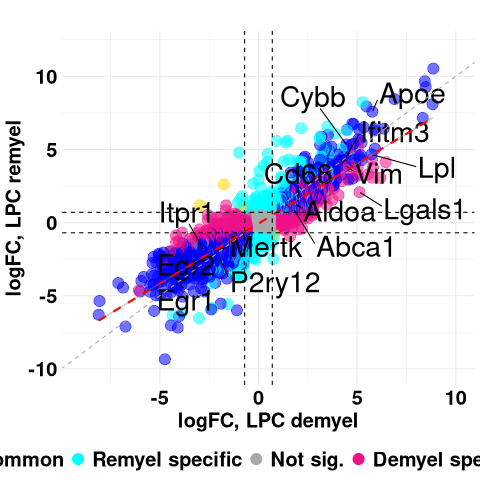

In [75]:
%%R

# Create the scatter plot with corrected color assignment for opposite_direction
p <- ggplot(filtered_out_df2, aes(x = logFC_de, y = logFC_re, 
                                  color = ifelse(opposite_direction, "gold1", 
                                  ifelse(common, "blue", 
                                  ifelse(LPC_sig_de, "deeppink2", 
                                  ifelse(LPC_sig_re, "cyan", "dark grey")))))) +
    geom_point(size = 5, aes(alpha = ifelse(LPC_sig_de | LPC_sig_re | opposite_direction, 1, 1))) +
    geom_text_repel(data = filtered_out_df2[filtered_out_df2$gene %in% genes_to_label, ], 
                    aes(label = gene), nudge_x = 1, point.padding = 0, size = 10, 
                    min.segment.length = 0, box.padding = 0.5, color = "black") +
    geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "darkgrey") +  # Add y = x line
    geom_smooth(method = "lm", linetype = "dashed", color = "red") +  # Add linear trend line with confidence interval
    geom_vline(xintercept = 0.7, linetype = "dashed", color = "black") +  # Vertical dashed line at x = 1
    geom_hline(yintercept = 0.7, linetype = "dashed", color = "black") +  # Horizontal dashed line at y = 1
    geom_vline(xintercept = -0.7, linetype = "dashed", color = "black") +  # Vertical dashed line at x = -1
    geom_hline(yintercept = -0.7, linetype = "dashed", color = "black") +  # Horizontal dashed line at y = -1
    labs(title = '',
         x = 'logFC, LPC demyel',
         y = 'logFC, LPC remyel',
         color = 'Significance') +
    scale_color_manual(name = 'Color',
                       values = c(blue = 'blue', deeppink2 = 'deeppink2', cyan = 'cyan', gold1 = 'gold1', 'dark grey' = 'dark grey'),
                       labels = c('Common', 'Remyel specific', 'Not sig.', 'Demyel specific', 'Opposite')) +  # Update labels for yellow
    coord_cartesian(xlim = c(-9, 10), ylim = c(-10, 12)) +  # Set x-axis and y-axis limits
    theme_minimal() +
    theme(
        text = element_text(size = 20, face = "bold", color = "black"),  # Set text size and color for all text elements
        axis.title = element_text(size = 20, face = "bold", color = "black"),  # Set axis title size and color
        axis.text = element_text(size = 20, face = "bold", color = "black"),  # Set axis text size and color
        plot.title = element_text(size = 20, face = "bold", hjust = 0.5),  # Center the title and set its size
        legend.text = element_text(size = 20),  # Set legend text size
        legend.title = element_text(size = 20),  # Set legend title size
        legend.position = "bottom"  # Move the legend to the bottom
    ) +
    guides(alpha = "none")  # Remove alpha scale legend

# Save the plot with higher resolution and larger size
#ggsave("./figures/dual_volcanoplot_LPC_trendline_with_opposite_and_pearson_fixed.png", plot = p, width = 16, height = 12, dpi = 300)

# Print the plot to display in the notebook (optional)
print(p)

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


In addition: Warning message:
ggrepel: 3 unlabeled data points (too many overlaps). Consider increasing max.overlaps 


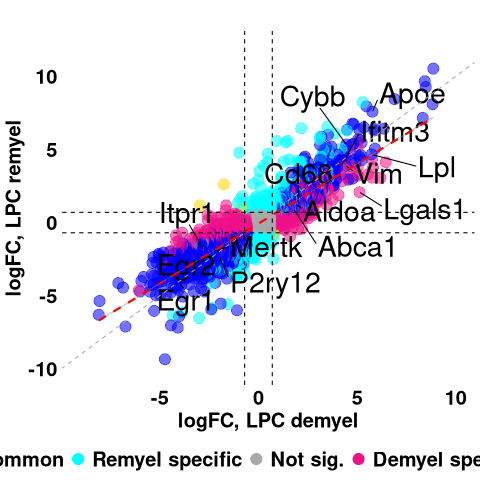

In [76]:
%%R
# Create the scatter plot with corrected color assignment for opposite_direction
p <- ggplot(filtered_out_df2, aes(x = logFC_de, y = logFC_re, 
                                  color = ifelse(opposite_direction, "gold1", 
                                  ifelse(common, "blue", 
                                  ifelse(LPC_sig_de, "deeppink2", 
                                  ifelse(LPC_sig_re, "cyan", "dark grey")))))) +
    geom_point(size = 5, aes(alpha = ifelse(LPC_sig_de | LPC_sig_re | opposite_direction, 1, 1))) +
    geom_text_repel(data = filtered_out_df2[filtered_out_df2$gene %in% genes_to_label, ], 
                    aes(label = gene), nudge_x = 1, point.padding = 0, size = 10, 
                    min.segment.length = 0, box.padding = 0.5, color = "black") +
    geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "darkgrey") +  # Add y = x line
    geom_smooth(method = "lm", linetype = "dashed", color = "red") +  # Add linear trend line with confidence interval
    geom_vline(xintercept = 0.7, linetype = "dashed", color = "black") +  # Vertical dashed line at x = 1
    geom_hline(yintercept = 0.7, linetype = "dashed", color = "black") +  # Horizontal dashed line at y = 1
    geom_vline(xintercept = -0.7, linetype = "dashed", color = "black") +  # Vertical dashed line at x = -1
    geom_hline(yintercept = -0.7, linetype = "dashed", color = "black") +  # Horizontal dashed line at y = -1
    labs(title = '',
         x = 'logFC, LPC demyel',
         y = 'logFC, LPC remyel',
         color = 'Significance') +
    scale_color_manual(name = 'Color',
                       values = c(blue = 'blue', deeppink2 = 'deeppink2', cyan = 'cyan', gold1 = 'gold1', 'dark grey' = 'dark grey'),
                       labels = c('Common', 'Remyel specific', 'Not sig.', 'Demyel specific', 'Opposite')) +  # Update labels for yellow
    coord_cartesian(xlim = c(-9, 10), ylim = c(-10, 12)) +  # Set x-axis and y-axis limits
    theme_minimal() +
    theme(
        text = element_text(size = 20, face = "bold", color = "black"),  # Set text size and color for all text elements
        axis.title = element_text(size = 20, face = "bold", color = "black"),  # Set axis title size and color
        axis.text = element_text(size = 20, face = "bold", color = "black"),  # Set axis text size and color
        plot.title = element_text(size = 20, face = "bold", hjust = 0.5),  # Center the title and set its size
        legend.text = element_text(size = 20),  # Set legend text size
        legend.title = element_text(size = 20),  # Set legend title size
        legend.position = "bottom",  # Move the legend to the bottom
        panel.grid = element_blank()  # Remove all grid lines
    ) +
    guides(alpha = "none")  # Remove alpha scale legend

# Save the plot with higher resolution and larger size
ggsave("./figures/dual_volcanoplot_LPC_de_vs_re_NEW.png", plot = p, width = 16, height = 12, dpi = 300)

# Print the plot to display in the notebook (optional)
print(p)

In [77]:
%%R

# Fit the linear model for the subset
model_subset <- lm(logFC_re ~ logFC_de, data = overlapping)

# Get summary statistics
model_subset_summary <- summary(model_subset)

# Extract R² and slope
r_squared_subset <- model_subset_summary$r.squared
slope_subset <- coef(model_subset)[2]  # Extract slope

# Print the results
cat("Slope for subset:", slope_subset, "\n")
cat("R² for subset:", r_squared_subset, "\n")

Slope for subset: 0.8163516 
R² for subset: 0.7493978 


In [78]:
%%R

# Fit the linear model for the subset
model_subset <- lm(logFC_re ~ logFC_de, data = subset_either)

# Get summary statistics
model_subset_summary <- summary(model_subset)

# Extract R² and slope
r_squared_subset <- model_subset_summary$r.squared
slope_subset <- coef(model_subset)[2]  # Extract slope

# Print the results
cat("Slope for subset:", slope_subset, "\n")
cat("R² for subset:", r_squared_subset, "\n")

Slope for subset: 0.8270792 
R² for subset: 0.8002899 


In [84]:
%%R

subset_both <- filtered_out_df2[
  (abs(filtered_out_df2$logFC_de) >= 0.585 & filtered_out_df2$Padj_de <= 0.05) & 
  (abs(filtered_out_df2$logFC_re) >= 0.585 & filtered_out_df2$Padj_re <= 0.05) & 
  (filtered_out_df2$opposite_direction == FALSE), 
  ]

dim(subset_both)

[1] 2374    9


In [85]:
%%R

# Fit the linear model for the subset
model_subset <- lm(logFC_re ~ logFC_de, data = subset_both)

# Get summary statistics
model_subset_summary <- summary(model_subset)

# Extract R² and slope
r_squared_subset <- model_subset_summary$r.squared
slope_subset <- coef(model_subset)[2]  # Extract slope

# Print the results
cat("Slope for subset:", slope_subset, "\n")
cat("R² for subset:", r_squared_subset, "\n")

Slope for subset: 0.8772823 
R² for subset: 0.880589 


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


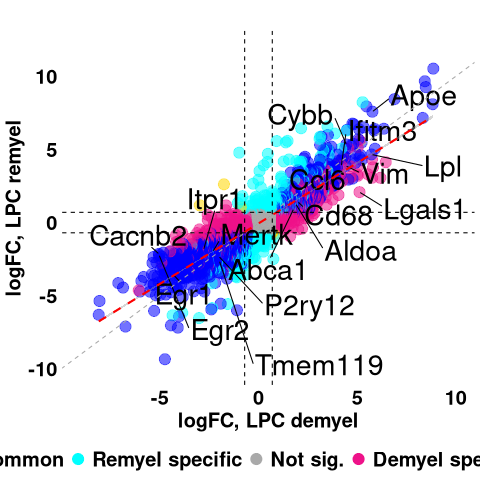

In [81]:
%%R

# Create the scatter plot with corrected color assignment for opposite_direction
p <- ggplot(filtered_out_df2, aes(x = logFC_de, y = logFC_re, 
                                  color = ifelse(opposite_direction, "gold1", 
                                  ifelse(common, "blue", 
                                  ifelse(LPC_sig_de, "deeppink2", 
                                  ifelse(LPC_sig_re, "cyan", "dark grey")))))) +
    geom_point(size = 5, aes(alpha = ifelse(LPC_sig_de | LPC_sig_re | opposite_direction, 1, 1))) +
    geom_text_repel(data = filtered_out_df2[filtered_out_df2$gene %in% genes_to_label, ], 
                    aes(label = gene), nudge_x = 1.5, point.padding = 0, size = 10, max.overlaps = Inf,
                    min.segment.length = 0, box.padding = 0.5, color = "black") +
    geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "darkgrey") +  # Add y = x line
    geom_smooth(data = subset_either, aes(x = logFC_de, y = logFC_re), 
                method = "lm", linetype = "dashed", color = "red") +  # Add linear trend line with confidence interval
    geom_vline(xintercept = 0.7, linetype = "dashed", color = "black") +  # Vertical dashed line at x = 1
    geom_hline(yintercept = 0.7, linetype = "dashed", color = "black") +  # Horizontal dashed line at y = 1
    geom_vline(xintercept = -0.7, linetype = "dashed", color = "black") +  # Vertical dashed line at x = -1
    geom_hline(yintercept = -0.7, linetype = "dashed", color = "black") +  # Horizontal dashed line at y = -1
    labs(title = '',
         x = 'logFC, LPC demyel',
         y = 'logFC, LPC remyel',
         color = 'Significance') +
    scale_color_manual(name = 'Color',
                       values = c(blue = 'blue', deeppink2 = 'deeppink2', cyan = 'cyan', gold1 = 'gold1', 'dark grey' = 'dark grey'),
                       labels = c('Common', 'Remyel specific', 'Not sig.', 'Demyel specific', 'Opposite')) +  # Update labels for yellow
    coord_cartesian(xlim = c(-9, 10), ylim = c(-10, 12)) +  # Set x-axis and y-axis limits
    theme_minimal() +
    theme(
        text = element_text(size = 20, face = "bold", color = "black"),  # Set text size and color for all text elements
        axis.title = element_text(size = 20, face = "bold", color = "black"),  # Set axis title size and color
        axis.text = element_text(size = 20, face = "bold", color = "black"),  # Set axis text size and color
        plot.title = element_text(size = 20, face = "bold", hjust = 0.5),  # Center the title and set its size
        legend.text = element_text(size = 20),  # Set legend text size
        legend.title = element_text(size = 20),  # Set legend title size
        legend.position = "bottom",  # Move the legend to the bottom
        panel.grid = element_blank()  # Remove all grid lines
    ) +
    guides(alpha = "none")  # Remove alpha scale legend

# Save the plot with higher resolution and larger size
ggsave("./figures/dual_volcanoplot_LPC_de_vs_re_NEW_with_subset_lm.png", plot = p, width = 16, height = 12, dpi = 300)

# Print the plot to display in the notebook (optional)
print(p)

### Skip- wrong subsets

In [ ]:
from matplotlib_venn import venn2, venn2_circles
import matplotlib.pyplot as plt

# set up gene lists
genes_LPC_up = LPC_de_up['gene'].tolist()
genes_LPC_RE_up = LPC_re_up['gene'].tolist()

# Convert lists to sets
set_LPC_demyel_up = set(genes_LPC_up)
set_LPC_remyel_up = set(genes_LPC_RE_up)

# Calculate overlaps
only_LPC_demyel_up = len(set_LPC_demyel_up - set_LPC_remyel_up)
only_LPC_remyel_up = len(set_LPC_remyel_up - set_LPC_demyel_up)
LPC_demyel_remyel_up = len(set_LPC_demyel_up & set_LPC_remyel_up)

# Set labels and colors
set_labels = ('LPC_demyel', 'LPC_remyel')
set_colors = ('#ffe6c2', '#ffd28e')  # Example colors

# Plot Venn diagram
venn = venn2(subsets=(only_LPC_demyel_up, only_LPC_remyel_up, LPC_demyel_remyel_up),
             set_labels=set_labels,
             set_colors=set_colors,
             alpha=0.5)  # Adjust transparency here

venn2_circles(subsets=(only_LPC_demyel_up, only_LPC_remyel_up, LPC_demyel_remyel_up), linewidth=1)

# Increase text size for subset counts
for label in venn.subset_labels:
    if label:  # Check if label is not None
        label.set_fontsize(14)  # Adjust font size here
        label.set_color('black')  # Set text color to white
        label.set_fontweight('bold')  # Set font weight to bold

# Increase text size for set labels
for text in venn.set_labels:
    text.set_fontsize(14)

# Display the plot
plt.title('Sig. Up DEGs: LPC de vs remyel DAMs', fontsize=16)

# Save the plot
#plt.savefig('./figures/venn2_LPC_de_vs_re_DAMs_up.png', dpi=300, bbox_inches='tight', facecolor='none')

plt.show()

In [ ]:
# Set up gene lists
genes_LPC_down = LPC_de_down['gene'].tolist()
genes_LPC_RE_down = LPC_re_down['gene'].tolist()

# Convert lists to sets
set_LPC_demyel_down = set(genes_LPC_down)
set_LPC_remyel_down = set(genes_LPC_RE_down)

# Calculate overlaps
only_LPC_demyel_down = len(set_LPC_demyel_down - set_LPC_remyel_down)
only_LPC_remyel_down = len(set_LPC_remyel_down - set_LPC_demyel_down)
LPC_demyel_remyel_down = len(set_LPC_demyel_down & set_LPC_remyel_down)

# Set labels and colors
set_labels = ('LPC_demyel', 'LPC_remyel')
set_colors = ('#ffe6c2', '#ffd28e')  # Example colors

# Plot Venn diagram
venn = venn2(subsets=(only_LPC_demyel_down, only_LPC_remyel_down, LPC_demyel_remyel_down),
             set_labels=set_labels,
             set_colors=set_colors,
             alpha=0.5)  # Adjust transparency here

venn2_circles(subsets=(only_LPC_demyel_down, only_LPC_remyel_down, LPC_demyel_remyel_down), linewidth=1)

# Increase text size for subset counts
for label in venn.subset_labels:
    if label:  # Check if label is not None
        label.set_fontsize(14)  # Adjust font size here
        label.set_color('black')  # Set text color to white
        label.set_fontweight('bold')  # Set font weight to bold

# Increase text size for set labels
for text in venn.set_labels:
    text.set_fontsize(14)

# Display the plot
plt.title('Sig. Down DEGs: LPC de vs remyel DAMs', fontsize=16)

# Save the plot
#plt.savefig('./figures/venn2_LPC_de_vs_re_DAMs_down.png', dpi=300, bbox_inches='tight', facecolor='none')

plt.show()

# Show overlaps

In [ ]:
# Create gene lists from the dfs:
genes_LPC_demyel_2_up = LPC_demyel_2_up['gene'].tolist()
genes_LPC_de_up = LPC_de_up['gene'].tolist()
genes_LPC_re_up = LPC_re_up['gene'].tolist()
genes_Cupr_de_up = Cupr_de_up['gene'].tolist()
genes_Cupr_re_up = Cupr_re_up['gene'].tolist()

# Convert lists to sets for upregulated genes
set_LPC_demyel_2_up = set(genes_LPC_demyel_2_up)
set_LPC_de_up = set(genes_LPC_de_up)
set_LPC_re_up = set(genes_LPC_re_up)
set_Cupr_de_up = set(genes_Cupr_de_up)
set_Cupr_re_up = set(genes_Cupr_re_up)

In [ ]:
genes_LPC_demyel_2_down = LPC_demyel_2_down['gene'].tolist()
genes_LPC_de_down = LPC_de_down['gene'].tolist()
genes_LPC_re_down = LPC_re_down['gene'].tolist()
genes_Cupr_de_down = Cupr_de_down['gene'].tolist()
genes_Cupr_re_down = Cupr_re_down['gene'].tolist()

set_LPC_demyel_2_down = set(genes_LPC_demyel_2_down)
set_LPC_de_down = set(genes_LPC_de_down)
set_LPC_re_down = set(genes_LPC_re_down)
set_Cupr_de_down = set(genes_Cupr_de_down)
set_Cupr_re_down = set(genes_Cupr_re_down)

In [ ]:
# Overlap of upregulated genes
overlap_up = set_Cupr_de_up & set_Cupr_re_up
print("Number of overlapping upregulated genes:", len(overlap_up))
print("Overlapping upregulated genes:", overlap_up)

In [ ]:
# Overlap of upregulated genes
overlap_down = set_Cupr_de_down & set_Cupr_re_down
print("Number of overlapping downregulated genes:", len(overlap_down))
print("Overlapping downregulated genes:", overlap_down)

# Cupr_de vs re DAMs

In [86]:
Cupr_sig_de = Cupr_demyel[(Cupr_demyel.Padj < 0.05) & (Cupr_demyel.logFC.abs() > 0.585)]
Cupr_sig_de.shape

(5472, 7)

In [87]:
Cupr_sig_de = Cupr_demyel.sort_values(by='logFC', ascending=False)
Cupr_sig_de[:20]

,gene,logFC,AveExpr,t,Pvalue,Padj,B
131,Spp1,12.264981,7.114855,14.360864,8.643897e-09,6.614749e-07,8.493057
879,Gpnmb,10.467026,4.762201,8.530982,2.303635e-06,2.656511e-05,4.427667
274,Apoc2,9.888681,3.504383,12.060093,5.914091e-08,2.182407e-06,6.778746
508,Apoc4,9.518047,3.535830,10.225995,3.489392e-07,6.956848e-06,5.731450
218,Apoc1,9.080148,4.818993,12.647794,3.515847e-08,1.621905e-06,7.313361
698,Olr1,9.027889,3.223617,9.290038,9.570695e-07,1.389462e-05,5.087532
86,Igf1,8.943051,6.095298,15.960278,2.655783e-09,3.097803e-07,9.539317
91,Cst7,8.572297,6.294911,15.676010,3.249037e-09,3.547683e-07,11.143775
2911,Gm1673,8.434301,3.730256,5.160414,2.566318e-04,8.943338e-04,0.732593
2171,Cybb,8.292883,4.692402,6.026149,6.633311e-05,3.099210e-04,1.832831


In [88]:
# Find the highest and lowest values of logFC
highest_logFC = Cupr_sig_de['logFC'].max()
lowest_logFC = Cupr_sig_de['logFC'].min()

# Print the results
print("Highest logFC:", highest_logFC)
print("Lowest logFC:", lowest_logFC)

Highest logFC: 12.2649811592676
Lowest logFC: -8.4783273137855


In [89]:
Cupr_sig_re = Cupr_remyel[(Cupr_remyel.Padj < 0.05) & (Cupr_remyel.logFC.abs() > 0.585)]
Cupr_sig_re.shape

(1515, 7)

In [90]:
# Find the highest and lowest values of logFC
highest_logFC = Cupr_sig_re['logFC'].max()
lowest_logFC = Cupr_sig_re['logFC'].min()

# Print the results
print("Highest logFC:", highest_logFC)
print("Lowest logFC:", lowest_logFC)

Highest logFC: 11.853414302211
Lowest logFC: -6.61943024633477


In [91]:
# Find the overlapping genes
overlapping_genes = set(Cupr_demyel['gene']).intersection(set(Cupr_remyel['gene']))

# Extract rows with overlapping genes
Cupr_de_overlap = Cupr_demyel[Cupr_demyel['gene'].isin(overlapping_genes)]
Cupr_re_overlap = Cupr_remyel[Cupr_remyel['gene'].isin(overlapping_genes)]

# Rename columns appropriately
Cupr_de_overlap = Cupr_de_overlap.rename(columns={'logFC': 'logFC_de', 'Padj': 'Padj_de'})
Cupr_re_overlap = Cupr_re_overlap.rename(columns={'logFC': 'logFC_re', 'Padj': 'Padj_re'})

# Merge data frames on the gene column
overlapping = pd.merge(Cupr_de_overlap, Cupr_re_overlap, on='gene')

# Select the desired columns
overlapping = overlapping[['gene', 'logFC_de', 'Padj_de', 'logFC_re', 'Padj_re']]

# Order columns
overlapping = overlapping.sort_values(by='logFC_de', ascending=False)
print(overlapping.shape)

(9239, 5)


In [92]:
# Define significant genes
overlapping['Cupr_sig_de'] = (overlapping['Padj_de'] < 0.05) & (abs(overlapping['logFC_de']) > 0.585)
overlapping['Cupr_sig_re'] = (overlapping['Padj_re'] < 0.05) & (abs(overlapping['logFC_re']) > 0.585)

# Add 'common' column based on conditions
overlapping['common'] = overlapping['Cupr_sig_de'] & overlapping['Cupr_sig_re']

# Create opposite direction column based on correct conditions
# Genes that are upregulated in one set and downregulated in the other
condition1 = (overlapping['Padj_de'] < 0.05) & (overlapping['logFC_de'] > 0.585) & (overlapping['Padj_re'] < 0.05) & (overlapping['logFC_re'] < -0.585)
condition2 = (overlapping['Padj_re'] < 0.05) & (overlapping['logFC_re'] > 0.585) & (overlapping['Padj_de'] < 0.05) & (overlapping['logFC_de'] < -0.585)

# Update opposite_direction column with correct conditions
overlapping['opposite_direction'] = condition1 | condition2

# Display the DataFrame
overlapping.head()

,gene,logFC_de,Padj_de,logFC_re,Padj_re,Cupr_sig_de,Cupr_sig_re,common,opposite_direction
122,Spp1,12.264981,6.614749e-07,11.853414,0.000022,True,True,True,False
824,Gpnmb,10.467026,2.656511e-05,10.812187,0.000054,True,True,True,False
254,Apoc2,9.888681,2.182407e-06,8.652415,0.000215,True,True,True,False
471,Apoc4,9.518047,6.956848e-06,9.301375,0.000157,True,True,True,False
203,Apoc1,9.080148,1.621905e-06,8.677281,0.000395,True,True,True,False


In [93]:
# Count the genes in opposite direction
sig_Cupr_de = overlapping['Cupr_sig_de'].sum()
print(f"Number of sig DEGS in Cupr_de_common: {sig_Cupr_de}")

# Count the genes in opposite direction
sig_Cupr_re = overlapping['Cupr_sig_re'].sum()
print(f"Number of sig DEGS in Cupr_re_common: {sig_Cupr_re}")

Number of sig DEGS in Cupr_de_common: 4889
Number of sig DEGS in Cupr_re_common: 1494


In [94]:
# Count the genes in opposite direction
opposite_direction_count = overlapping['opposite_direction'].sum()
print(f"Number of genes with opposite changes: {opposite_direction_count}")

overlapping_common = overlapping[overlapping['common']]
print(f"Number of common sig genes: {overlapping_common.shape}")

# Assuming 'overlapping' is your dataframe
filtered_opposite_direction = overlapping[overlapping['opposite_direction'] == True]
filtered_opposite_direction

Number of genes with opposite changes: 0
Number of common sig genes: (1447, 9)


,gene,logFC_de,Padj_de,logFC_re,Padj_re,Cupr_sig_de,Cupr_sig_re,common,opposite_direction


In [95]:
%%R -i overlapping
head(overlapping)

     gene  logFC_de      Padj_de  logFC_re      Padj_re Cupr_sig_de Cupr_sig_re
122  Spp1 12.264981 6.614749e-07 11.853414 2.185087e-05        TRUE        TRUE
824 Gpnmb 10.467026 2.656511e-05 10.812187 5.392055e-05        TRUE        TRUE
254 Apoc2  9.888681 2.182407e-06  8.652415 2.148319e-04        TRUE        TRUE
471 Apoc4  9.518047 6.956848e-06  9.301375 1.573447e-04        TRUE        TRUE
203 Apoc1  9.080148 1.621905e-06  8.677281 3.951642e-04        TRUE        TRUE
652  Olr1  9.027889 1.389462e-05  9.644408 1.385994e-04        TRUE        TRUE
    common opposite_direction
122   TRUE              FALSE
824   TRUE              FALSE
254   TRUE              FALSE
471   TRUE              FALSE
203   TRUE              FALSE
652   TRUE              FALSE


In [96]:
# Apply the conditions to filter the DataFrame
filtered_DE = overlapping[
    (abs(overlapping['logFC_de']) > 0.585) & 
    (overlapping['Padj_de'] > 0.05) &
    (overlapping['Cupr_sig_re'] == False)
]

# Print the filtered DataFrame to verify
print("Filtered DataFrame:")
print(filtered_DE.shape)

# Apply the conditions to filter the DataFrame
filtered_RE = overlapping[
    (abs(overlapping['logFC_re']) > 0.585) & 
    (overlapping['Padj_re'] > 0.05) &
    (overlapping['Cupr_sig_de'] == False)
]

# Print the filtered DataFrame to verify
print("Filtered DataFrame:")
print(filtered_RE.shape)

Filtered DataFrame:
(224, 9)
Filtered DataFrame:
(1549, 9)


In [97]:
# Filter out the rows from the overlapping DataFrame
filtered_out_df1 = overlapping[
    ~(
        (abs(overlapping['logFC_de']) > 0.585) & 
        (overlapping['Padj_de'] > 0.05) &
        (overlapping['Cupr_sig_re'] == False)
    )
]

# Print the resulting DataFrame to verify
print("Filtered Out DataFrame1:")
print(filtered_out_df1.shape)

# Filter out the rows from the overlapping DataFrame
filtered_out_df2 = filtered_out_df1[
    ~(
        (abs(filtered_out_df1['logFC_re']) > 0.585) & 
        (filtered_out_df1['Padj_re'] > 0.05) &
        (overlapping['Cupr_sig_de'] == False)
    )
]

# Print the resulting DataFrame to verify
print("Filtered Out DataFrame2:")
print(filtered_out_df2.shape)

Filtered Out DataFrame1:
(9015, 9)
Filtered Out DataFrame2:
(7624, 9)


In [98]:
# Count the number of True values in sig_MOL2 but not in sig_MOL4
count_sig_cup_de_only = ((filtered_out_df2['Cupr_sig_de'] == True) & (filtered_out_df2['Cupr_sig_re'] == False)).sum()

# Count the number of True values in sig_MOL4 but not in sig_MOL2
count_sig_cup_re_only = ((filtered_out_df2['Cupr_sig_re'] == True) & (filtered_out_df2['Cupr_sig_de'] == False)).sum()

# Count the number of True values in common
count_common = filtered_out_df2['common'].sum()

# Display the counts
print("Number of True values in De only:", count_sig_cup_de_only)
print("Number of True values in Re only:", count_sig_cup_re_only)
print("Number of True values in common:", count_common)

# Show one gene where opposite_direction is True
gene_opposite_direction = filtered_out_df2[filtered_out_df2['opposite_direction'] == True]['gene']

# Display the gene
print(gene_opposite_direction.count(), "gene in opposite_direction:", gene_opposite_direction)

Number of True values in De only: 3442
Number of True values in Re only: 47
Number of True values in common: 1447
0 gene in opposite_direction: Series([], Name: gene, dtype: object)


In [99]:
# Extract the logFC_de and logFC_re columns for correlation
logFC_de = filtered_out_df2['logFC_de']
logFC_re = filtered_out_df2['logFC_re']

# Compute the Pearson correlation and the p-value
pearson_corr, p_value = pearsonr(logFC_de, logFC_re)

# Print the results
print(f"Pearson Correlation: {pearson_corr}")
print(f"P-value: {p_value}")

Pearson Correlation: 0.9392033205625966
P-value: 0.0


In [100]:
%%R -i filtered_out_df2

# Fit a linear model
model <- lm(logFC_re ~ logFC_de, data = filtered_out_df2)

# Summary of the model to get R^2
model_summary <- summary(model)
r_squared <- model_summary$r.squared

print(model_summary)
print(r_squared)


Call:
lm(formula = logFC_re ~ logFC_de, data = filtered_out_df2)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7314 -0.2330  0.0246  0.2600  4.4304 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.121339   0.005678  -21.37   <2e-16 ***
logFC_de     0.994417   0.004164  238.80   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4726 on 7622 degrees of freedom
Multiple R-squared:  0.8821,	Adjusted R-squared:  0.8821 
F-statistic: 5.703e+04 on 1 and 7622 DF,  p-value: < 2.2e-16

[1] 0.8821029


In [101]:
%%R

# Calculate the Pearson correlation
pearson_corr <- cor(filtered_out_df2$logFC_de, filtered_out_df2$logFC_re)
pearson_corr

[1] 0.9392033


### New overlaps:

In [102]:
filtered_out_df2[:5]

,gene,logFC_de,Padj_de,logFC_re,Padj_re,Cupr_sig_de,Cupr_sig_re,common,opposite_direction
122,Spp1,12.264981,6.614749e-07,11.853414,0.000022,True,True,True,False
824,Gpnmb,10.467026,2.656511e-05,10.812187,0.000054,True,True,True,False
254,Apoc2,9.888681,2.182407e-06,8.652415,0.000215,True,True,True,False
471,Apoc4,9.518047,6.956848e-06,9.301375,0.000157,True,True,True,False
203,Apoc1,9.080148,1.621905e-06,8.677281,0.000395,True,True,True,False


In [103]:
# Count UP-regulated genes (logFC > 0) in LPC_de
count_up_LPC_de = ((filtered_out_df2['logFC_de'] >= 0.585) & (filtered_out_df2['Padj_de'] < 0.05)).sum()

# Count DOWN-regulated genes (logFC < 0) in LPC_de
count_down_LPC_de = ((filtered_out_df2['logFC_de'] <= -0.585) & (filtered_out_df2['Padj_de'] < 0.05)).sum()

# Count UP-regulated genes (logFC > 0) in LPC_re
count_up_LPC_re = ((filtered_out_df2['logFC_re'] >= 0.585) & (filtered_out_df2['Padj_re'] < 0.05)).sum()

# Count DOWN-regulated genes (logFC < 0) in LPC_re
count_down_LPC_re = ((filtered_out_df2['logFC_re'] <= -0.585) & (filtered_out_df2['Padj_re'] < 0.05)).sum()

# Count common UP-regulated genes (significant & logFC > 0 in both conditions)
count_common_up = ((filtered_out_df2['logFC_de'] >= 0.585) & (filtered_out_df2['Padj_de'] < 0.05) &
                   (filtered_out_df2['logFC_re'] >= 0.585) & (filtered_out_df2['Padj_re'] < 0.05)).sum()

# Count common DOWN-regulated genes (significant & logFC < 0 in both conditions)
count_common_down = ((filtered_out_df2['logFC_de'] <= -0.585) & (filtered_out_df2['Padj_de'] < 0.05) &
                     (filtered_out_df2['logFC_re'] <= -0.585) & (filtered_out_df2['Padj_re'] < 0.05)).sum()

# Count genes that change direction (UP in one, DOWN in the other)
count_opposite_direction = (filtered_out_df2['opposite_direction'] == True).sum()

# Display the counts
print("UP-regulated DEGs in LPC_de:", count_up_LPC_de)
print("DOWN-regulated DEGs in LPC_de:", count_down_LPC_de)
print("UP-regulated DEGs in LPC_re:", count_up_LPC_re)
print("DOWN-regulated DEGs in LPC_re:", count_down_LPC_re)
print("Common UP-regulated DEGs:", count_common_up)
print("Common DOWN-regulated DEGs:", count_common_down)
print("Genes with opposite direction:", count_opposite_direction)

UP-regulated DEGs in LPC_de: 948
DOWN-regulated DEGs in LPC_de: 3941
UP-regulated DEGs in LPC_re: 416
DOWN-regulated DEGs in LPC_re: 1078
Common UP-regulated DEGs: 393
Common DOWN-regulated DEGs: 1054
Genes with opposite direction: 0


In [104]:
# Count UP-regulated genes unique to LPC_de (significant in LPC_de but NOT in LPC_re)
count_unique_up_LPC_de = ((filtered_out_df2['logFC_de'] >= 0.585) & (filtered_out_df2['Padj_de'] < 0.05) & 
                          ~((filtered_out_df2['logFC_re'] >= 0.585) & (filtered_out_df2['Padj_re'] < 0.05))).sum()

# Count DOWN-regulated genes unique to LPC_de (significant in LPC_de but NOT in LPC_re)
count_unique_down_LPC_de = ((filtered_out_df2['logFC_de'] <= -0.585) & (filtered_out_df2['Padj_de'] < 0.05) & 
                            ~((filtered_out_df2['logFC_re'] <= -0.585) & (filtered_out_df2['Padj_re'] < 0.05))).sum()

# Count UP-regulated genes unique to LPC_re (significant in LPC_re but NOT in LPC_de)
count_unique_up_LPC_re = ((filtered_out_df2['logFC_re'] >= 0.585) & (filtered_out_df2['Padj_re'] < 0.05) & 
                          ~((filtered_out_df2['logFC_de'] >= 0.585) & (filtered_out_df2['Padj_de'] < 0.05))).sum()

# Count DOWN-regulated genes unique to LPC_re (significant in LPC_re but NOT in LPC_de)
count_unique_down_LPC_re = ((filtered_out_df2['logFC_re'] <= -0.585) & (filtered_out_df2['Padj_re'] < 0.05) & 
                            ~((filtered_out_df2['logFC_de'] <= -0.585) & (filtered_out_df2['Padj_de'] < 0.05))).sum()

# Display the counts
print("Unique UP-regulated DEGs in LPC_de:", count_unique_up_LPC_de)
print("Unique DOWN-regulated DEGs in LPC_de:", count_unique_down_LPC_de)
print("Unique UP-regulated DEGs in LPC_re:", count_unique_up_LPC_re)
print("Unique DOWN-regulated DEGs in LPC_re:", count_unique_down_LPC_re)


Unique UP-regulated DEGs in LPC_de: 555
Unique DOWN-regulated DEGs in LPC_de: 2887
Unique UP-regulated DEGs in LPC_re: 23
Unique DOWN-regulated DEGs in LPC_re: 24


In [105]:
%%R
dim(overlapping)

[1] 9239    9


In [106]:
# Extract the logFC_de and logFC_re columns for correlation
logFC_de = filtered_out_df2['logFC_de']
logFC_re = filtered_out_df2['logFC_re']

# Compute the Pearson correlation and the p-value
pearson_corr, p_value = pearsonr(logFC_de, logFC_re)

# Print the results
print(f"Pearson Correlation: {pearson_corr}")
print(f"P-value: {p_value}")

Pearson Correlation: 0.9392033205625966
P-value: 0.0


In [107]:
# Extract the logFC_de and logFC_re columns for correlation
logFC_de = overlapping['logFC_de']
logFC_re = overlapping['logFC_re']

# Compute the Pearson correlation and the p-value
pearson_corr, p_value = pearsonr(logFC_de, logFC_re)

# Print the results
print(f"Pearson Correlation: {pearson_corr}")
print(f"P-value: {p_value}")

Pearson Correlation: 0.9205770154508655
P-value: 0.0


In [108]:
%%R -i filtered_out_df2

# Fit a linear model
model <- lm(logFC_re ~ logFC_de, data = filtered_out_df2)

# Summary of the model to get R^2
model_summary <- summary(model)
r_squared <- model_summary$r.squared

print(model_summary)
print(r_squared)


Call:
lm(formula = logFC_re ~ logFC_de, data = filtered_out_df2)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7314 -0.2330  0.0246  0.2600  4.4304 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.121339   0.005678  -21.37   <2e-16 ***
logFC_de     0.994417   0.004164  238.80   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4726 on 7622 degrees of freedom
Multiple R-squared:  0.8821,	Adjusted R-squared:  0.8821 
F-statistic: 5.703e+04 on 1 and 7622 DF,  p-value: < 2.2e-16

[1] 0.8821029


In [109]:
%%R -i overlapping

# Fit a linear model
model <- lm(logFC_re ~ logFC_de, data = overlapping)

# Summary of the model to get R^2
model_summary <- summary(model)
r_squared <- model_summary$r.squared

print(model_summary)
print(r_squared)


Call:
lm(formula = logFC_re ~ logFC_de, data = overlapping)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7438 -0.2550  0.0316  0.2869  4.5126 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.183236   0.005481  -33.43   <2e-16 ***
logFC_de     0.989235   0.004367  226.54   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5032 on 9237 degrees of freedom
Multiple R-squared:  0.8475,	Adjusted R-squared:  0.8474 
F-statistic: 5.132e+04 on 1 and 9237 DF,  p-value: < 2.2e-16

[1] 0.847462


In [110]:
%%R

subset_both <- filtered_out_df2[
  (abs(filtered_out_df2$logFC_de) >= 0.585 & filtered_out_df2$Padj_de <= 0.05) & 
  (abs(filtered_out_df2$logFC_re) >= 0.585 & filtered_out_df2$Padj_re <= 0.05) & 
  (filtered_out_df2$opposite_direction == FALSE), 
  ]

dim(subset_both)

[1] 1447    9


In [111]:
%%R

subset_either <- filtered_out_df2[
  ((abs(filtered_out_df2$logFC_de) >= 0.585 & filtered_out_df2$Padj_de <= 0.05) |
   (abs(filtered_out_df2$logFC_re) >= 0.585 & filtered_out_df2$Padj_re <= 0.05)),
  ]

dim(subset_either)

[1] 4936    9


In [112]:
%%R

# Fit a linear model
model <- lm(logFC_re ~ logFC_de, data = subset_either)

# Summary of the model to get R^2
model_summary <- summary(model)
r_squared <- model_summary$r.squared

print(model_summary)
print(r_squared)


Call:
lm(formula = logFC_re ~ logFC_de, data = subset_either)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7854 -0.2722  0.0335  0.3023  4.4067 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.130402   0.008288  -15.73   <2e-16 ***
logFC_de     1.002764   0.004937  203.12   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5429 on 4934 degrees of freedom
Multiple R-squared:  0.8932,	Adjusted R-squared:  0.8932 
F-statistic: 4.126e+04 on 1 and 4934 DF,  p-value: < 2.2e-16

[1] 0.8931884


In [113]:
%%R

# Fit a linear model
model <- lm(logFC_re ~ logFC_de, data = subset_both)

# Summary of the model to get R^2
model_summary <- summary(model)
r_squared <- model_summary$r.squared

print(model_summary)
print(r_squared)


Call:
lm(formula = logFC_re ~ logFC_de, data = subset_both)

Residuals:
     Min       1Q   Median       3Q      Max 
-3.06749 -0.32851  0.01319  0.36347  2.49991 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.152025   0.016374  -9.285   <2e-16 ***
logFC_de     1.052126   0.006347 165.772   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6114 on 1445 degrees of freedom
Multiple R-squared:   0.95,	Adjusted R-squared:   0.95 
F-statistic: 2.748e+04 on 1 and 1445 DF,  p-value: < 2.2e-16

[1] 0.9500438


In [114]:
%R -o subset_either

In [115]:
# Extract the logFC_de and logFC_re columns for correlation
logFC_de = subset_either['logFC_de']
logFC_re = subset_either['logFC_re']

# Compute the Pearson correlation and the p-value
pearson_corr, p_value = pearsonr(logFC_de, logFC_re)

# Print the results
print(f"Pearson Correlation: {pearson_corr}")
print(f"P-value: {p_value}")

Pearson Correlation: 0.9450864715442723
P-value: 0.0


In [116]:
%R -o subset_both

In [117]:
# Extract the logFC_de and logFC_re columns for correlation
logFC_de = subset_both['logFC_de']
logFC_re = subset_both['logFC_re']

# Compute the Pearson correlation and the p-value
pearson_corr, p_value = pearsonr(logFC_de, logFC_re)

# Print the results
print(f"Pearson Correlation: {pearson_corr}")
print(f"P-value: {p_value}")

Pearson Correlation: 0.9747019206180286
P-value: 0.0


In [118]:
%%R
# Sort the dataframe by 'logFC_de' in descending order
filtered_out_df2_sorted <- filtered_out_df2[order(-filtered_out_df2$logFC_de), ]

# View the top of the sorted dataframe
head(filtered_out_df2_sorted, 20)

       gene  logFC_de      Padj_de  logFC_re      Padj_re Cupr_sig_de
122    Spp1 12.264981 6.614749e-07 11.853414 2.185087e-05        TRUE
824   Gpnmb 10.467026 2.656511e-05 10.812187 5.392055e-05        TRUE
254   Apoc2  9.888681 2.182407e-06  8.652415 2.148319e-04        TRUE
471   Apoc4  9.518047 6.956848e-06  9.301375 1.573447e-04        TRUE
203   Apoc1  9.080148 1.621905e-06  8.677281 3.951642e-04        TRUE
652    Olr1  9.027889 1.389462e-05  9.644408 1.385994e-04        TRUE
79     Igf1  8.943051 3.097803e-07  9.201708 5.392055e-05        TRUE
84     Cst7  8.572297 3.547683e-07  7.234787 5.392055e-05        TRUE
2664 Gm1673  8.434301 8.943338e-04  7.450523 1.863743e-03        TRUE
2006   Cybb  8.292883 3.099210e-04  9.274054 2.227640e-04        TRUE
100   Fabp5  8.150478 4.489843e-07  8.548151 7.837768e-05        TRUE
683   Ch25h  8.075342 1.592344e-05  6.366664 1.230987e-03        TRUE
1000  Pianp  7.729412 3.990024e-05  7.487002 1.708651e-03        TRUE
3788  Ms4a7  7.68054

In [119]:
%%R
# Sort the dataframe by 'logFC_de' in descending order
filtered_out_df2_sorted <- filtered_out_df2[order(filtered_out_df2$logFC_de), ]

# View the top of the sorted dataframe
head(filtered_out_df2_sorted, 10)

        gene  logFC_de      Padj_de  logFC_re     Padj_re Cupr_sig_de
716  Gm11523 -7.925492 1.882052e-05 -5.990735 0.032365330        TRUE
1010     Nhs -7.018634 4.100700e-05 -5.214501 0.007513957        TRUE
179   Ptger3 -6.158859 1.283294e-06 -5.321684 0.006163852        TRUE
326  Rasgrp4 -6.086763 3.366609e-06 -4.961978 0.007489087        TRUE
106  Slc5a10 -5.824737 4.944817e-07 -5.723653 0.006779212        TRUE
196  Slco4a1 -5.703332 1.547016e-06 -4.504662 0.003529324        TRUE
65   Gm31243 -5.686056 2.443187e-07 -5.653803 0.001628721        TRUE
103     Cux2 -5.624338 4.705872e-07 -5.211956 0.010907226        TRUE
69     Klrd1 -5.576535 2.824936e-07 -5.462261 0.013572222        TRUE
29   Tmem204 -5.558742 1.050954e-07 -5.336233 0.002464643        TRUE
     Cupr_sig_re common opposite_direction
716         TRUE   TRUE              FALSE
1010        TRUE   TRUE              FALSE
179         TRUE   TRUE              FALSE
326         TRUE   TRUE              FALSE
106         TRU

In [120]:
%%R

# Sort the dataframe by 'logFC_de' in descending order
filtered_out_df2_sorted <- filtered_out_df2[order(filtered_out_df2$logFC_de, decreasing = FALSE), ]

# View the top 50 rows
top_80 <- head(filtered_out_df2_sorted, 120)

# Create a subset dataframe where common == TRUE
subset_common <- top_80[top_80$common == TRUE, ]
subset_common

              gene  logFC_de      Padj_de  logFC_re      Padj_re Cupr_sig_de
716        Gm11523 -7.925492 1.882052e-05 -5.990735 0.0323653302        TRUE
1010           Nhs -7.018634 4.100700e-05 -5.214501 0.0075139572        TRUE
179         Ptger3 -6.158859 1.283294e-06 -5.321684 0.0061638525        TRUE
326        Rasgrp4 -6.086763 3.366609e-06 -4.961978 0.0074890871        TRUE
106        Slc5a10 -5.824737 4.944817e-07 -5.723653 0.0067792117        TRUE
196        Slco4a1 -5.703332 1.547016e-06 -4.504662 0.0035293240        TRUE
65         Gm31243 -5.686056 2.443187e-07 -5.653803 0.0016287212        TRUE
103           Cux2 -5.624338 4.705872e-07 -5.211956 0.0109072261        TRUE
69           Klrd1 -5.576535 2.824936e-07 -5.462261 0.0135722216        TRUE
29         Tmem204 -5.558742 1.050954e-07 -5.336233 0.0024646431        TRUE
35          Sema4b -5.228855 1.077712e-07 -4.839718 0.0032341955        TRUE
14           Chst8 -5.042957 3.735896e-08 -4.515330 0.0007609711        TRUE

In [121]:
%%R

# List of genes to label
genes_to_label <- c('Apoe', 'Lpl', 'Ifitm3', 'Anxa5', 'Ifitm2', 'Lgals1', 'Cd72', 'Lyz2',
                   'Csmd3', 'Nfia', 'Nav3', 'Agmo', 'P2ry13', 'Ccr5')

# Check which genes are missing in the dataframe
missing_genes <- genes_to_label[!genes_to_label %in% filtered_out_df2$gene]

# Print missing genes
if (length(missing_genes) > 0) {
  cat("Missing genes:\n")
  print(missing_genes)
} else {
  cat("No genes are missing.\n")
}

# Filter the dataframe by matching the gene column with genes_to_label
filtered_genes_df <- filtered_out_df2[filtered_out_df2$gene %in% genes_to_label, ]

# View the filtered data
filtered_genes_df

No genes are missing.
       gene  logFC_de      Padj_de  logFC_re      Padj_re Cupr_sig_de
0       Lpl  6.400062 3.217526e-09  6.462351 3.114180e-05        TRUE
3      Apoe  6.265309 1.036718e-08  6.775695 5.105507e-05        TRUE
96   Lgals1  5.126009 4.324227e-07  4.828838 3.505066e-04        TRUE
386  Ifitm3  4.983905 4.612454e-06  3.967190 1.079299e-03        TRUE
165    Cd72  4.306868 1.143699e-06  4.041617 7.678090e-04        TRUE
870  Ifitm2  4.056879 2.969085e-05  3.594229 4.786607e-03        TRUE
48    Anxa5  3.740647 1.728382e-07  3.820031 4.727931e-04        TRUE
274    Lyz2  3.286206 2.504701e-06  4.715871 7.837768e-05        TRUE
1278   Nav3 -1.637121 7.483653e-05 -3.166888 1.266427e-03        TRUE
1229   Nfia -1.930405 6.839581e-05 -2.849391 4.429606e-03        TRUE
511    Ccr5 -2.400501 7.839319e-06 -2.762965 1.357222e-02        TRUE
581  P2ry13 -2.562347 1.073755e-05 -2.873891 1.940172e-02        TRUE
121    Agmo -2.709890 6.121248e-07 -2.668441 1.960551e-03        TRU

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


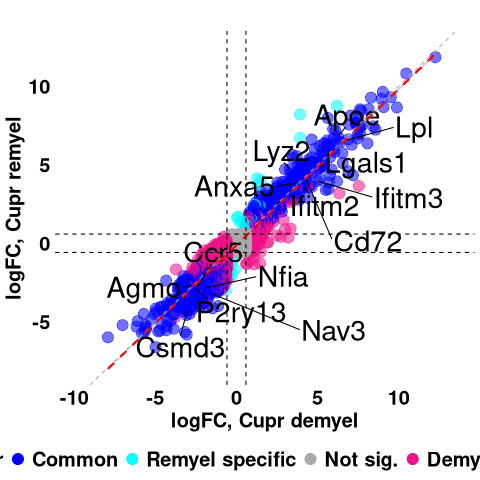

In [122]:
%%R

# Create the scatter plot with corrected color assignment for opposite_direction
p <- ggplot(filtered_out_df2, aes(x = logFC_de, y = logFC_re, 
                                  color = ifelse(opposite_direction, "gold1", 
                                  ifelse(common, "blue", 
                                  ifelse(Cupr_sig_de, "deeppink2", 
                                  ifelse(Cupr_sig_re, "cyan", "dark grey")))))) +
    geom_point(size = 5, aes(alpha = ifelse(Cupr_sig_de | Cupr_sig_de | opposite_direction, 1, 1))) +
    geom_text_repel(data = filtered_out_df2[filtered_out_df2$gene %in% genes_to_label, ], 
                    aes(label = gene), nudge_x = 1.5, point.padding = 0, size = 10, max.overlaps = Inf,
                    min.segment.length = 0, box.padding = 0.5, color = "black") +
    geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "darkgrey") +  # Add y = x line
    geom_smooth(method = "lm", linetype = "dashed", color = "red") +  # Add linear trend line with confidence interval
    geom_vline(xintercept = 0.585, linetype = "dashed", color = "black") +  # Vertical dashed line at x = 1
    geom_hline(yintercept = 0.585, linetype = "dashed", color = "black") +  # Horizontal dashed line at y = 1
    geom_vline(xintercept = -0.585, linetype = "dashed", color = "black") +  # Vertical dashed line at x = -1
    geom_hline(yintercept = -0.585, linetype = "dashed", color = "black") +  # Horizontal dashed line at y = -1
    labs(title = '',
         x = 'logFC, Cupr demyel',
         y = 'logFC, Cupr remyel',
         color = 'Significance') +
    scale_color_manual(name = 'Color',
                       values = c(blue = 'blue', deeppink2 = 'deeppink2', cyan = 'cyan', gold1 = 'gold1', 'dark grey' = 'dark grey'),
                       labels = c('Common', 'Remyel specific', 'Not sig.', 'Demyel specific', 'Opposite')) +  # Update labels for yellow
    coord_cartesian(xlim = c(-10, 13.5), ylim = c(-8, 12.5)) +  # Set x-axis and y-axis limits
    theme_minimal() +
    theme(
        text = element_text(size = 20, face = "bold", color = "black"),  # Set text size and color for all text elements
        axis.title = element_text(size = 20, face = "bold", color = "black"),  # Set axis title size and color
        axis.text = element_text(size = 20, face = "bold", color = "black"),  # Set axis text size and color
        plot.title = element_text(size = 20, face = "bold", hjust = 0.5),  # Center the title and set its size
        legend.text = element_text(size = 20),  # Set legend text size
        legend.title = element_text(size = 20),  # Set legend title size
        legend.position = "bottom",  # Move the legend to the bottom
        panel.grid = element_blank()  # Remove all grid lines
    ) +
    guides(alpha = "none")  # Remove alpha scale legend

# Save the plot with higher resolution and larger size
ggsave("./figures/dual_volcanoplot_Cupr_de_vs_re_NEW.png", plot = p, width = 16, height = 12, dpi = 300)

# Print the plot to display in the notebook (optional)
print(p)

### change ln

In [123]:
%%R

# Fit the linear model for the subset
model_subset <- lm(logFC_re ~ logFC_de, data = overlapping)

# Get summary statistics
model_subset_summary <- summary(model_subset)

# Extract R² and slope
r_squared_subset <- model_subset_summary$r.squared
slope_subset <- coef(model_subset)[2]  # Extract slope

# Print the results
cat("Slope for subset:", slope_subset, "\n")
cat("R² for subset:", r_squared_subset, "\n")

Slope for subset: 0.989235 
R² for subset: 0.847462 


In [124]:
%%R
# Fit the linear model to this subset
model_subset <- lm(logFC_re ~ logFC_de, data = subset_either)
summary(model_subset)


Call:
lm(formula = logFC_re ~ logFC_de, data = subset_either)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7854 -0.2722  0.0335  0.3023  4.4067 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.130402   0.008288  -15.73   <2e-16 ***
logFC_de     1.002764   0.004937  203.12   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5429 on 4934 degrees of freedom
Multiple R-squared:  0.8932,	Adjusted R-squared:  0.8932 
F-statistic: 4.126e+04 on 1 and 4934 DF,  p-value: < 2.2e-16



In [128]:
%%R

subset_both <- filtered_out_df2[
  (abs(filtered_out_df2$logFC_de) >= 0.585 & filtered_out_df2$Padj_de <= 0.05) & 
  (abs(filtered_out_df2$logFC_re) >= 0.585 & filtered_out_df2$Padj_re <= 0.05) & 
  (filtered_out_df2$opposite_direction == FALSE), 
  ]

dim(subset_both)

[1] 1447    9


In [129]:
%%R

# Fit the linear model for the subset
model_subset <- lm(logFC_re ~ logFC_de, data = subset_both)

# Get summary statistics
model_subset_summary <- summary(model_subset)

# Extract R² and slope
r_squared_subset <- model_subset_summary$r.squared
slope_subset <- coef(model_subset)[2]  # Extract slope

# Print the results
cat("Slope for subset:", slope_subset, "\n")
cat("R² for subset:", r_squared_subset, "\n")

Slope for subset: 1.052126 
R² for subset: 0.9500438 


In [125]:
%%R

# Fit the linear model for the subset
model_subset <- lm(logFC_re ~ logFC_de, data = subset_either)

# Get summary statistics
model_subset_summary <- summary(model_subset)

# Extract R² and slope
r_squared_subset <- model_subset_summary$r.squared
slope_subset <- coef(model_subset)[2]  # Extract slope

# Print the results
cat("Slope for subset:", slope_subset, "\n")
cat("R² for subset:", r_squared_subset, "\n")

Slope for subset: 1.002764 
R² for subset: 0.8931884 


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


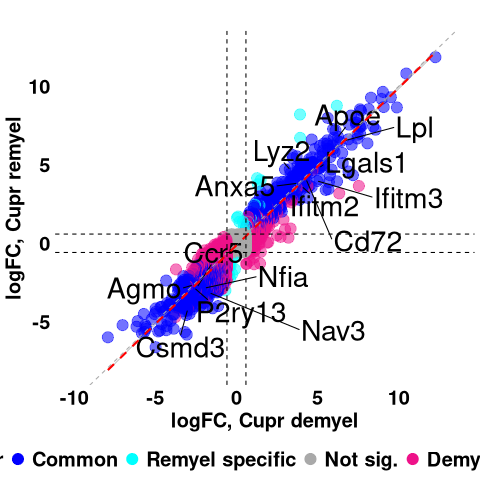

In [126]:
%%R

# Create the scatter plot with corrected color assignment for opposite_direction
p <- ggplot(filtered_out_df2, aes(x = logFC_de, y = logFC_re, 
                                  color = ifelse(opposite_direction, "gold1", 
                                  ifelse(common, "blue", 
                                  ifelse(Cupr_sig_de, "deeppink2", 
                                  ifelse(Cupr_sig_re, "cyan", "dark grey")))))) +
    geom_point(size = 5, aes(alpha = ifelse(Cupr_sig_de | Cupr_sig_de | opposite_direction, 1, 1))) +
    geom_text_repel(data = filtered_out_df2[filtered_out_df2$gene %in% genes_to_label, ], 
                    aes(label = gene), nudge_x = 1.5, point.padding = 0, size = 10, max.overlaps = Inf,
                    min.segment.length = 0, box.padding = 0.5, color = "black") +
    geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "darkgrey") +  # Add y = x line
    geom_smooth(data = subset_either, aes(x = logFC_de, y = logFC_re), 
                method = "lm", linetype = "dashed", color = "red") +  # Add linear trend line with confidence interval
    geom_vline(xintercept = 0.585, linetype = "dashed", color = "black") +  # Vertical dashed line at x = 1
    geom_hline(yintercept = 0.585, linetype = "dashed", color = "black") +  # Horizontal dashed line at y = 1
    geom_vline(xintercept = -0.585, linetype = "dashed", color = "black") +  # Vertical dashed line at x = -1
    geom_hline(yintercept = -0.585, linetype = "dashed", color = "black") +  # Horizontal dashed line at y = -1
    labs(title = '',
         x = 'logFC, Cupr demyel',
         y = 'logFC, Cupr remyel',
         color = 'Significance') +
    scale_color_manual(name = 'Color',
                       values = c(blue = 'blue', deeppink2 = 'deeppink2', cyan = 'cyan', gold1 = 'gold1', 'dark grey' = 'dark grey'),
                       labels = c('Common', 'Remyel specific', 'Not sig.', 'Demyel specific', 'Opposite')) +  # Update labels for yellow
    coord_cartesian(xlim = c(-10, 13.5), ylim = c(-8, 12.5)) +  # Set x-axis and y-axis limits
    theme_minimal() +
    theme(
        text = element_text(size = 20, face = "bold", color = "black"),  # Set text size and color for all text elements
        axis.title = element_text(size = 20, face = "bold", color = "black"),  # Set axis title size and color
        axis.text = element_text(size = 20, face = "bold", color = "black"),  # Set axis text size and color
        plot.title = element_text(size = 20, face = "bold", hjust = 0.5),  # Center the title and set its size
        legend.text = element_text(size = 20),  # Set legend text size
        legend.title = element_text(size = 20),  # Set legend title size
        legend.position = "bottom",  # Move the legend to the bottom
        panel.grid = element_blank()  # Remove all grid lines
    ) +
    guides(alpha = "none")  # Remove alpha scale legend

# Save the plot with higher resolution and larger size
ggsave("./figures/dual_volcanoplot_Cupr_de_vs_re_NEW_with_subset_lm.png", plot = p, width = 16, height = 12, dpi = 300)

# Print the plot to display in the notebook (optional)
print(p)

### Skip overlaps- this is not subset on common genes

In [ ]:
from matplotlib_venn import venn2, venn2_circles
import matplotlib.pyplot as plt

# set up gene lists
genes_LPC_up = Cupr_de_up['gene'].tolist()
genes_LPC_RE_up = Cupr_re_up['gene'].tolist()

# Convert lists to sets
set_LPC_demyel_up = set(genes_LPC_up)
set_LPC_remyel_up = set(genes_LPC_RE_up)

# Calculate overlaps
only_LPC_demyel_up = len(set_LPC_demyel_up - set_LPC_remyel_up)
only_LPC_remyel_up = len(set_LPC_remyel_up - set_LPC_demyel_up)
LPC_demyel_remyel_up = len(set_LPC_demyel_up & set_LPC_remyel_up)

# Set labels and colors
set_labels = ('Cupr_demyel', 'Cupr_remyel')
set_colors = ('#e4f0fb', '#bddbf6')  # Example colors

# Plot Venn diagram
venn = venn2(subsets=(only_LPC_demyel_up, only_LPC_remyel_up, LPC_demyel_remyel_up),
             set_labels=set_labels,
             set_colors=set_colors,
             alpha=0.5)  # Adjust transparency here

venn2_circles(subsets=(only_LPC_demyel_up, only_LPC_remyel_up, LPC_demyel_remyel_up), linewidth=1)

# Increase text size for subset counts
for label in venn.subset_labels:
    if label:  # Check if label is not None
        label.set_fontsize(14)  # Adjust font size here
        label.set_color('black')  # Set text color to white
        label.set_fontweight('bold')  # Set font weight to bold

# Increase text size for set labels
for text in venn.set_labels:
    text.set_fontsize(14)

# Display the plot
plt.title('Sig. Up DEGs: Cupr de vs remyel DAMs', fontsize=16)

# Save the plot
plt.savefig('./figures/venn2_Cupr_de_vs_re_DAMs_up.png', dpi=300, bbox_inches='tight', facecolor='none')

plt.show()

In [ ]:
# Set up gene lists
genes_LPC_down = Cupr_de_down['gene'].tolist()
genes_LPC_RE_down = Cupr_re_down['gene'].tolist()

# Convert lists to sets
set_LPC_demyel_down = set(genes_LPC_down)
set_LPC_remyel_down = set(genes_LPC_RE_down)

# Calculate overlaps
only_LPC_demyel_down = len(set_LPC_demyel_down - set_LPC_remyel_down)
only_LPC_remyel_down = len(set_LPC_remyel_down - set_LPC_demyel_down)
LPC_demyel_remyel_down = len(set_LPC_demyel_down & set_LPC_remyel_down)

# Set labels and colors
set_labels = ('Cupr_demyel', 'Cupr_remyel')
set_colors = ('#e4f0fb', '#bddbf6')  # Example colors

# Plot Venn diagram
venn = venn2(subsets=(only_LPC_demyel_down, only_LPC_remyel_down, LPC_demyel_remyel_down),
             set_labels=set_labels,
             set_colors=set_colors,
             alpha=0.5)  # Adjust transparency here

venn2_circles(subsets=(only_LPC_demyel_down, only_LPC_remyel_down, LPC_demyel_remyel_down), linewidth=1)

# Increase text size for subset counts
for label in venn.subset_labels:
    if label:  # Check if label is not None
        label.set_fontsize(14)  # Adjust font size here
        label.set_color('black')  # Set text color to white
        label.set_fontweight('bold')  # Set font weight to bold

# Increase text size for set labels
for text in venn.set_labels:
    text.set_fontsize(14)

# Display the plot
plt.title('Sig. Down DEGs: Cupr de vs remyel DAMs', fontsize=16)

# Save the plot
plt.savefig('./figures/venn2_Cupr_de_vs_re_DAMs_down.png', dpi=300, bbox_inches='tight', facecolor='none')

plt.show()

# LPC/Cupr demyelination

In [130]:
# Create gene lists from the dfs:
genes_LPC_demyel_2_up = LPC_demyel_2_up['gene'].tolist()
genes_LPC_de_up = LPC_de_up['gene'].tolist()
genes_LPC_re_up = LPC_re_up['gene'].tolist()
genes_Cupr_de_up = Cupr_de_up['gene'].tolist()
genes_Cupr_re_up = Cupr_re_up['gene'].tolist()

# Convert lists to sets for upregulated genes
set_LPC_demyel_2_up = set(genes_LPC_demyel_2_up)
set_LPC_de_up = set(genes_LPC_de_up)
set_LPC_re_up = set(genes_LPC_re_up)
set_Cupr_de_up = set(genes_Cupr_de_up)
set_Cupr_re_up = set(genes_Cupr_re_up)

In [131]:
genes_LPC_demyel_2_down = LPC_demyel_2_down['gene'].tolist()
genes_LPC_de_down = LPC_de_down['gene'].tolist()
genes_LPC_re_down = LPC_re_down['gene'].tolist()
genes_Cupr_de_down = Cupr_de_down['gene'].tolist()
genes_Cupr_re_down = Cupr_re_down['gene'].tolist()

set_LPC_demyel_2_down = set(genes_LPC_demyel_2_down)
set_LPC_de_down = set(genes_LPC_de_down)
set_LPC_re_down = set(genes_LPC_re_down)
set_Cupr_de_down = set(genes_Cupr_de_down)
set_Cupr_re_down = set(genes_Cupr_re_down)

In [132]:
# Overlap of upregulated genes
overlap_up = set_LPC_de_up & set_Cupr_de_up
print("Number of overlapping upregulated genes:", len(overlap_up))
print("Overlapping upregulated genes:", overlap_up)

Number of overlapping upregulated genes: 510
Overlapping upregulated genes: {'Rpl32', 'Anxa5', 'Cotl1', 'Lrpap1', 'Myof', 'Fmn1', 'Gabarap', 'Rpl36al', 'Cd300lf', 'Arl5c', 'Lipa', 'Pgls', 'Rufy3', 'Wfdc17', 'Gk', 'Mmd', 'Ndufv3', 'Apoe', 'Mrps24', 'St3gal1', 'Cdk1', 'Ranbp1', 'Cox7b', 'Mrpl33', 'Nlrc3', 'Adam33', 'Psma7', 'Bhlhe40', 'Cd68', 'Snhg20', 'Swi5', 'Ube2c', 'Slc25a13', 'Mrpl27', 'Gpr65', 'Anxa2', 'Actr3b', 'Cd72', 'Ptger4', 'Ahnak2', 'Mfsd12', 'Fabp3', 'Apbb2', 'Coa5', 'Uqcrh', 'Mpp7', 'Rab7b', 'Mrpl54', 'Asna1', 'Cd44', 'Fn1', 'Gas2l3', 'Ms4a7', 'Axl', 'Lgals3bp', 'Arhgap24', 'Cyba', 'Rida', 'Tnni2', 'Cd200r4', 'Hcar2', 'Cox8a', 'Vps29', 'Il3ra', 'H2afj', 'Slirp', 'Syngr1', 'Serpine2', 'Slc25a3', 'Prdx4', 'Psma1', 'Cdkn3', 'Spg21', 'Tmem80', 'Fkbp2', 'Hilpda', 'Cpd', 'Osbpl3', 'Gmnn', 'Mocs2', 'Gba', 'Speg', 'Lilr4b', 'Mrpl21', 'Rbms1', 'Pkm', 'Fcer1g', 'Commd4', 'Fxn', 'Slc31a2', 'Reps2', 'Tpd52', 'Gpi1', 'Plin3', 'Birc5', 'Ctse', 'Ifi27l2a', 'Arap2', 'Ndufb2', 'Rrs1', 'Cap

In [133]:
# Overlap of upregulated genes
overlap_down = set_LPC_de_down & set_Cupr_de_down
print("Number of overlapping downregulated genes:", len(overlap_down))
print("Overlapping downregulated genes:", overlap_down)

Number of overlapping downregulated genes: 2133
Overlapping downregulated genes: {'Tmem204', 'Zfp213', 'Mllt11', 'Dguok', 'Zc3h4', 'Gm3164', 'Dnhd1', 'Zfp710', 'Pspc1', 'Rgs2', 'Top1', 'Cic', 'Msh5', 'Ube2h', 'Cul9', 'Gm10563', 'Pias3', 'Col15a1', 'Rapgef5', 'Hspa12a', 'Pprc1', 'Gon4l', 'Crebbp', 'Ppox', '2700049A03Rik', 'Ern1', 'Top3b', 'Cdyl2', 'Impact', 'Adrb1', 'Dagla', 'Smad7', 'Scaf4', 'Dock8', 'Wipf2', 'Phf2', 'Xpnpep3', 'I830077J02Rik', 'Ccdc192', 'Prdm11', 'Maf', 'Dennd2a', 'Gbf1', 'Chil1', 'Lmbr1l', 'Rapgef6', 'Etv5', 'Gm12743', 'Cklf', 'Shb', 'Rnf167', 'Slc2a5', 'Gigyf1', '2700081O15Rik', 'Usp42', 'Rsrc2', 'Atg10', 'Morn1', 'Gm17056', 'Tor1aip1', 'Uso1', 'Arhgap27', 'Alox5', 'Stard8', 'Zfp113', 'Myom1', 'Pknox1', 'Rsf1os1', 'Prkn', 'Cyp4f13', 'Tex10', 'Homer1', 'Sall3', 'Ildr1', 'Ccdc51', 'Pla2g4a', 'Acvr2a', 'Gm50209', 'Rnf135', 'Plxna4', 'Gm41611', 'Ubr5', 'Mapk8', 'Txnip', 'Rasal3', 'Polr2a', 'Arid1b', 'Brpf1', 'Arid1a', 'Trmt10a', 'Nfat5', 'Casc3', 'Xbp1', 'Gm37876', 'Ta

# Plots: LPC vs cupr demyel

In [134]:
LPC_sig_de = LPC_demyel[(LPC_demyel.Padj < 0.05) & (LPC_demyel.logFC.abs() > 1)]
LPC_sig_de.shape

(3155, 7)

In [135]:
Cupr_sig_de = Cupr_demyel[(Cupr_demyel.Padj < 0.05) & (Cupr_demyel.logFC.abs() > 1)]
Cupr_sig_de.shape

(3201, 7)

In [136]:
# Find the highest and lowest values of logFC
highest_logFC = LPC_sig_de['logFC'].max()
lowest_logFC = LPC_sig_de['logFC'].min()

# Print the results
print("Highest logFC:", highest_logFC)
print("Lowest logFC:", lowest_logFC)

Highest logFC: 8.86065117646569
Lowest logFC: -8.09576683028079


In [137]:
# Find the highest and lowest values of logFC
highest_logFC = Cupr_sig_de['logFC'].max()
lowest_logFC = Cupr_sig_de['logFC'].min()

# Print the results
print("Highest logFC:", highest_logFC)
print("Lowest logFC:", lowest_logFC)

Highest logFC: 12.2649811592676
Lowest logFC: -7.92549239745556


In [138]:
# Find the overlapping genes
overlapping_genes = set(LPC_demyel['gene']).intersection(set(Cupr_demyel['gene']))

# Extract rows with overlapping genes
LPC_de_overlap = LPC_demyel[LPC_demyel['gene'].isin(overlapping_genes)]
Cupr_de_overlap = Cupr_demyel[Cupr_demyel['gene'].isin(overlapping_genes)]

# Rename columns appropriately
LPC_de_overlap = LPC_de_overlap.rename(columns={'logFC': 'logFC_LPC_de', 'Padj': 'Padj_LPC_de'})
Cupr_de_overlap = Cupr_de_overlap.rename(columns={'logFC': 'logFC_Cupr_de', 'Padj': 'Padj_Cupr_de'})

# Merge data frames on the gene column
overlapping = pd.merge(LPC_de_overlap, Cupr_de_overlap, on='gene')

# Select the desired columns
overlapping = overlapping[['gene', 'logFC_LPC_de', 'Padj_LPC_de', 'logFC_Cupr_de', 'Padj_Cupr_de']]

# Order columns
overlapping = overlapping.sort_values(by='logFC_LPC_de', ascending=False)
print(overlapping.shape)

(9804, 5)


In [139]:
overlapping[:5]

,gene,logFC_LPC_de,Padj_LPC_de,logFC_Cupr_de,Padj_Cupr_de
1024,Spp1,8.860651,0.001352,12.264981,6.614749e-07
222,Igf1,8.825738,0.000052,8.943051,3.097803e-07
659,Lgals3,8.480823,0.000458,7.614927,3.735896e-08
1637,Fabp5,8.431502,0.004350,8.150478,4.489843e-07
249,Gpnmb,8.328498,0.000060,10.467026,2.656511e-05


In [140]:
# Define significant genes
overlapping['LPC_sig_de'] = (overlapping['Padj_LPC_de'] < 0.05) & (abs(overlapping['logFC_LPC_de']) > 0.585)
overlapping['Cupr_sig_de'] = (overlapping['Padj_Cupr_de'] < 0.05) & (abs(overlapping['logFC_Cupr_de']) > 0.585)

# Add 'common' column based on conditions
overlapping['common'] = overlapping['LPC_sig_de'] & overlapping['Cupr_sig_de']

# Create opposite direction column based on correct conditions
# Genes that are upregulated in one set and downregulated in the other
condition1 = (overlapping['Padj_LPC_de'] < 0.05) & (overlapping['logFC_LPC_de'] > 0.585) & (overlapping['Padj_Cupr_de'] < 0.05) & (overlapping['logFC_Cupr_de'] < -0.585)
condition2 = (overlapping['Padj_Cupr_de'] < 0.05) & (overlapping['logFC_Cupr_de'] > 0.585) & (overlapping['Padj_LPC_de'] < 0.05) & (overlapping['logFC_LPC_de'] < -0.585)

# Update opposite_direction column with correct conditions
overlapping['opposite_direction'] = condition1 | condition2

# Display the DataFrame
overlapping[:5]

,gene,logFC_LPC_de,Padj_LPC_de,logFC_Cupr_de,Padj_Cupr_de,LPC_sig_de,Cupr_sig_de,common,opposite_direction
1024,Spp1,8.860651,0.001352,12.264981,6.614749e-07,True,True,True,False
222,Igf1,8.825738,0.000052,8.943051,3.097803e-07,True,True,True,False
659,Lgals3,8.480823,0.000458,7.614927,3.735896e-08,True,True,True,False
1637,Fabp5,8.431502,0.004350,8.150478,4.489843e-07,True,True,True,False
249,Gpnmb,8.328498,0.000060,10.467026,2.656511e-05,True,True,True,False


In [141]:
# Count the genes in opposite direction
sig_Cupr_de = overlapping['Cupr_sig_de'].sum()
print(f"Number of sig DEGS in sig_Cupr_de: {sig_Cupr_de}")

# Count the genes in opposite direction
sig_LPC_de = overlapping['LPC_sig_de'].sum()
print(f"Number of sig DEGS in sig_LPC_de: {sig_LPC_de}")

Number of sig DEGS in sig_Cupr_de: 5229
Number of sig DEGS in sig_LPC_de: 3629


In [142]:
# Count the genes in opposite direction
opposite_direction_count = overlapping['opposite_direction'].sum()
print(f"Number of genes with opposite changes: {opposite_direction_count}")

overlapping_common = overlapping[overlapping['common']]
print(f"Number of common sig genes: {overlapping_common.shape}")

# Assuming 'overlapping' is your dataframe
filtered_opposite_direction = overlapping[overlapping['opposite_direction'] == True]
filtered_opposite_direction

Number of genes with opposite changes: 36
Number of common sig genes: (2679, 9)


,gene,logFC_LPC_de,Padj_LPC_de,logFC_Cupr_de,Padj_Cupr_de,LPC_sig_de,Cupr_sig_de,common,opposite_direction
1755,Fbxl5,4.306783,0.005399,-0.694125,0.034194,True,True,True,True
2076,Ube2d1,3.880705,0.008865,-0.742971,0.029169,True,True,True,True
3621,Mfn1,3.166498,0.046743,-0.746743,0.010896,True,True,True,True
1970,Smarcd1,2.997899,0.007699,-1.296846,0.001011,True,True,True,True
2526,1700025G04Rik,2.973151,0.015880,-0.945051,0.010406,True,True,True,True
3411,Gdpd1,2.913867,0.038810,-1.465294,0.002922,True,True,True,True
3664,Tm7sf3,2.833636,0.049030,-0.732651,0.045460,True,True,True,True
1887,Rpa1,2.650699,0.006711,-0.586111,0.009119,True,True,True,True
2749,Ints4,2.602472,0.020370,-1.065692,0.001719,True,True,True,True
3119,Wdr60,2.523150,0.029946,-0.658308,0.021081,True,True,True,True


In [143]:
# Apply the conditions to filter the DataFrame
filtered_DE = overlapping[
    (abs(overlapping['logFC_LPC_de']) > 0.585) & 
    (overlapping['Padj_LPC_de'] > 0.05) &
    (overlapping['Cupr_sig_de'] == False)
]

# Print the filtered DataFrame to verify
print("Filtered DataFrame:")
print(filtered_DE.shape)

# Apply the conditions to filter the DataFrame
filtered_RE = overlapping[
    (abs(overlapping['logFC_Cupr_de']) > 0.585) & 
    (overlapping['Padj_Cupr_de'] > 0.05) &
    (overlapping['LPC_sig_de'] == False)
]

# Print the filtered DataFrame to verify
print("Filtered DataFrame:")
print(filtered_RE.shape)

Filtered DataFrame:
(1195, 9)
Filtered DataFrame:
(229, 9)


In [144]:
# Filter out the rows from the overlapping DataFrame for the first condition
filtered_out_df1 = overlapping[
    ~(
        (abs(overlapping['logFC_LPC_de']) > 0.585) & 
        (overlapping['Padj_LPC_de'] > 0.05) &
        (~overlapping['Cupr_sig_de'])  # Ensure Cupr_sig_de is False
    )
]

# Print the resulting DataFrame to verify
print("Filtered Out DataFrame1:")
print(filtered_out_df1.shape)  # Expected: 10330 - 744 = 9586

# Filter out the rows from filtered_out_df1 for the second condition
filtered_out_df2 = filtered_out_df1[
    ~(
        (abs(filtered_out_df1['logFC_Cupr_de']) > 0.585) & 
        (filtered_out_df1['Padj_Cupr_de'] > 0.05) &
        (~filtered_out_df1['LPC_sig_de'])  # Ensure LPC_sig_de is False
    )
]

# Print the resulting DataFrame to verify
print("Filtered Out DataFrame2:")
print(filtered_out_df2.shape)  # Expected: 9586 - 99 = 9487


Filtered Out DataFrame1:
(8609, 9)
Filtered Out DataFrame2:
(8534, 9)


In [145]:
filtered_out_df2[:5]

,gene,logFC_LPC_de,Padj_LPC_de,logFC_Cupr_de,Padj_Cupr_de,LPC_sig_de,Cupr_sig_de,common,opposite_direction
1024,Spp1,8.860651,0.001352,12.264981,6.614749e-07,True,True,True,False
222,Igf1,8.825738,0.000052,8.943051,3.097803e-07,True,True,True,False
659,Lgals3,8.480823,0.000458,7.614927,3.735896e-08,True,True,True,False
1637,Fabp5,8.431502,0.004350,8.150478,4.489843e-07,True,True,True,False
249,Gpnmb,8.328498,0.000060,10.467026,2.656511e-05,True,True,True,False


In [146]:
# Count the number of True values in sig_MOL2 but not in sig_MOL4
count_sig_lpc_de_only = ((filtered_out_df2['LPC_sig_de'] == True) & (filtered_out_df2['Cupr_sig_de'] == False)).sum()

# Count the number of True values in sig_MOL2 but not in sig_MOL4
count_sig_cup_de_only = ((filtered_out_df2['Cupr_sig_de'] == True) & (filtered_out_df2['LPC_sig_de'] == False)).sum()

# Count the number of True values in common
count_common = filtered_out_df2['common'].sum()

# Display the counts
print("Number of True values in LPC only:", count_sig_lpc_de_only)
print("Number of True values in Cupr only:", count_sig_cup_de_only)
print("Number of True values in common:", count_common)

# Show one gene where opposite_direction is True
gene_opposite_direction = filtered_out_df2[filtered_out_df2['opposite_direction'] == True]['gene']

# Display the gene
print(gene_opposite_direction.count(), "gene in opposite_direction:", gene_opposite_direction)

Number of True values in LPC only: 950
Number of True values in Cupr only: 2550
Number of True values in common: 2679
36 gene in opposite_direction: 1755            Fbxl5
2076           Ube2d1
3621             Mfn1
1970          Smarcd1
2526    1700025G04Rik
3411            Gdpd1
3664           Tm7sf3
1887             Rpa1
2749            Ints4
3119            Wdr60
3297           Tmem19
2795            Bcl7a
2893           Srebf1
1237           Prkacb
3321            Wdtc1
2695           Znhit3
3666            Atg4c
3610          Zfyve21
3200            Nt5c3
3592           Fbxo31
3423            Rmdn3
3314           Tspan3
3365            Kat2b
3601             Orc6
2458          Fam204a
3503            Fbxo8
3361             Hagh
1823           Adgre1
2845            Gpr35
3305    A530013C23Rik
2133           Lrrc63
1853          Gm10634
3445          St8sia6
394             Kdm5d
452           Eif2s3y
554               Uty
Name: gene, dtype: object


In [147]:
# Extract the logFC_de and logFC_re columns for correlation
logFC_LPC = filtered_out_df2['logFC_LPC_de']
logFC_Cupr = filtered_out_df2['logFC_Cupr_de']

# Compute the Pearson correlation and the p-value
pearson_corr, p_value = pearsonr(logFC_LPC, logFC_Cupr)

# Print the results
print(f"Pearson Correlation: {pearson_corr}")
print(f"P-value: {p_value}")

Pearson Correlation: 0.7469884688587347
P-value: 0.0


In [148]:
%%R -i filtered_out_df2

# Fit a linear model
model <- lm(logFC_Cupr_de ~ logFC_LPC_de, data = filtered_out_df2)

# Summary of the model to get R^2
model_summary <- summary(model)
r_squared <- model_summary$r.squared

print(model_summary)
print(r_squared)


Call:
lm(formula = logFC_Cupr_de ~ logFC_LPC_de, data = filtered_out_df2)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.3817 -0.3722 -0.0404  0.2970  7.1513 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.229949   0.009564  -24.04   <2e-16 ***
logFC_LPC_de  0.707754   0.006820  103.78   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8714 on 8532 degrees of freedom
Multiple R-squared:  0.558,	Adjusted R-squared:  0.5579 
F-statistic: 1.077e+04 on 1 and 8532 DF,  p-value: < 2.2e-16

[1] 0.5579918


In [149]:
%%R

# Calculate the Pearson correlation
pearson_corr <- cor(filtered_out_df2$logFC_LPC_de, filtered_out_df2$logFC_Cupr_de)

### New overlaps:

In [150]:
filtered_out_df2[:5]

,gene,logFC_LPC_de,Padj_LPC_de,logFC_Cupr_de,Padj_Cupr_de,LPC_sig_de,Cupr_sig_de,common,opposite_direction
1024,Spp1,8.860651,0.001352,12.264981,6.614749e-07,True,True,True,False
222,Igf1,8.825738,0.000052,8.943051,3.097803e-07,True,True,True,False
659,Lgals3,8.480823,0.000458,7.614927,3.735896e-08,True,True,True,False
1637,Fabp5,8.431502,0.004350,8.150478,4.489843e-07,True,True,True,False
249,Gpnmb,8.328498,0.000060,10.467026,2.656511e-05,True,True,True,False


In [151]:
# Count UP-regulated genes (logFC > 0) in LPC_de
count_up_LPC_de = ((filtered_out_df2['logFC_LPC_de'] >= 0.585) & (filtered_out_df2['Padj_LPC_de'] < 0.05)).sum()

# Count DOWN-regulated genes (logFC < 0) in LPC_de
count_down_LPC_de = ((filtered_out_df2['logFC_LPC_de'] <= -0.585) & (filtered_out_df2['Padj_LPC_de'] < 0.05)).sum()

# Count UP-regulated genes (logFC > 0) in LPC_re
count_up_Cupr_de = ((filtered_out_df2['logFC_Cupr_de'] >= 0.585) & (filtered_out_df2['Padj_Cupr_de'] < 0.05)).sum()

# Count DOWN-regulated genes (logFC < 0) in LPC_re
count_down_Cupr_de = ((filtered_out_df2['logFC_Cupr_de'] <= -0.585) & (filtered_out_df2['Padj_Cupr_de'] < 0.05)).sum()

# Count common UP-regulated genes (significant & logFC > 0 in both conditions)
count_common_up = ((filtered_out_df2['logFC_LPC_de'] >= 0.585) & (filtered_out_df2['Padj_LPC_de'] < 0.05) &
                   (filtered_out_df2['logFC_Cupr_de'] >= 0.585) & (filtered_out_df2['Padj_Cupr_de'] < 0.05)).sum()

# Count common DOWN-regulated genes (significant & logFC < 0 in both conditions)
count_common_down = ((filtered_out_df2['logFC_LPC_de'] <= -0.585) & (filtered_out_df2['Padj_LPC_de'] < 0.05) &
                     (filtered_out_df2['logFC_Cupr_de'] <= -0.585) & (filtered_out_df2['Padj_Cupr_de'] < 0.05)).sum()

# Count genes that change direction (UP in one, DOWN in the other)
count_opposite_direction = (filtered_out_df2['opposite_direction'] == True).sum()

# Display the counts
print("UP-regulated DEGs in LPC_de:", count_up_LPC_de)
print("DOWN-regulated DEGs in LPC_de:", count_down_LPC_de)
print("UP-regulated DEGs in Cupr de:", count_up_Cupr_de)
print("DOWN-regulated DEGs in Cupr de:", count_down_Cupr_de)
print("Common UP-regulated DEGs:", count_common_up)
print("Common DOWN-regulated DEGs:", count_common_down)
print("Genes with opposite direction:", count_opposite_direction)

UP-regulated DEGs in LPC_de: 1049
DOWN-regulated DEGs in LPC_de: 2580
UP-regulated DEGs in Cupr de: 1058
DOWN-regulated DEGs in Cupr de: 4171
Common UP-regulated DEGs: 510
Common DOWN-regulated DEGs: 2133
Genes with opposite direction: 36


In [152]:
# Count UP-regulated genes unique to LPC_de (significant in LPC_de but NOT in LPC_re)
count_unique_up_LPC_de = ((filtered_out_df2['logFC_LPC_de'] >= 0.585) & (filtered_out_df2['Padj_LPC_de'] < 0.05) & 
                          ~((filtered_out_df2['logFC_Cupr_de'] >= 0.585) & (filtered_out_df2['Padj_Cupr_de'] < 0.05))).sum()

# Count DOWN-regulated genes unique to LPC_de (significant in LPC_de but NOT in LPC_re)
count_unique_down_LPC_de = ((filtered_out_df2['logFC_LPC_de'] <= -0.585) & (filtered_out_df2['Padj_LPC_de'] < 0.05) & 
                            ~((filtered_out_df2['logFC_Cupr_de'] <= -0.585) & (filtered_out_df2['Padj_Cupr_de'] < 0.05))).sum()

# Count UP-regulated genes unique to LPC_re (significant in LPC_re but NOT in LPC_de)
count_unique_up_LPC_re = ((filtered_out_df2['logFC_Cupr_de'] >= 0.585) & (filtered_out_df2['Padj_Cupr_de'] < 0.05) & 
                          ~((filtered_out_df2['logFC_LPC_de'] >= 0.585) & (filtered_out_df2['Padj_LPC_de'] < 0.05))).sum()

# Count DOWN-regulated genes unique to LPC_re (significant in LPC_re but NOT in LPC_de)
count_unique_down_LPC_re = ((filtered_out_df2['logFC_Cupr_de'] <= -0.585) & (filtered_out_df2['Padj_Cupr_de'] < 0.05) & 
                            ~((filtered_out_df2['logFC_LPC_de'] <= -0.585) & (filtered_out_df2['Padj_LPC_de'] < 0.05))).sum()

# Display the counts
print("Unique UP-regulated DEGs in LPC_de:", count_unique_up_LPC_de)
print("Unique DOWN-regulated DEGs in LPC_de:", count_unique_down_LPC_de)
print("Unique UP-regulated DEGs in LPC_re:", count_unique_up_LPC_re)
print("Unique DOWN-regulated DEGs in LPC_re:", count_unique_down_LPC_re)


Unique UP-regulated DEGs in LPC_de: 539
Unique DOWN-regulated DEGs in LPC_de: 447
Unique UP-regulated DEGs in LPC_re: 548
Unique DOWN-regulated DEGs in LPC_re: 2038


In [153]:
%%R
dim(overlapping)

[1] 9239    9


In [154]:
# Extract the logFC_de and logFC_re columns for correlation
logFC_de = filtered_out_df2['logFC_LPC_de']
logFC_re = filtered_out_df2['logFC_Cupr_de']

# Compute the Pearson correlation and the p-value
pearson_corr, p_value = pearsonr(logFC_de, logFC_re)

# Print the results
print(f"Pearson Correlation: {pearson_corr}")
print(f"P-value: {p_value}")

Pearson Correlation: 0.7469884688587347
P-value: 0.0


In [155]:
# Extract the logFC_de and logFC_re columns for correlation
logFC_de = overlapping['logFC_LPC_de']
logFC_re = overlapping['logFC_Cupr_de']

# Compute the Pearson correlation and the p-value
pearson_corr, p_value = pearsonr(logFC_de, logFC_re)

# Print the results
print(f"Pearson Correlation: {pearson_corr}")
print(f"P-value: {p_value}")

Pearson Correlation: 0.7252357495078651
P-value: 0.0


In [156]:
%%R -i filtered_out_df2

# Fit a linear model
model <- lm(logFC_Cupr_de ~ logFC_LPC_de, data = filtered_out_df2)

# Summary of the model to get R^2
model_summary <- summary(model)
r_squared <- model_summary$r.squared

print(model_summary)
print(r_squared)


Call:
lm(formula = logFC_Cupr_de ~ logFC_LPC_de, data = filtered_out_df2)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.3817 -0.3722 -0.0404  0.2970  7.1513 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.229949   0.009564  -24.04   <2e-16 ***
logFC_LPC_de  0.707754   0.006820  103.78   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8714 on 8532 degrees of freedom
Multiple R-squared:  0.558,	Adjusted R-squared:  0.5579 
F-statistic: 1.077e+04 on 1 and 8532 DF,  p-value: < 2.2e-16

[1] 0.5579918


In [157]:
%%R -i overlapping

# Fit a linear model
model <- lm(logFC_Cupr_de ~ logFC_LPC_de, data = overlapping)

# Summary of the model to get R^2
model_summary <- summary(model)
r_squared <- model_summary$r.squared

print(model_summary)
print(r_squared)


Call:
lm(formula = logFC_Cupr_de ~ logFC_LPC_de, data = overlapping)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.4093 -0.3976 -0.0428  0.3025  6.9045 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.259329   0.008697  -29.82   <2e-16 ***
logFC_LPC_de  0.661242   0.006341  104.29   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8576 on 9802 degrees of freedom
Multiple R-squared:  0.526,	Adjusted R-squared:  0.5259 
F-statistic: 1.088e+04 on 1 and 9802 DF,  p-value: < 2.2e-16

[1] 0.5259669


In [158]:
filtered_out_df2[:2]

,gene,logFC_LPC_de,Padj_LPC_de,logFC_Cupr_de,Padj_Cupr_de,LPC_sig_de,Cupr_sig_de,common,opposite_direction
1024,Spp1,8.860651,0.001352,12.264981,6.614749e-07,True,True,True,False
222,Igf1,8.825738,0.000052,8.943051,3.097803e-07,True,True,True,False


In [159]:
%%R

subset_both <- filtered_out_df2[
  (abs(filtered_out_df2$logFC_LPC_de) >= 0.585 & filtered_out_df2$Padj_LPC_de <= 0.05) & 
  (abs(filtered_out_df2$logFC_Cupr_de) >= 0.585 & filtered_out_df2$Padj_Cupr_de <= 0.05) &
  (filtered_out_df2$opposite_direction == FALSE), 
  ]

dim(subset_both)

[1] 2643    9


In [160]:
%%R

subset_either <- filtered_out_df2[
  ((abs(filtered_out_df2$logFC_LPC_de) >= 0.585 & filtered_out_df2$Padj_LPC_de <= 0.05) |
   (abs(filtered_out_df2$logFC_Cupr_de) >= 0.585 & filtered_out_df2$Padj_Cupr_de <= 0.05)),
  ]

dim(subset_either)

[1] 6179    9


In [161]:
%%R

# Fit a linear model
model <- lm(logFC_Cupr_de ~ logFC_LPC_de, data = subset_either)

# Summary of the model to get R^2
model_summary <- summary(model)
r_squared <- model_summary$r.squared

print(model_summary)
print(r_squared)


Call:
lm(formula = logFC_Cupr_de ~ logFC_LPC_de, data = subset_either)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.3535 -0.4900 -0.0831  0.3424  7.1984 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.253341   0.013033  -19.44   <2e-16 ***
logFC_LPC_de  0.711739   0.007965   89.36   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.005 on 6177 degrees of freedom
Multiple R-squared:  0.5638,	Adjusted R-squared:  0.5637 
F-statistic:  7984 on 1 and 6177 DF,  p-value: < 2.2e-16

[1] 0.563813


In [162]:
%%R

# Fit a linear model
model <- lm(logFC_Cupr_de ~ logFC_LPC_de, data = subset_both)

# Summary of the model to get R^2
model_summary <- summary(model)
r_squared <- model_summary$r.squared

print(model_summary)
print(r_squared)


Call:
lm(formula = logFC_Cupr_de ~ logFC_LPC_de, data = subset_both)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5226 -0.3529 -0.0576  0.2489  5.5905 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.033052   0.015545   2.126   0.0336 *  
logFC_LPC_de 0.867147   0.007569 114.568   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7236 on 2641 degrees of freedom
Multiple R-squared:  0.8325,	Adjusted R-squared:  0.8324 
F-statistic: 1.313e+04 on 1 and 2641 DF,  p-value: < 2.2e-16

[1] 0.832497


###

In [163]:
%%R
# Sort the dataframe by 'logFC_de' in descending order
filtered_out_df2_sorted <- filtered_out_df2[order(-filtered_out_df2$logFC_LPC_de), ]

# View the top of the sorted dataframe
head(filtered_out_df2_sorted, 20)

         gene logFC_LPC_de  Padj_LPC_de logFC_Cupr_de Padj_Cupr_de LPC_sig_de
1024     Spp1     8.860651 1.351861e-03     12.264981 6.614749e-07       TRUE
222      Igf1     8.825738 5.229549e-05      8.943051 3.097803e-07       TRUE
659    Lgals3     8.480823 4.577208e-04      7.614927 3.735896e-08       TRUE
1637    Fabp5     8.431502 4.349513e-03      8.150478 4.489843e-07       TRUE
249     Gpnmb     8.328498 6.032859e-05     10.467026 2.656511e-05       TRUE
1797    Apoc1     6.895404 5.691519e-03      9.080148 1.621905e-06       TRUE
363     Psat1     6.451828 1.345243e-04      3.206994 1.080451e-04       TRUE
977     Ms4a7     6.350836 1.159100e-03      7.680548 4.274137e-03       TRUE
2122   Ctla2a     6.177716 9.571093e-03      7.766100 1.334475e-04       TRUE
263     Sash1     5.904167 6.775946e-05      4.044982 2.695833e-06       TRUE
3429   Wfdc17     5.887264 3.925301e-02      6.942032 6.255984e-05       TRUE
2427    Apoc2     5.861747 1.412667e-02      9.888681 2.182407e-

In [164]:
%%R
# Sort the dataframe by 'logFC_de' in descending order
filtered_out_df2_sorted <- filtered_out_df2[order(filtered_out_df2$logFC_LPC_de), ]

# View the top of the sorted dataframe
head(filtered_out_df2_sorted, 20)

              gene logFC_LPC_de  Padj_LPC_de logFC_Cupr_de Padj_Cupr_de
212          Chst8    -6.861981 4.972603e-05     -5.042957 3.735896e-08
23         Gm31243    -6.739560 1.537804e-06     -5.686056 2.443187e-07
554            Uty    -6.003926 3.099921e-04      2.493395 4.354717e-02
452        Eif2s3y    -5.938474 2.054845e-04      2.718403 4.033667e-02
19         Gm17231    -5.815150 1.340566e-06     -3.314697 5.589750e-06
394          Kdm5d    -5.729107 1.630413e-04      2.831785 4.395936e-02
1032       Gm44577    -5.398733 1.390219e-03     -4.332893 1.728382e-07
24   4933433G15Rik    -5.371664 1.703389e-06     -2.308489 6.953320e-05
22           Gm826    -5.315902 1.508345e-06     -3.512350 3.735896e-08
99          Gm3173    -5.308551 1.383221e-05     -4.793586 9.860972e-07
1110 9130015G15Rik    -5.283522 1.633847e-03     -3.728360 6.658159e-05
1945          Lifr    -5.170092 7.421874e-03     -2.311789 1.728382e-07
3    C430049B03Rik    -5.118048 4.709936e-07     -3.029642 4.473

In [165]:
%%R

# Sort the dataframe by 'logFC_de' in descending order
filtered_out_df2_sorted <- filtered_out_df2[order(filtered_out_df2$logFC_LPC_de, decreasing = FALSE), ]

# View the top 50 rows
top_genes <- head(filtered_out_df2_sorted, 200)

# Create a subset dataframe where common == TRUE
subset_common <- top_genes[top_genes$common == TRUE, ]
subset_common

              gene logFC_LPC_de  Padj_LPC_de logFC_Cupr_de Padj_Cupr_de
212          Chst8    -6.861981 4.972603e-05    -5.0429571 3.735896e-08
23         Gm31243    -6.739560 1.537804e-06    -5.6860564 2.443187e-07
554            Uty    -6.003926 3.099921e-04     2.4933946 4.354717e-02
452        Eif2s3y    -5.938474 2.054845e-04     2.7184028 4.033667e-02
19         Gm17231    -5.815150 1.340566e-06    -3.3146970 5.589750e-06
394          Kdm5d    -5.729107 1.630413e-04     2.8317855 4.395936e-02
1032       Gm44577    -5.398733 1.390219e-03    -4.3328932 1.728382e-07
24   4933433G15Rik    -5.371664 1.703389e-06    -2.3084894 6.953320e-05
22           Gm826    -5.315902 1.508345e-06    -3.5123502 3.735896e-08
99          Gm3173    -5.308551 1.383221e-05    -4.7935859 9.860972e-07
1110 9130015G15Rik    -5.283522 1.633847e-03    -3.7283597 6.658159e-05
1945          Lifr    -5.170092 7.421874e-03    -2.3117895 1.728382e-07
3    C430049B03Rik    -5.118048 4.709936e-07    -3.0296424 4.473

31         TRUE        TRUE   TRUE              FALSE
1128       TRUE        TRUE   TRUE              FALSE
1117       TRUE        TRUE   TRUE              FALSE
50         TRUE        TRUE   TRUE              FALSE
312        TRUE        TRUE   TRUE              FALSE
259        TRUE        TRUE   TRUE              FALSE
65         TRUE        TRUE   TRUE              FALSE
94         TRUE        TRUE   TRUE              FALSE
177        TRUE        TRUE   TRUE              FALSE
60         TRUE        TRUE   TRUE              FALSE
55         TRUE        TRUE   TRUE              FALSE
305        TRUE        TRUE   TRUE              FALSE
820        TRUE        TRUE   TRUE              FALSE
194        TRUE        TRUE   TRUE              FALSE
703        TRUE        TRUE   TRUE              FALSE
2281       TRUE        TRUE   TRUE              FALSE
5          TRUE        TRUE   TRUE              FALSE
175        TRUE        TRUE   TRUE              FALSE
15         TRUE        TRUE 

In [166]:
%%R

# List of genes to label
genes_to_label <- c('Spp1', 'Igf1', 'Lgals3', 'Fabp5', 'Gpnmb', 'Apoc1', 'Ms4a7', 'Apoe', 'Lpl', 'Cst7',
                   'Egr2', 'Chst8', 'Cebpd', 'Trim17', 'Mertk', 'Tmem119')

# Check which genes are missing in the dataframe
missing_genes <- genes_to_label[!genes_to_label %in% filtered_out_df2$gene]

# Print missing genes
if (length(missing_genes) > 0) {
  cat("Missing genes:\n")
  print(missing_genes)
} else {
  cat("No genes are missing.\n")
}

# Filter the dataframe by matching the gene column with genes_to_label
filtered_genes_df <- filtered_out_df2[filtered_out_df2$gene %in% genes_to_label, ]

# View the filtered data
filtered_genes_df

Missing genes:
[1] "Trim17"
        gene logFC_LPC_de  Padj_LPC_de logFC_Cupr_de Padj_Cupr_de LPC_sig_de
1024    Spp1     8.860651 1.351861e-03     12.264981 6.614749e-07       TRUE
222     Igf1     8.825738 5.229549e-05      8.943051 3.097803e-07       TRUE
659   Lgals3     8.480823 4.577208e-04      7.614927 3.735896e-08       TRUE
1637   Fabp5     8.431502 4.349513e-03      8.150478 4.489843e-07       TRUE
249    Gpnmb     8.328498 6.032859e-05     10.467026 2.656511e-05       TRUE
1797   Apoc1     6.895404 5.691519e-03      9.080148 1.621905e-06       TRUE
977    Ms4a7     6.350836 1.159100e-03      7.680548 4.274137e-03       TRUE
36      Apoe     5.774016 2.308643e-06      6.265309 1.036718e-08       TRUE
88       Lpl     5.725459 1.111080e-05      6.400062 3.217526e-09       TRUE
1381    Cst7     5.473735 2.821782e-03      8.572297 3.547683e-07       TRUE
341  Tmem119    -1.977488 1.119638e-04     -2.715134 1.217731e-04       TRUE
147    Mertk    -2.304551 2.940722e-05     -1.74

In [167]:
%%R
unique(filtered_out_df2$Cupr_sig_de)

[1]  TRUE FALSE


In [168]:
%%R
filtered_out_df2$color_assignment <- ifelse(filtered_out_df2$opposite_direction, "gold1", 
                                     ifelse(filtered_out_df2$common, "blue", 
                                     ifelse(filtered_out_df2$Cupr_sig_de, "cyan", 
                                     ifelse(filtered_out_df2$LPC_sig_de, "deeppink2", "dark grey"))))

table(filtered_out_df2$color_assignment)


     blue      cyan dark grey deeppink2     gold1 
     2643      2550      2355       950        36 


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


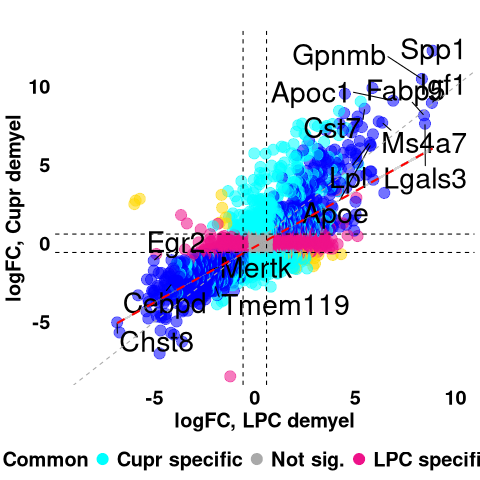

In [169]:
%%R

p <- ggplot(filtered_out_df2, aes(x = logFC_LPC_de, y = logFC_Cupr_de, 
                                  color = ifelse(opposite_direction, "gold1", 
                                  ifelse(common, "blue", 
                                  ifelse(LPC_sig_de, "deeppink2", 
                                  ifelse(Cupr_sig_de, "cyan", "dark grey")))))) +
    geom_point(size = 5, aes(alpha = ifelse(LPC_sig_de | Cupr_sig_de | opposite_direction, 1, 1))) +
    geom_text_repel(data = filtered_out_df2[filtered_out_df2$gene %in% genes_to_label, ], 
                    aes(label = gene), nudge_x = 1, point.padding = 0, size = 10, 
                    min.segment.length = 0, box.padding = 0.5, color = "black", 
                    max.overlaps = 50) +  # Increase the max.overlaps to allow more labels to be shown
    geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "darkgrey") +  # Add y = x line
    geom_smooth(method = "lm", linetype = "dashed", color = "red") +  # Add linear trend line with confidence interval
    geom_vline(xintercept = 0.585, linetype = "dashed", color = "black") +  # Vertical dashed line at x = 1
    geom_hline(yintercept = 0.585, linetype = "dashed", color = "black") +  # Horizontal dashed line at y = 1
    geom_vline(xintercept = -0.585, linetype = "dashed", color = "black") +  # Vertical dashed line at x = -1
    geom_hline(yintercept = -0.585, linetype = "dashed", color = "black") +  # Horizontal dashed line at y = -1
    labs(title = '',
         x = 'logFC, LPC demyel',
         y = 'logFC, Cupr demyel',
         color = 'Significance') +
    scale_color_manual(name = 'Color',
                       values = c(blue = 'blue', deeppink2 = 'deeppink2', cyan = 'cyan', gold1 = 'gold1', 'dark grey' = 'dark grey'),
                       labels = c('Common', 'Cupr specific', 'Not sig.', 'LPC specific', 'Opposite')) +  # Update labels for yellow
    coord_cartesian(xlim = c(-9, 10), ylim = c(-8, 12.5)) +  # Set x-axis and y-axis limits
    theme_minimal() +
    theme(
        text = element_text(size = 20, face = "bold", color = "black"),  # Set text size and color for all text elements
        axis.title = element_text(size = 20, face = "bold", color = "black"),  # Set axis title size and color
        axis.text = element_text(size = 20, face = "bold", color = "black"),  # Set axis text size and color
        plot.title = element_text(size = 20, face = "bold", hjust = 0.5),  # Center the title and set its size
        legend.text = element_text(size = 20),  # Set legend text size
        legend.title = element_text(size = 20),  # Set legend title size
        legend.position = "bottom",  # Move the legend to the bottom
        panel.grid = element_blank()  # Remove all grid lines
    ) +
    guides(alpha = "none")  # Remove alpha scale legend

# Save the plot with higher resolution and larger size
ggsave("./figures/dual_volcanoplot_LPC_vs_Cupr_de_NEW.png", plot = p, width = 16, height = 12, dpi = 300)

# Print the plot to display in the notebook (optional)
print(p)

In [170]:
%%R

# Print the slope and R^2 value
slope <- coef(model)[2]  # Get the slope from the model coefficients
cat("Slope:", slope, "\n")
cat("R^2:", r_squared, "\n")
cat("Pearson Correlation:", pearson_corr, "\n")

Slope: 0.867147 
R^2: 0.832497 
Pearson Correlation: 0.7469885 


### change ln

In [171]:
%%R

# Fit the linear model for the subset
model_subset <- lm(logFC_Cupr_de ~ logFC_LPC_de, data = overlapping)

# Get summary statistics
model_subset_summary <- summary(model_subset)

# Extract R² and slope
r_squared_subset <- model_subset_summary$r.squared
slope_subset <- coef(model_subset)[2]  # Extract slope

# Print the results
cat("Slope for subset:", slope_subset, "\n")
cat("R² for subset:", r_squared_subset, "\n")

Slope for subset: 0.6612418 
R² for subset: 0.5259669 


In [175]:
%%R

subset_both <- filtered_out_df2[
  (abs(filtered_out_df2$logFC_LPC_de) >= 0.585 & filtered_out_df2$Padj_LPC_de <= 0.05) & 
  (abs(filtered_out_df2$logFC_Cupr_de) >= 0.585 & filtered_out_df2$Padj_Cupr_de <= 0.05) &
  (filtered_out_df2$opposite_direction == FALSE), 
  ]

dim(subset_both)

[1] 2643   10


In [176]:
%%R

# Fit the linear model for the subset
model_subset <- lm(logFC_Cupr_de ~ logFC_LPC_de, data = subset_both)

# Get summary statistics
model_subset_summary <- summary(model_subset)

# Extract R² and slope
r_squared_subset <- model_subset_summary$r.squared
slope_subset <- coef(model_subset)[2]  # Extract slope

# Print the results
cat("Slope for subset:", slope_subset, "\n")
cat("R² for subset:", r_squared_subset, "\n")

Slope for subset: 0.867147 
R² for subset: 0.832497 


In [172]:
%%R

# Fit the linear model for the subset
model_subset <- lm(logFC_Cupr_de ~ logFC_LPC_de, data = subset_either)

# Get summary statistics
model_subset_summary <- summary(model_subset)

# Extract R² and slope
r_squared_subset <- model_subset_summary$r.squared
slope_subset <- coef(model_subset)[2]  # Extract slope

# Print the results
cat("Slope for subset:", slope_subset, "\n")
cat("R² for subset:", r_squared_subset, "\n")

Slope for subset: 0.7117386 
R² for subset: 0.563813 


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


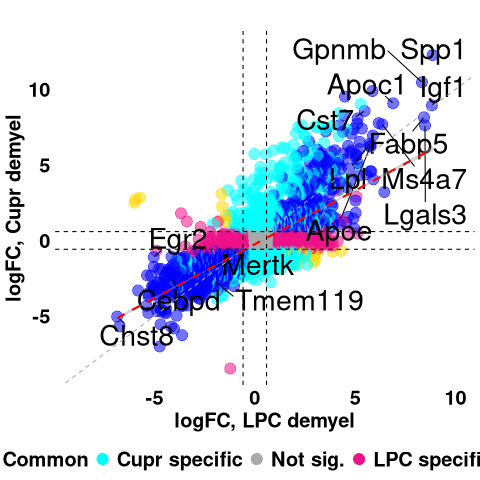

In [173]:
%%R

p <- ggplot(filtered_out_df2, aes(x = logFC_LPC_de, y = logFC_Cupr_de, 
                                  color = ifelse(opposite_direction, "gold1", 
                                  ifelse(common, "blue", 
                                  ifelse(LPC_sig_de, "deeppink2", 
                                  ifelse(Cupr_sig_de, "cyan", "dark grey")))))) +
    geom_point(size = 5, aes(alpha = ifelse(LPC_sig_de | Cupr_sig_de | opposite_direction, 1, 1))) +
    geom_text_repel(data = filtered_out_df2[filtered_out_df2$gene %in% genes_to_label, ], 
                    aes(label = gene), nudge_x = 1.5, point.padding = 0, size = 10, max.overlaps = Inf,
                    min.segment.length = 0, box.padding = 0.5, color = "black") +
    geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "darkgrey") +  # Add y = x line
    geom_smooth(data = subset_either, aes(x = logFC_LPC_de, y = logFC_Cupr_de), 
                method = "lm", linetype = "dashed", color = "red") +   # Add linear trend line with confidence interval
    geom_vline(xintercept = 0.585, linetype = "dashed", color = "black") +  # Vertical dashed line at x = 1
    geom_hline(yintercept = 0.585, linetype = "dashed", color = "black") +  # Horizontal dashed line at y = 1
    geom_vline(xintercept = -0.585, linetype = "dashed", color = "black") +  # Vertical dashed line at x = -1
    geom_hline(yintercept = -0.585, linetype = "dashed", color = "black") +  # Horizontal dashed line at y = -1
    labs(title = '',
         x = 'logFC, LPC demyel',
         y = 'logFC, Cupr demyel',
         color = 'Significance') +
    scale_color_manual(name = 'Color',
                       values = c(blue = 'blue', deeppink2 = 'deeppink2', cyan = 'cyan', gold1 = 'gold1', 'dark grey' = 'dark grey'),
                       labels = c('Common', 'Cupr specific', 'Not sig.', 'LPC specific', 'Opposite')) +  # Update labels for yellow
    coord_cartesian(xlim = c(-9, 10), ylim = c(-8.5, 12.8)) +  # Set x-axis and y-axis limits
    theme_minimal() +
    theme(
        text = element_text(size = 20, face = "bold", color = "black"),  # Set text size and color for all text elements
        axis.title = element_text(size = 20, face = "bold", color = "black"),  # Set axis title size and color
        axis.text = element_text(size = 20, face = "bold", color = "black"),  # Set axis text size and color
        plot.title = element_text(size = 20, face = "bold", hjust = 0.5),  # Center the title and set its size
        legend.text = element_text(size = 20),  # Set legend text size
        legend.title = element_text(size = 20),  # Set legend title size
        legend.position = "bottom",  # Move the legend to the bottom
        panel.grid = element_blank()  # Remove all grid lines
    ) +
    guides(alpha = "none")  # Remove alpha scale legend

# Save the plot with higher resolution and larger size
ggsave("./figures/dual_volcanoplot_LPC_vs_Cupr_de_NEW_with_subset_lm.png", plot = p, width = 16, height = 12, dpi = 300)

#ggsave("./figures/dual_volcanoplot_Cupr_de_vs_re_NEW_with_subset_lm.png", plot = p, width = 16, height = 12, dpi = 300)

# Print the plot to display in the notebook (optional)
print(p)

### SKIP

In [ ]:
from matplotlib_venn import venn2, venn2_circles
import matplotlib.pyplot as plt

# set up gene lists
genes_LPC_up = LPC_de_up['gene'].tolist()
genes_LPC_RE_up = Cupr_de_up['gene'].tolist()

# Convert lists to sets
set_LPC_demyel_up = set(genes_LPC_up)
set_LPC_remyel_up = set(genes_LPC_RE_up)

# Calculate overlaps
only_LPC_demyel_up = len(set_LPC_demyel_up - set_LPC_remyel_up)
only_LPC_remyel_up = len(set_LPC_remyel_up - set_LPC_demyel_up)
LPC_demyel_remyel_up = len(set_LPC_demyel_up & set_LPC_remyel_up)

# Set labels and colors
set_labels = ('LPC_demyel', 'Cupr_demyel')
set_colors = ('#ffe6c2', '#e4f0fb')  # Example colors

# Plot Venn diagram
venn = venn2(subsets=(only_LPC_demyel_up, only_LPC_remyel_up, LPC_demyel_remyel_up),
             set_labels=set_labels,
             set_colors=set_colors,
             alpha=0.5)  # Adjust transparency here

venn2_circles(subsets=(only_LPC_demyel_up, only_LPC_remyel_up, LPC_demyel_remyel_up), linewidth=1)

# Increase text size for subset counts
for label in venn.subset_labels:
    if label:  # Check if label is not None
        label.set_fontsize(14)  # Adjust font size here
        label.set_color('black')  # Set text color to white
        label.set_fontweight('bold')  # Set font weight to bold

# Increase text size for set labels
for text in venn.set_labels:
    text.set_fontsize(14)

# Display the plot
plt.title('Sig. Up DEGs: LPC vs Cupr demyel DAMs', fontsize=16)

# Save the plot
plt.savefig('./figures/venn2_LPC_Cupr_demyel_DAMs_up.png', dpi=300, bbox_inches='tight', facecolor='none')

plt.show()

In [ ]:
# Set up gene lists
genes_LPC_down = LPC_de_down['gene'].tolist()
genes_LPC_RE_down = Cupr_de_down['gene'].tolist()

# Convert lists to sets
set_LPC_demyel_down = set(genes_LPC_down)
set_LPC_remyel_down = set(genes_LPC_RE_down)

# Calculate overlaps
only_LPC_demyel_down = len(set_LPC_demyel_down - set_LPC_remyel_down)
only_LPC_remyel_down = len(set_LPC_remyel_down - set_LPC_demyel_down)
LPC_demyel_remyel_down = len(set_LPC_demyel_down & set_LPC_remyel_down)

# Set labels and colors
set_labels = ('LPC_demyel', 'Cupr_demyel')
set_colors = ('#ffe6c2', '#e4f0fb')  # Example colors

# Plot Venn diagram
venn = venn2(subsets=(only_LPC_demyel_down, only_LPC_remyel_down, LPC_demyel_remyel_down),
             set_labels=set_labels,
             set_colors=set_colors,
             alpha=0.5)  # Adjust transparency here

venn2_circles(subsets=(only_LPC_demyel_down, only_LPC_remyel_down, LPC_demyel_remyel_down), linewidth=1)

# Increase text size for subset counts
for label in venn.subset_labels:
    if label:  # Check if label is not None
        label.set_fontsize(14)  # Adjust font size here
        label.set_color('black')  # Set text color to white
        label.set_fontweight('bold')  # Set font weight to bold

# Increase text size for set labels
for text in venn.set_labels:
    text.set_fontsize(14)

# Display the plot
plt.title('Sig. Down DEGs: LPC vs Cupr demyel DAMs', fontsize=16)

# Save the plot
plt.savefig('./figures/venn2_LPC_Cupr_demyel_DAMs_down.png', dpi=300, bbox_inches='tight', facecolor='none')

plt.show()

# LPC/Cupr remyelination

In [ ]:
# Create gene lists from the dfs:
genes_LPC_demyel_2_up = LPC_demyel_2_up['gene'].tolist()
genes_LPC_de_up = LPC_de_up['gene'].tolist()
genes_LPC_re_up = LPC_re_up['gene'].tolist()
genes_Cupr_de_up = Cupr_de_up['gene'].tolist()
genes_Cupr_re_up = Cupr_re_up['gene'].tolist()

# Convert lists to sets for upregulated genes
set_LPC_demyel_2_up = set(genes_LPC_demyel_2_up)
set_LPC_de_up = set(genes_LPC_de_up)
set_LPC_re_up = set(genes_LPC_re_up)
set_Cupr_de_up = set(genes_Cupr_de_up)
set_Cupr_re_up = set(genes_Cupr_re_up)

In [ ]:
genes_LPC_demyel_2_down = LPC_demyel_2_down['gene'].tolist()
genes_LPC_de_down = LPC_de_down['gene'].tolist()
genes_LPC_re_down = LPC_re_down['gene'].tolist()
genes_Cupr_de_down = Cupr_de_down['gene'].tolist()
genes_Cupr_re_down = Cupr_re_down['gene'].tolist()

set_LPC_demyel_2_down = set(genes_LPC_demyel_2_down)
set_LPC_de_down = set(genes_LPC_de_down)
set_LPC_re_down = set(genes_LPC_re_down)
set_Cupr_de_down = set(genes_Cupr_de_down)
set_Cupr_re_down = set(genes_Cupr_re_down)

In [ ]:
# Overlap of upregulated genes
overlap_up = set_LPC_re_up & set_Cupr_re_up
print("Number of overlapping upregulated genes:", len(overlap_up))
print("Overlapping upregulated genes:", overlap_up)

In [ ]:
# Overlap of upregulated genes
overlap_down = set_LPC_re_down & set_Cupr_re_down
print("Number of overlapping downregulated genes:", len(overlap_down))
print("Overlapping downregulated genes:", overlap_down)

# Plots: LPC vs cupr remyel

In [177]:
LPC_sig_re = LPC_remyel[(LPC_remyel.Padj < 0.05) & (LPC_remyel.logFC.abs() > 0.585)]
LPC_sig_re.shape

(3292, 7)

In [178]:
Cupr_sig_re = Cupr_remyel[(Cupr_remyel.Padj < 0.05) & (Cupr_remyel.logFC.abs() > 0.585)]
Cupr_sig_re.shape

(1515, 7)

In [179]:
# Find the highest and lowest values of logFC
highest_logFC = LPC_sig_re['logFC'].max()
lowest_logFC = LPC_sig_re['logFC'].min()

# Print the results
print("Highest logFC:", highest_logFC)
print("Lowest logFC:", lowest_logFC)

Highest logFC: 10.5243740058493
Lowest logFC: -9.34177696152096


In [180]:
# Find the highest and lowest values of logFC
highest_logFC = Cupr_sig_re['logFC'].max()
lowest_logFC = Cupr_sig_re['logFC'].min()

# Print the results
print("Highest logFC:", highest_logFC)
print("Lowest logFC:", lowest_logFC)

Highest logFC: 11.853414302211
Lowest logFC: -6.61943024633477


In [181]:
# Find the overlapping genes
overlapping_genes = set(LPC_remyel['gene']).intersection(set(Cupr_remyel['gene']))

# Extract rows with overlapping genes
LPC_re_overlap = LPC_remyel[LPC_remyel['gene'].isin(overlapping_genes)]
Cupr_re_overlap = Cupr_remyel[Cupr_remyel['gene'].isin(overlapping_genes)]

# Rename columns appropriately
LPC_re_overlap = LPC_re_overlap.rename(columns={'logFC': 'logFC_LPC_re', 'Padj': 'Padj_LPC_re'})
Cupr_re_overlap = Cupr_re_overlap.rename(columns={'logFC': 'logFC_Cupr_re', 'Padj': 'Padj_Cupr_re'})

# Merge data frames on the gene column
overlapping = pd.merge(LPC_re_overlap, Cupr_re_overlap, on='gene')

# Select the desired columns
overlapping = overlapping[['gene', 'logFC_LPC_re', 'Padj_LPC_re', 'logFC_Cupr_re', 'Padj_Cupr_re']]

# Order columns
overlapping = overlapping.sort_values(by='logFC_LPC_re', ascending=False)
print(overlapping.shape)

(9146, 5)


In [182]:
overlapping[:5]

,gene,logFC_LPC_re,Padj_LPC_re,logFC_Cupr_re,Padj_Cupr_re
272,Spp1,10.524374,0.001688,11.853414,0.000022
220,Fabp5,9.663219,0.001442,8.548151,0.000078
2501,H2-Aa,9.556905,0.033278,8.759299,0.000708
264,Lgals3,9.261200,0.001656,8.535586,0.000030
4083,H2-Eb1,9.041786,0.116506,8.205114,0.000921


In [183]:
# Define significant genes
overlapping['LPC_sig_re'] = (overlapping['Padj_LPC_re'] < 0.05) & (abs(overlapping['logFC_LPC_re']) > 0.585)
overlapping['Cupr_sig_re'] = (overlapping['Padj_Cupr_re'] < 0.05) & (abs(overlapping['logFC_Cupr_re']) > 0.585)

# Add 'common' column based on conditions
overlapping['common'] = overlapping['LPC_sig_re'] & overlapping['Cupr_sig_re']

# Create opposite direction column based on correct conditions
# Genes that are upregulated in one set and downregulated in the other
condition1 = (overlapping['Padj_LPC_re'] < 0.05) & (overlapping['logFC_LPC_re'] > 0.585) & (overlapping['Padj_Cupr_re'] < 0.05) & (overlapping['logFC_Cupr_re'] < -0.585)
condition2 = (overlapping['Padj_Cupr_re'] < 0.05) & (overlapping['logFC_Cupr_re'] > 0.585) & (overlapping['Padj_LPC_re'] < 0.05) & (overlapping['logFC_LPC_re'] < -0.585)

# Update opposite_direction column with correct conditions
overlapping['opposite_direction'] = condition1 | condition2

# Display the DataFrame
overlapping[:5]

,gene,logFC_LPC_re,Padj_LPC_re,logFC_Cupr_re,Padj_Cupr_re,LPC_sig_re,Cupr_sig_re,common,opposite_direction
272,Spp1,10.524374,0.001688,11.853414,0.000022,True,True,True,False
220,Fabp5,9.663219,0.001442,8.548151,0.000078,True,True,True,False
2501,H2-Aa,9.556905,0.033278,8.759299,0.000708,True,True,True,False
264,Lgals3,9.261200,0.001656,8.535586,0.000030,True,True,True,False
4083,H2-Eb1,9.041786,0.116506,8.205114,0.000921,False,True,False,False


In [184]:
# Count the genes in opposite direction
sig_Cupr_re = overlapping['Cupr_sig_re'].sum()
print(f"Number of sig DEGS in sig_Cupr_re: {sig_Cupr_re}")

# Count the genes in opposite direction
sig_LPC_re = overlapping['LPC_sig_re'].sum()
print(f"Number of sig DEGS in sig_LPC_re: {sig_LPC_re}")

Number of sig DEGS in sig_Cupr_re: 1466
Number of sig DEGS in sig_LPC_re: 2968


In [185]:
# Count the genes in opposite direction
opposite_direction_count = overlapping['opposite_direction'].sum()
print(f"Number of genes with opposite changes: {opposite_direction_count}")

overlapping_common = overlapping[overlapping['common']]
print(f"Number of common sig genes: {overlapping_common.shape}")

# Assuming 'overlapping' is your dataframe
filtered_opposite_direction = overlapping[overlapping['opposite_direction'] == True]
filtered_opposite_direction

Number of genes with opposite changes: 1
Number of common sig genes: (1084, 9)


,gene,logFC_LPC_re,Padj_LPC_re,logFC_Cupr_re,Padj_Cupr_re,LPC_sig_re,Cupr_sig_re,common,opposite_direction
2577,Elavl4,3.39491,0.035456,-2.7363,0.025536,True,True,True,True


In [186]:
# Apply the conditions to filter the DataFrame
filtered_RE = overlapping[
    (abs(overlapping['logFC_LPC_re']) > 0.585) & 
    (overlapping['Padj_LPC_re'] > 0.05) &
    (overlapping['Cupr_sig_re'] == False)
]

# Print the filtered DataFrame to verify
print("Filtered DataFrame:")
print(filtered_RE.shape)

# Apply the conditions to filter the DataFrame
filtered_Cupr = overlapping[
    (abs(overlapping['logFC_Cupr_re']) > 0.585) & 
    (overlapping['Padj_Cupr_re'] > 0.05) &
    (overlapping['LPC_sig_re'] == False)
]

# Print the filtered DataFrame to verify
print("Filtered DataFrame:")
print(filtered_Cupr.shape)

Filtered DataFrame:
(2002, 9)
Filtered DataFrame:
(2998, 9)


In [187]:
# Filter out the rows from the overlapping DataFrame for the first condition
filtered_out_df1 = overlapping[
    ~(
        (abs(overlapping['logFC_LPC_re']) > 0.585) & 
        (overlapping['Padj_LPC_re'] > 0.05) &
        (~overlapping['Cupr_sig_re'])  # Ensure Cupr_sig_re is False
    )
]

# Print the resulting DataFrame to verify
print("Filtered Out DataFrame1:")
print(filtered_out_df1.shape)  # Expected: 10330 - 744 = 9586

# Filter out the rows from filtered_out_df1 for the second condition
filtered_out_df2 = filtered_out_df1[
    ~(
        (abs(filtered_out_df1['logFC_Cupr_re']) > 0.585) & 
        (filtered_out_df1['Padj_Cupr_re'] > 0.05) &
        (~filtered_out_df1['LPC_sig_re'])  # Ensure LPC_sig_re is False
    )
]

# Print the resulting DataFrame to verify
print("Filtered Out DataFrame2:")
print(filtered_out_df2.shape)  # Expected: 9586 - 99 = 9487

Filtered Out DataFrame1:
(7144, 9)
Filtered Out DataFrame2:
(5415, 9)


In [188]:
# Count the number of True values in sig_MOL2 but not in sig_MOL4
count_sig_lpc_re_only = ((filtered_out_df2['LPC_sig_re'] == True) & (filtered_out_df2['Cupr_sig_re'] == False)).sum()

# Count the number of True values in sig_MOL2 but not in sig_MOL4
count_sig_cup_re_only = ((filtered_out_df2['Cupr_sig_re'] == True) & (filtered_out_df2['LPC_sig_re'] == False)).sum()

# Count the number of True values in common
count_common = filtered_out_df2['common'].sum()

# Display the counts
print("Number of True values in LPC only:", count_sig_lpc_re_only)
print("Number of True values in Cupr only:", count_sig_cup_re_only)
print("Number of True values in common:", count_common)

# Show one gene where opposite_direction is True
gene_opposite_direction = filtered_out_df2[filtered_out_df2['opposite_direction'] == True]['gene']

# Display the gene
print(gene_opposite_direction.count(), "gene in opposite_direction:", gene_opposite_direction)

Number of True values in LPC only: 1884
Number of True values in Cupr only: 382
Number of True values in common: 1084
1 gene in opposite_direction: 2577    Elavl4
Name: gene, dtype: object


In [189]:
# Extract the logFC_de and logFC_re columns for correlation
logFC_LPC = filtered_out_df2['logFC_LPC_re']
logFC_Cupr = filtered_out_df2['logFC_Cupr_re']

# Compute the Pearson correlation and the p-value
pearson_corr, p_value = pearsonr(logFC_LPC, logFC_Cupr)

# Print the results
print(f"Pearson Correlation: {pearson_corr}")
print(f"P-value: {p_value}")

Pearson Correlation: 0.8444503903037082
P-value: 0.0


In [190]:
%%R -i filtered_out_df2

# Fit a linear model
model <- lm(logFC_Cupr_re ~ logFC_LPC_re, data = filtered_out_df2)

# Summary of the model to get R^2
model_summary <- summary(model)
r_squared <- model_summary$r.squared

print(model_summary)
print(r_squared)


Call:
lm(formula = logFC_Cupr_re ~ logFC_LPC_re, data = filtered_out_df2)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.6514 -0.3697  0.0001  0.3580  6.1865 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.126313   0.011359  -11.12   <2e-16 ***
logFC_LPC_re  0.895888   0.007724  115.99   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8151 on 5413 degrees of freedom
Multiple R-squared:  0.7131,	Adjusted R-squared:  0.713 
F-statistic: 1.345e+04 on 1 and 5413 DF,  p-value: < 2.2e-16

[1] 0.7130965


In [191]:
%%R

# Calculate the Pearson correlation
pearson_corr <- cor(filtered_out_df2$logFC_LPC_re, filtered_out_df2$logFC_Cupr_re)

### New overlaps:

In [192]:
filtered_out_df2[:5]

,gene,logFC_LPC_re,Padj_LPC_re,logFC_Cupr_re,Padj_Cupr_re,LPC_sig_re,Cupr_sig_re,common,opposite_direction
272,Spp1,10.524374,0.001688,11.853414,0.000022,True,True,True,False
220,Fabp5,9.663219,0.001442,8.548151,0.000078,True,True,True,False
2501,H2-Aa,9.556905,0.033278,8.759299,0.000708,True,True,True,False
264,Lgals3,9.261200,0.001656,8.535586,0.000030,True,True,True,False
4083,H2-Eb1,9.041786,0.116506,8.205114,0.000921,False,True,False,False


In [193]:
# Count UP-regulated genes (logFC > 0) in LPC_de
count_up_LPC_de = ((filtered_out_df2['logFC_LPC_re'] >= 0.585) & (filtered_out_df2['Padj_LPC_re'] < 0.05)).sum()

# Count DOWN-regulated genes (logFC < 0) in LPC_de
count_down_LPC_de = ((filtered_out_df2['logFC_LPC_re'] <= -0.585) & (filtered_out_df2['Padj_LPC_re'] < 0.05)).sum()

# Count UP-regulated genes (logFC > 0) in LPC_re
count_up_LPC_re = ((filtered_out_df2['logFC_Cupr_re'] >= 0.585) & (filtered_out_df2['Padj_Cupr_re'] < 0.05)).sum()

# Count DOWN-regulated genes (logFC < 0) in LPC_re
count_down_LPC_re = ((filtered_out_df2['logFC_Cupr_re'] <= -0.585) & (filtered_out_df2['Padj_Cupr_re'] < 0.05)).sum()

# Count common UP-regulated genes (significant & logFC > 0 in both conditions)
count_common_up = ((filtered_out_df2['logFC_LPC_re'] >= 0.585) & (filtered_out_df2['Padj_LPC_re'] < 0.05) &
                   (filtered_out_df2['logFC_Cupr_re'] >= 0.585) & (filtered_out_df2['Padj_Cupr_re'] < 0.05)).sum()

# Count common DOWN-regulated genes (significant & logFC < 0 in both conditions)
count_common_down = ((filtered_out_df2['logFC_LPC_re'] <= -0.585) & (filtered_out_df2['Padj_LPC_re'] < 0.05) &
                     (filtered_out_df2['logFC_Cupr_re'] <= -0.585) & (filtered_out_df2['Padj_Cupr_re'] < 0.05)).sum()

# Count genes that change direction (UP in one, DOWN in the other)
count_opposite_direction = (filtered_out_df2['opposite_direction'] == True).sum()

# Display the counts
print("UP-regulated DEGs in LPC_de:", count_up_LPC_de)
print("DOWN-regulated DEGs in LPC_de:", count_down_LPC_de)
print("UP-regulated DEGs in LPC_re:", count_up_LPC_re)
print("DOWN-regulated DEGs in LPC_re:", count_down_LPC_re)
print("Common UP-regulated DEGs:", count_common_up)
print("Common DOWN-regulated DEGs:", count_common_down)
print("Genes with opposite direction:", count_opposite_direction)

UP-regulated DEGs in LPC_de: 716
DOWN-regulated DEGs in LPC_de: 2252
UP-regulated DEGs in LPC_re: 425
DOWN-regulated DEGs in LPC_re: 1041
Common UP-regulated DEGs: 272
Common DOWN-regulated DEGs: 811
Genes with opposite direction: 1


In [194]:
# Count UP-regulated genes unique to LPC_de (significant in LPC_de but NOT in LPC_re)
count_unique_up_LPC_de = ((filtered_out_df2['logFC_LPC_re'] >= 0.585) & (filtered_out_df2['Padj_LPC_re'] < 0.05) & 
                          ~((filtered_out_df2['logFC_Cupr_re'] >= 0.585) & (filtered_out_df2['Padj_Cupr_re'] < 0.05))).sum()

# Count DOWN-regulated genes unique to LPC_de (significant in LPC_de but NOT in LPC_re)
count_unique_down_LPC_de = ((filtered_out_df2['logFC_LPC_re'] <= -0.585) & (filtered_out_df2['Padj_LPC_re'] < 0.05) & 
                            ~((filtered_out_df2['logFC_Cupr_re'] <= -0.585) & (filtered_out_df2['Padj_Cupr_re'] < 0.05))).sum()

# Count UP-regulated genes unique to LPC_re (significant in LPC_re but NOT in LPC_de)
count_unique_up_LPC_re = ((filtered_out_df2['logFC_Cupr_re'] >= 0.585) & (filtered_out_df2['Padj_Cupr_re'] < 0.05) & 
                          ~((filtered_out_df2['logFC_LPC_re'] >= 0.585) & (filtered_out_df2['Padj_LPC_re'] < 0.05))).sum()

# Count DOWN-regulated genes unique to LPC_re (significant in LPC_re but NOT in LPC_de)
count_unique_down_LPC_re = ((filtered_out_df2['logFC_Cupr_re'] <= -0.585) & (filtered_out_df2['Padj_Cupr_re'] < 0.05) & 
                            ~((filtered_out_df2['logFC_LPC_re'] <= -0.585) & (filtered_out_df2['Padj_LPC_re'] < 0.05))).sum()

# Display the counts
print("Unique UP-regulated DEGs in LPC_de:", count_unique_up_LPC_de)
print("Unique DOWN-regulated DEGs in LPC_de:", count_unique_down_LPC_de)
print("Unique UP-regulated DEGs in LPC_re:", count_unique_up_LPC_re)
print("Unique DOWN-regulated DEGs in LPC_re:", count_unique_down_LPC_re)


Unique UP-regulated DEGs in LPC_de: 444
Unique DOWN-regulated DEGs in LPC_de: 1441
Unique UP-regulated DEGs in LPC_re: 153
Unique DOWN-regulated DEGs in LPC_re: 230


In [195]:
%%R
dim(overlapping)

[1] 9804    9


In [196]:
# Extract the logFC_de and logFC_re columns for correlation
logFC_de = filtered_out_df2['logFC_LPC_re']
logFC_re = filtered_out_df2['logFC_Cupr_re']

# Compute the Pearson correlation and the p-value
pearson_corr, p_value = pearsonr(logFC_de, logFC_re)

# Print the results
print(f"Pearson Correlation: {pearson_corr}")
print(f"P-value: {p_value}")

Pearson Correlation: 0.8444503903037082
P-value: 0.0


In [197]:
%%R -i filtered_out_df2

# Fit a linear model
model <- lm(logFC_Cupr_re ~ logFC_LPC_re, data = filtered_out_df2)

# Summary of the model to get R^2
model_summary <- summary(model)
r_squared <- model_summary$r.squared

print(model_summary)
print(r_squared)


Call:
lm(formula = logFC_Cupr_re ~ logFC_LPC_re, data = filtered_out_df2)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.6514 -0.3697  0.0001  0.3580  6.1865 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.126313   0.011359  -11.12   <2e-16 ***
logFC_LPC_re  0.895888   0.007724  115.99   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8151 on 5413 degrees of freedom
Multiple R-squared:  0.7131,	Adjusted R-squared:  0.713 
F-statistic: 1.345e+04 on 1 and 5413 DF,  p-value: < 2.2e-16

[1] 0.7130965


In [198]:
%%R -i overlapping

# Fit a linear model
model <- lm(logFC_Cupr_re ~ logFC_LPC_re, data = overlapping)

# Summary of the model to get R^2
model_summary <- summary(model)
r_squared <- model_summary$r.squared

print(model_summary)
print(r_squared)


Call:
lm(formula = logFC_Cupr_re ~ logFC_LPC_re, data = overlapping)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.1285 -0.4290  0.0167  0.4413  6.7077 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.401332   0.009354  -42.91   <2e-16 ***
logFC_LPC_re  0.729589   0.007295  100.01   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8866 on 9144 degrees of freedom
Multiple R-squared:  0.5224,	Adjusted R-squared:  0.5224 
F-statistic: 1e+04 on 1 and 9144 DF,  p-value: < 2.2e-16

[1] 0.5224121


In [199]:
filtered_out_df2[:2]

,gene,logFC_LPC_re,Padj_LPC_re,logFC_Cupr_re,Padj_Cupr_re,LPC_sig_re,Cupr_sig_re,common,opposite_direction
272,Spp1,10.524374,0.001688,11.853414,0.000022,True,True,True,False
220,Fabp5,9.663219,0.001442,8.548151,0.000078,True,True,True,False


In [200]:
%%R

subset_both <- filtered_out_df2[
  (abs(filtered_out_df2$logFC_LPC_re) >= 0.585 & filtered_out_df2$Padj_LPC_re <= 0.05) & 
  (abs(filtered_out_df2$logFC_Cupr_re) >= 0.585 & filtered_out_df2$Padj_Cupr_re <= 0.05) &
  (filtered_out_df2$opposite_direction == FALSE), 
  ]

dim(subset_both)

[1] 1083    9


In [201]:
%%R

subset_either <- filtered_out_df2[
  ((abs(filtered_out_df2$logFC_LPC_re) >= 0.585 & filtered_out_df2$Padj_LPC_re <= 0.05) |
   (abs(filtered_out_df2$logFC_Cupr_re) >= 0.585 & filtered_out_df2$Padj_Cupr_re <= 0.05)),
  ]

dim(subset_either)

[1] 3350    9


In [202]:
%%R

# Fit a linear model
model <- lm(logFC_Cupr_re ~ logFC_LPC_re, data = subset_either)

# Summary of the model to get R^2
model_summary <- summary(model)
r_squared <- model_summary$r.squared

print(model_summary)
print(r_squared)


Call:
lm(formula = logFC_Cupr_re ~ logFC_LPC_re, data = subset_either)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7254 -0.5014  0.0211  0.4749  6.1434 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.107060   0.017884  -5.986 2.37e-09 ***
logFC_LPC_re  0.912003   0.009652  94.487  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9946 on 3348 degrees of freedom
Multiple R-squared:  0.7273,	Adjusted R-squared:  0.7272 
F-statistic:  8928 on 1 and 3348 DF,  p-value: < 2.2e-16

[1] 0.7272686


In [203]:
%%R

# Fit a linear model
model <- lm(logFC_Cupr_re ~ logFC_LPC_re, data = subset_both)

# Summary of the model to get R^2
model_summary <- summary(model)
r_squared <- model_summary$r.squared

print(model_summary)
print(r_squared)


Call:
lm(formula = logFC_Cupr_re ~ logFC_LPC_re, data = subset_both)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5579 -0.4378 -0.0651  0.3514  5.7016 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.02395    0.02616  -0.916     0.36    
logFC_LPC_re  1.09958    0.01041 105.669   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8324 on 1081 degrees of freedom
Multiple R-squared:  0.9117,	Adjusted R-squared:  0.9117 
F-statistic: 1.117e+04 on 1 and 1081 DF,  p-value: < 2.2e-16

[1] 0.9117328


In [204]:
%R -o subset_either

In [ ]:
%R -o subset_both

In [ ]:
# Extract the logFC_de and logFC_re columns for correlation
logFC_de = subset_both['logFC_de']
logFC_re = subset_both['logFC_re']

# Compute the Pearson correlation and the p-value
pearson_corr, p_value = pearsonr(logFC_de, logFC_re)

# Print the results
print(f"Pearson Correlation: {pearson_corr}")
print(f"P-value: {p_value}")

###

In [ ]:
%%R
# Sort the dataframe by 'logFC_de' in descending order
filtered_out_df2_sorted <- filtered_out_df2[order(-filtered_out_df2$logFC_LPC_re), ]

# View the top of the sorted dataframe
head(filtered_out_df2_sorted, 20)

In [206]:
%%R
# Sort the dataframe by 'logFC_de' in descending order
filtered_out_df2_sorted <- filtered_out_df2[order(filtered_out_df2$logFC_LPC_re), ]

# View the top of the sorted dataframe
head(filtered_out_df2_sorted, 20)

         gene logFC_LPC_re  Padj_LPC_re logFC_Cupr_re Padj_Cupr_re LPC_sig_re
72        Nhs    -9.341777 0.0009050236     -5.214501 0.0075139572       TRUE
368   Gm31243    -7.111425 0.0023037990     -5.653803 0.0016287212       TRUE
12      Bank1    -7.026585 0.0002289283     -5.617645 0.0003951642       TRUE
533   Gm11523    -6.789544 0.0032636057     -5.990735 0.0323653302       TRUE
697     Spry1    -6.570516 0.0042197861     -3.786264 0.0040171507       TRUE
600   Slc5a10    -6.416423 0.0037464735     -5.723653 0.0067792117       TRUE
1178    Nhsl2    -6.345923 0.0084901514     -4.543607 0.0081976147       TRUE
530    Gabbr1    -6.338979 0.0032583826     -4.172023 0.0515468044       TRUE
192   Ralgps1    -6.162132 0.0013760487     -3.274081 0.0069915013       TRUE
449    Pik3r3    -6.151023 0.0027867568     -3.875443 0.0023352560       TRUE
740     Nrarp    -6.088824 0.0046543504     -5.028673 0.0115013185       TRUE
383     Mtss1    -5.992987 0.0023753806     -3.053713 0.05024861

In [207]:
%%R

# Sort the dataframe by 'logFC_de' in descending order
filtered_out_df2_sorted <- filtered_out_df2[order(filtered_out_df2$logFC_LPC_re, decreasing = FALSE), ]

# View the top 50 rows
top_genes <- head(filtered_out_df2_sorted, 200)

# Create a subset dataframe where common == TRUE
subset_common <- top_genes[top_genes$common == TRUE, ]
subset_common

              gene logFC_LPC_re  Padj_LPC_re logFC_Cupr_re Padj_Cupr_re
72             Nhs    -9.341777 0.0009050236     -5.214501 0.0075139572
368        Gm31243    -7.111425 0.0023037990     -5.653803 0.0016287212
12           Bank1    -7.026585 0.0002289283     -5.617645 0.0003951642
533        Gm11523    -6.789544 0.0032636057     -5.990735 0.0323653302
697          Spry1    -6.570516 0.0042197861     -3.786264 0.0040171507
600        Slc5a10    -6.416423 0.0037464735     -5.723653 0.0067792117
1178         Nhsl2    -6.345923 0.0084901514     -4.543607 0.0081976147
192        Ralgps1    -6.162132 0.0013760487     -3.274081 0.0069915013
449         Pik3r3    -6.151023 0.0027867568     -3.875443 0.0023352560
740          Nrarp    -6.088824 0.0046543504     -5.028673 0.0115013185
131        Khdrbs3    -5.937257 0.0011976601     -5.656683 0.0029366915
933         Sema4b    -5.412994 0.0061086844     -4.839718 0.0032341955
389        Gm16337    -4.947666 0.0024189791     -3.625384 0.015

1214       TRUE        TRUE   TRUE              FALSE
212        TRUE        TRUE   TRUE              FALSE
498        TRUE        TRUE   TRUE              FALSE
295        TRUE        TRUE   TRUE              FALSE
96         TRUE        TRUE   TRUE              FALSE
813        TRUE        TRUE   TRUE              FALSE
219        TRUE        TRUE   TRUE              FALSE
17         TRUE        TRUE   TRUE              FALSE
19         TRUE        TRUE   TRUE              FALSE
2511       TRUE        TRUE   TRUE              FALSE
110        TRUE        TRUE   TRUE              FALSE
302        TRUE        TRUE   TRUE              FALSE
136        TRUE        TRUE   TRUE              FALSE
79         TRUE        TRUE   TRUE              FALSE
540        TRUE        TRUE   TRUE              FALSE
2289       TRUE        TRUE   TRUE              FALSE
153        TRUE        TRUE   TRUE              FALSE
57         TRUE        TRUE   TRUE              FALSE
1163       TRUE        TRUE 

In [208]:
%%R

# List of genes to label
genes_to_label <- c('Spp1', 'Igf1', 'Lgals3', 'Fabp5', 'Gpnmb', 'Apoc1', 'Ms4a7', 'Apoe', 'Lpl', 'Cst7',
                    'Apoe', 'Cd74', 'Lpl', 'Lyz2', 'Cd63', 'Anxa5', 'Cd14', 'Ifitm3', 
                   'Egr2', 'Chst8', 'Cebpd', 'Trim17', 'Mertk', 'Tmem119', 'Jun', 'Agmo', 'Cdh23', 'Csmd3')

# Check which genes are missing in the dataframe
missing_genes <- genes_to_label[!genes_to_label %in% filtered_out_df2$gene]

# Print missing genes
if (length(missing_genes) > 0) {
  cat("Missing genes:\n")
  print(missing_genes)
} else {
  cat("No genes are missing.\n")
}

# Filter the dataframe by matching the gene column with genes_to_label
filtered_genes_df <- filtered_out_df2[filtered_out_df2$gene %in% genes_to_label, ]

# View the filtered data
filtered_genes_df

Missing genes:
[1] "Trim17"
        gene logFC_LPC_re  Padj_LPC_re logFC_Cupr_re Padj_Cupr_re LPC_sig_re
272     Spp1    10.524374 1.688423e-03    11.8534143 2.185087e-05       TRUE
220    Fabp5     9.663219 1.442167e-03     8.5481511 7.837768e-05       TRUE
264   Lgals3     9.261200 1.655639e-03     8.5355860 3.003719e-05       TRUE
201    Apoc1     8.439069 1.376049e-03     8.6772810 3.951642e-04       TRUE
281     Igf1     8.091479 1.718313e-03     9.2017083 5.392055e-05       TRUE
2312    Cst7     7.943590 2.809537e-02     7.2347868 5.392055e-05       TRUE
0       Apoe     7.579554 6.553398e-07     6.7756947 5.105507e-05       TRUE
1802   Gpnmb     7.155594 1.650157e-02    10.8121867 5.392055e-05       TRUE
1291   Ms4a7     6.414206 9.844400e-03     8.4423203 1.627541e-04       TRUE
165     Cd74     4.778556 1.245709e-03     4.7057182 2.052780e-04       TRUE
246      Lpl     4.657104 1.557597e-03     6.4623510 3.114180e-05       TRUE
1       Lyz2     4.109261 1.548563e-04     4.715

In [209]:
%%R
unique(filtered_out_df2$Cupr_sig_re)

[1]  TRUE FALSE


In [210]:
%%R
filtered_out_df2$color_assignment <- ifelse(filtered_out_df2$opposite_direction, "gold1", 
                                     ifelse(filtered_out_df2$common, "blue", 
                                     ifelse(filtered_out_df2$LPC_sig_re, "deeppink2", 
                                     ifelse(filtered_out_df2$Cupr_sig_re, "cyan", "dark grey"))))

table(filtered_out_df2$color_assignment)


     blue      cyan dark grey deeppink2     gold1 
     1083       382      2065      1884         1 


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


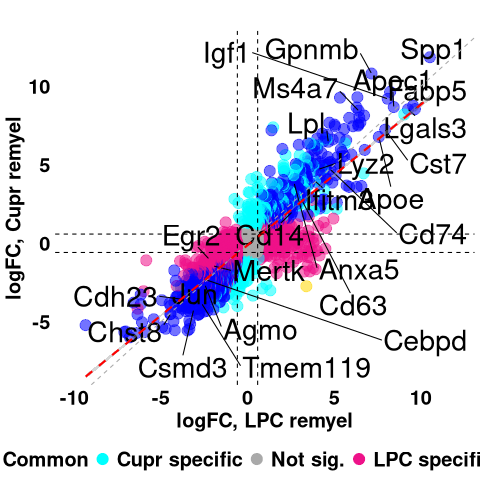

In [211]:
%%R

p <- ggplot(filtered_out_df2, aes(x = logFC_LPC_re, y = logFC_Cupr_re, 
                                  color = ifelse(opposite_direction, "gold1", 
                                  ifelse(common, "blue", 
                                  ifelse(LPC_sig_re, "deeppink2", 
                                  ifelse(Cupr_sig_re, "cyan", "dark grey")))))) +
    geom_point(size = 5, aes(alpha = ifelse(LPC_sig_re | Cupr_sig_re | opposite_direction, 1, 1))) +
    geom_text_repel(data = filtered_out_df2[filtered_out_df2$gene %in% genes_to_label, ], 
                    aes(label = gene), nudge_x = 1, point.padding = 0, size = 10, 
                    min.segment.length = 0, box.padding = 0.5, color = "black", 
                    max.overlaps = 50) +  # Increase the max.overlaps to allow more labels to be shown
    geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "darkgrey") +  # Add y = x line
    geom_smooth(method = "lm", linetype = "dashed", color = "red") +  # Add linear trend line with confidence interval
    geom_vline(xintercept = 0.585, linetype = "dashed", color = "black") +  # Vertical dashed line at x = 1
    geom_hline(yintercept = 0.585, linetype = "dashed", color = "black") +  # Horizontal dashed line at y = 1
    geom_vline(xintercept = -0.585, linetype = "dashed", color = "black") +  # Vertical dashed line at x = -1
    geom_hline(yintercept = -0.585, linetype = "dashed", color = "black") +  # Horizontal dashed line at y = -1
    labs(title = '',
         x = 'logFC, LPC remyel',
         y = 'logFC, Cupr remyel',
         color = 'Significance') +
    scale_color_manual(name = 'Color',
                       values = c(blue = 'blue', deeppink2 = 'deeppink2', cyan = 'cyan', gold1 = 'gold1', 'dark grey' = 'dark grey'),
                       labels = c('Common', 'Cupr specific', 'Not sig.', 'LPC specific', 'Opposite')) +  # Update labels for yellow
    coord_cartesian(xlim = c(-10, 12), ylim = c(-8, 12.5)) +  # Set x-axis and y-axis limits
    theme_minimal() +
    theme(
        text = element_text(size = 20, face = "bold", color = "black"),  # Set text size and color for all text elements
        axis.title = element_text(size = 20, face = "bold", color = "black"),  # Set axis title size and color
        axis.text = element_text(size = 20, face = "bold", color = "black"),  # Set axis text size and color
        plot.title = element_text(size = 20, face = "bold", hjust = 0.5),  # Center the title and set its size
        legend.text = element_text(size = 20),  # Set legend text size
        legend.title = element_text(size = 20),  # Set legend title size
        legend.position = "bottom",  # Move the legend to the bottom
        panel.grid = element_blank()
    ) +
    guides(alpha = "none")  # Remove alpha scale legend

# Save the plot with higher resolution and larger size
ggsave("./figures/dual_volcanoplot_LPC_Cupr_remyel_NEW.png", plot = p, width = 16, height = 12, dpi = 300)

# Print the plot to display in the notebook (optional)
print(p)

In [212]:
%%R

# Print the slope and R^2 value
slope <- coef(model)[2]  # Get the slope from the model coefficients
cat("Slope:", slope, "\n")
cat("R^2:", r_squared, "\n")
cat("Pearson Correlation:", pearson_corr, "\n")

Slope: 1.099576 
R^2: 0.9117328 
Pearson Correlation: 0.8444504 


### change ln

In [213]:
%%R

# Fit the linear model for the subset
model_subset <- lm(logFC_Cupr_re ~ logFC_LPC_re, data = overlapping)

# Get summary statistics
model_subset_summary <- summary(model_subset)

# Extract R² and slope
r_squared_subset <- model_subset_summary$r.squared
slope_subset <- coef(model_subset)[2]  # Extract slope

# Print the results
cat("Slope for subset:", slope_subset, "\n")
cat("R² for subset:", r_squared_subset, "\n")

Slope for subset: 0.7295892 
R² for subset: 0.5224121 


In [214]:
%%R

# Fit the linear model for the subset
model_subset <- lm(logFC_Cupr_re ~ logFC_LPC_re, data = subset_either)

# Get summary statistics
model_subset_summary <- summary(model_subset)

# Extract R² and slope
r_squared_subset <- model_subset_summary$r.squared
slope_subset <- coef(model_subset)[2]  # Extract slope

# Print the results
cat("Slope for subset:", slope_subset, "\n")
cat("R² for subset:", r_squared_subset, "\n")

Slope for subset: 0.9120031 
R² for subset: 0.7272686 


In [216]:
%%R

subset_both <- filtered_out_df2[
  (abs(filtered_out_df2$logFC_LPC_re) >= 0.585 & filtered_out_df2$Padj_LPC_re <= 0.05) & 
  (abs(filtered_out_df2$logFC_Cupr_re) >= 0.585 & filtered_out_df2$Padj_Cupr_re <= 0.05) &
  (filtered_out_df2$opposite_direction == FALSE), 
  ]

dim(subset_both)

[1] 1083   10


In [217]:
%%R

# Fit the linear model for the subset
model_subset <- lm(logFC_Cupr_re ~ logFC_LPC_re, data = subset_both)

# Get summary statistics
model_subset_summary <- summary(model_subset)

# Extract R² and slope
r_squared_subset <- model_subset_summary$r.squared
slope_subset <- coef(model_subset)[2]  # Extract slope

# Print the results
cat("Slope for subset:", slope_subset, "\n")
cat("R² for subset:", r_squared_subset, "\n")

Slope for subset: 1.099576 
R² for subset: 0.9117328 


In [215]:
%%R

# Fit the linear model for the subset
model_subset <- lm(logFC_Cupr_re ~ logFC_LPC_re, data = subset_both)

# Get summary statistics
model_subset_summary <- summary(model_subset)

# Extract R² and slope
r_squared_subset <- model_subset_summary$r.squared
slope_subset <- coef(model_subset)[2]  # Extract slope

# Print the results
cat("Slope for subset:", slope_subset, "\n")
cat("R² for subset:", r_squared_subset, "\n")

Slope for subset: 1.099576 
R² for subset: 0.9117328 


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


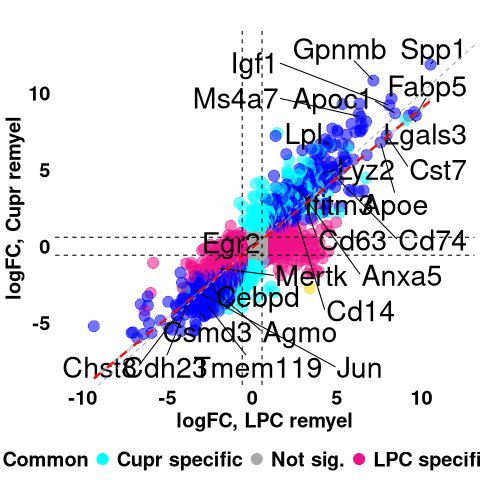

In [218]:
%%R

p <- ggplot(filtered_out_df2, aes(x = logFC_LPC_re, y = logFC_Cupr_re, 
                                  color = ifelse(opposite_direction, "gold1", 
                                  ifelse(common, "blue", 
                                  ifelse(LPC_sig_re, "deeppink2", 
                                  ifelse(Cupr_sig_re, "cyan", "dark grey")))))) +
    geom_point(size = 5, aes(alpha = ifelse(LPC_sig_re | Cupr_sig_re | opposite_direction, 1, 1))) +
    geom_text_repel(data = filtered_out_df2[filtered_out_df2$gene %in% genes_to_label, ], 
                    aes(label = gene), nudge_x = 1.5, point.padding = 0, size = 10, max.overlaps = Inf,
                    min.segment.length = 0, box.padding = 0.5, color = "black") +
    geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "darkgrey") +  # Add y = x line
    geom_smooth(data = subset_either, aes(x = logFC_LPC_re, y = logFC_Cupr_re), 
                method = "lm", linetype = "dashed", color = "red") +  # Add linear trend line with confidence interval
    geom_vline(xintercept = 0.585, linetype = "dashed", color = "black") +  # Vertical dashed line at x = 1
    geom_hline(yintercept = 0.585, linetype = "dashed", color = "black") +  # Horizontal dashed line at y = 1
    geom_vline(xintercept = -0.585, linetype = "dashed", color = "black") +  # Vertical dashed line at x = -1
    geom_hline(yintercept = -0.585, linetype = "dashed", color = "black") +  # Horizontal dashed line at y = -1
    labs(title = '',
         x = 'logFC, LPC remyel',
         y = 'logFC, Cupr remyel',
         color = 'Significance') +
    scale_color_manual(name = 'Color',
                       values = c(blue = 'blue', deeppink2 = 'deeppink2', cyan = 'cyan', gold1 = 'gold1', 'dark grey' = 'dark grey'),
                       labels = c('Common', 'Cupr specific', 'Not sig.', 'LPC specific', 'Opposite')) +  # Update labels for yellow
    coord_cartesian(xlim = c(-10.5, 12), ylim = c(-8, 13)) +  # Set x-axis and y-axis limits
    theme_minimal() +
    theme(
        text = element_text(size = 20, face = "bold", color = "black"),  # Set text size and color for all text elements
        axis.title = element_text(size = 20, face = "bold", color = "black"),  # Set axis title size and color
        axis.text = element_text(size = 20, face = "bold", color = "black"),  # Set axis text size and color
        plot.title = element_text(size = 20, face = "bold", hjust = 0.5),  # Center the title and set its size
        legend.text = element_text(size = 20),  # Set legend text size
        legend.title = element_text(size = 20),  # Set legend title size
        legend.position = "bottom",  # Move the legend to the bottom
        panel.grid = element_blank()
    ) +
    guides(alpha = "none")  # Remove alpha scale legend

# Save the plot with higher resolution and larger size
ggsave("./figures/dual_volcanoplot_LPC_Cupr_remyel_NEW_with_subset_lm.png", plot = p, width = 16, height = 12, dpi = 300)

# Print the plot to display in the notebook (optional)
print(p)

### SKIP

In [ ]:
from matplotlib_venn import venn2, venn2_circles
import matplotlib.pyplot as plt

# set up gene lists
genes_LPC_up = LPC_re_up['gene'].tolist()
genes_LPC_RE_up = Cupr_re_up['gene'].tolist()

# Convert lists to sets
set_LPC_demyel_up = set(genes_LPC_up)
set_LPC_remyel_up = set(genes_LPC_RE_up)

# Calculate overlaps
only_LPC_demyel_up = len(set_LPC_demyel_up - set_LPC_remyel_up)
only_LPC_remyel_up = len(set_LPC_remyel_up - set_LPC_demyel_up)
LPC_demyel_remyel_up = len(set_LPC_demyel_up & set_LPC_remyel_up)

# Set labels and colors
set_labels = ('LPC_remyel', 'Cupr_remyel')
set_colors = ('#ffd28e', '#bddbf6')  # Example colors

# Plot Venn diagram
venn = venn2(subsets=(only_LPC_demyel_up, only_LPC_remyel_up, LPC_demyel_remyel_up),
             set_labels=set_labels,
             set_colors=set_colors,
             alpha=0.5)  # Adjust transparency here

venn2_circles(subsets=(only_LPC_demyel_up, only_LPC_remyel_up, LPC_demyel_remyel_up), linewidth=1)

# Increase text size for subset counts
for label in venn.subset_labels:
    if label:  # Check if label is not None
        label.set_fontsize(14)  # Adjust font size here
        label.set_color('black')  # Set text color to white
        label.set_fontweight('bold')  # Set font weight to bold

# Increase text size for set labels
for text in venn.set_labels:
    text.set_fontsize(14)

# Display the plot
plt.title('Sig. Up DEGs: LPC vs Cupr remyel DAMs', fontsize=16)

# Save the plot
plt.savefig('./figures/venn2_LPC_Cupr_remyel_DAMs_up.png', dpi=300, bbox_inches='tight', facecolor='none')

plt.show()

In [ ]:
# Set up gene lists
genes_LPC_down = LPC_re_down['gene'].tolist()
genes_LPC_RE_down = Cupr_re_down['gene'].tolist()

# Convert lists to sets
set_LPC_demyel_down = set(genes_LPC_down)
set_LPC_remyel_down = set(genes_LPC_RE_down)

# Calculate overlaps
only_LPC_demyel_down = len(set_LPC_demyel_down - set_LPC_remyel_down)
only_LPC_remyel_down = len(set_LPC_remyel_down - set_LPC_demyel_down)
LPC_demyel_remyel_down = len(set_LPC_demyel_down & set_LPC_remyel_down)

# Set labels and colors
set_labels = ('LPC_remyel', 'Cupr_remyel')
set_colors = ('#ffd28e', '#bddbf6')  # Example colors

# Plot Venn diagram
venn = venn2(subsets=(only_LPC_demyel_down, only_LPC_remyel_down, LPC_demyel_remyel_down),
             set_labels=set_labels,
             set_colors=set_colors,
             alpha=0.5)  # Adjust transparency here

venn2_circles(subsets=(only_LPC_demyel_down, only_LPC_remyel_down, LPC_demyel_remyel_down), linewidth=1)

# Increase text size for subset counts
for label in venn.subset_labels:
    if label:  # Check if label is not None
        label.set_fontsize(14)  # Adjust font size here
        label.set_color('black')  # Set text color to white
        label.set_fontweight('bold')  # Set font weight to bold

# Increase text size for set labels
for text in venn.set_labels:
    text.set_fontsize(14)

# Display the plot
plt.title('Sig. Down DEGs: LPC vs Cupr remyel DAMs', fontsize=16)

# Save the plot
plt.savefig('./figures/venn2_LPC_Cupr_remyel_DAMs_down.png', dpi=300, bbox_inches='tight', facecolor='none')

plt.show()

# LPC demyel BAMs

In [219]:
LPC_sig_BAM = LPC_demyel_2[(LPC_demyel_2.Padj < 0.05) & (LPC_demyel_2.logFC.abs() > 0.585)]
LPC_sig_BAM.shape

(5123, 7)

In [220]:
LPC_sig_de = LPC_demyel[(LPC_demyel.Padj < 0.05) & (LPC_demyel.logFC.abs() > 0.585)]
LPC_sig_de.shape

(3986, 7)

In [221]:
# Find the highest and lowest values of logFC
highest_logFC = LPC_sig_BAM['logFC'].max()
lowest_logFC = LPC_sig_BAM['logFC'].min()

# Print the results
print("Highest logFC:", highest_logFC)
print("Lowest logFC:", lowest_logFC)

Highest logFC: 13.6044883349856
Lowest logFC: -11.6322838535057


In [222]:
# Find the highest and lowest values of logFC
highest_logFC = LPC_sig_de['logFC'].max()
lowest_logFC = LPC_sig_de['logFC'].min()

# Print the results
print("Highest logFC:", highest_logFC)
print("Lowest logFC:", lowest_logFC)

Highest logFC: 8.86065117646569
Lowest logFC: -8.09576683028079


In [223]:
# Find the overlapping genes
overlapping_genes = set(LPC_demyel_2['gene']).intersection(set(LPC_demyel['gene']))

# Extract rows with overlapping genes
LPC_BAM_overlap = LPC_demyel_2[LPC_demyel_2['gene'].isin(overlapping_genes)]
LPC_de_overlap = LPC_demyel[LPC_demyel['gene'].isin(overlapping_genes)]

# Rename columns appropriately
LPC_BAM_overlap = LPC_BAM_overlap.rename(columns={'logFC': 'logFC_LPC_BAM', 'Padj': 'Padj_LPC_BAM'})
LPC_de_overlap = LPC_de_overlap.rename(columns={'logFC': 'logFC_LPC_de', 'Padj': 'Padj_LPC_de'})

# Merge data frames on the gene column
overlapping = pd.merge(LPC_BAM_overlap, LPC_de_overlap, on='gene')

# Select the desired columns
overlapping = overlapping[['gene', 'logFC_LPC_BAM', 'Padj_LPC_BAM', 'logFC_LPC_de', 'Padj_LPC_de']]

# Order columns
overlapping = overlapping.sort_values(by='logFC_LPC_BAM', ascending=False)
print(overlapping.shape)

(9269, 5)


In [224]:
overlapping[:5]

,gene,logFC_LPC_BAM,Padj_LPC_BAM,logFC_LPC_de,Padj_LPC_de
1369,Spp1,13.604488,7.179393e-05,8.860651,0.001352
277,Gpnmb,12.431175,2.304065e-07,8.328498,0.000060
1928,Fabp5,12.000838,3.209318e-04,8.431502,0.004350
1349,Lgals3,11.675251,6.884253e-05,8.480823,0.000458
3784,Wfdc17,9.615664,9.404613e-03,5.887264,0.039253


In [225]:
# Define significant genes
overlapping['LPC_sig_BAM'] = (overlapping['Padj_LPC_BAM'] < 0.05) & (abs(overlapping['logFC_LPC_BAM']) > 0.585)
overlapping['LPC_sig_de'] = (overlapping['Padj_LPC_de'] < 0.05) & (abs(overlapping['logFC_LPC_de']) > 0.585)

# Add 'common' column based on conditions
overlapping['common'] = overlapping['LPC_sig_BAM'] & overlapping['LPC_sig_de']

# Create opposite direction column based on correct conditions
# Genes that are upregulated in one set and downregulated in the other
condition1 = (overlapping['Padj_LPC_BAM'] < 0.05) & (overlapping['logFC_LPC_BAM'] > 0.585) & (overlapping['Padj_LPC_de'] < 0.05) & (overlapping['logFC_LPC_de'] < -0.585)
condition2 = (overlapping['Padj_LPC_de'] < 0.05) & (overlapping['logFC_LPC_de'] > 0.585) & (overlapping['Padj_LPC_BAM'] < 0.05) & (overlapping['logFC_LPC_BAM'] < -0.585)

# Update opposite_direction column with correct conditions
overlapping['opposite_direction'] = condition1 | condition2

# Display the DataFrame
overlapping[:5]

,gene,logFC_LPC_BAM,Padj_LPC_BAM,logFC_LPC_de,Padj_LPC_de,LPC_sig_BAM,LPC_sig_de,common,opposite_direction
1369,Spp1,13.604488,7.179393e-05,8.860651,0.001352,True,True,True,False
277,Gpnmb,12.431175,2.304065e-07,8.328498,0.000060,True,True,True,False
1928,Fabp5,12.000838,3.209318e-04,8.431502,0.004350,True,True,True,False
1349,Lgals3,11.675251,6.884253e-05,8.480823,0.000458,True,True,True,False
3784,Wfdc17,9.615664,9.404613e-03,5.887264,0.039253,True,True,True,False


In [226]:
# Count the genes in opposite direction
sig_LPC_sig_BAM = overlapping['LPC_sig_BAM'].sum()
print(f"Number of sig DEGS in sig_LPC_sig_BAM: {sig_LPC_sig_BAM}")

# Count the genes in opposite direction
sig_LPC_sig_de = overlapping['LPC_sig_de'].sum()
print(f"Number of sig DEGS in sig_LPC_sig_de: {sig_LPC_sig_de}")

Number of sig DEGS in sig_LPC_sig_BAM: 5011
Number of sig DEGS in sig_LPC_sig_de: 3583


In [227]:
# Count the genes in opposite direction
opposite_direction_count = overlapping['opposite_direction'].sum()
print(f"Number of genes with opposite changes: {opposite_direction_count}")

overlapping_common = overlapping[overlapping['common']]
print(f"Number of common sig genes: {overlapping_common.shape}")

# Assuming 'overlapping' is your dataframe
filtered_opposite_direction = overlapping[overlapping['opposite_direction'] == True]
filtered_opposite_direction

Number of genes with opposite changes: 23
Number of common sig genes: (3164, 9)


,gene,logFC_LPC_BAM,Padj_LPC_BAM,logFC_LPC_de,Padj_LPC_de,LPC_sig_BAM,LPC_sig_de,common,opposite_direction
526,Il7r,2.684061,2.328787e-06,-3.486195,0.000002,True,True,True,True
2051,Pirb,1.662738,4.016680e-04,-2.038551,0.003118,True,True,True,True
4893,Ccdc125,1.596812,4.002703e-02,-1.782650,0.013793,True,True,True,True
3852,Gadd45a,1.253867,1.023949e-02,-1.605224,0.032421,True,True,True,True
4470,Gpr35,1.094352,2.409269e-02,-1.414879,0.022680,True,True,True,True
4392,Ern1,0.930363,2.161684e-02,-2.185787,0.000099,True,True,True,True
4602,Ago2,0.780073,2.837710e-02,-0.803014,0.023730,True,True,True,True
4360,Dennd1a,0.777252,2.065083e-02,-0.831588,0.016052,True,True,True,True
3232,Lap3,-0.723231,3.761661e-03,0.800903,0.005942,True,True,True,True
2931,Ctsc,-0.865497,2.230115e-03,0.606544,0.014925,True,True,True,True


In [228]:
# Apply the conditions to filter the DataFrame
filtered_RE = overlapping[
    (abs(overlapping['logFC_LPC_BAM']) > 0.585) & 
    (overlapping['Padj_LPC_BAM'] > 0.05) &
    (overlapping['LPC_sig_de'] == False)
]

# Print the filtered DataFrame to verify
print("Filtered DataFrame:")
print(filtered_RE.shape)

# Apply the conditions to filter the DataFrame
filtered_Cupr = overlapping[
    (abs(overlapping['logFC_LPC_de']) > 0.585) & 
    (overlapping['Padj_LPC_de'] > 0.05) &
    (overlapping['LPC_sig_BAM'] == False)
]

# Print the filtered DataFrame to verify
print("Filtered DataFrame:")
print(filtered_Cupr.shape)

Filtered DataFrame:
(1143, 9)
Filtered DataFrame:
(1228, 9)


In [229]:
# Filter out the rows from the overlapping DataFrame for the first condition
filtered_out_df1 = overlapping[
    ~(
        (abs(overlapping['logFC_LPC_BAM']) > 0.585) & 
        (overlapping['Padj_LPC_BAM'] > 0.05) &
        (~overlapping['LPC_sig_de'])  # Ensure Cupr_sig_re is False
    )
]

# Print the resulting DataFrame to verify
print("Filtered Out DataFrame1:")
print(filtered_out_df1.shape)  # Expected: 10330 - 744 = 9586

# Filter out the rows from filtered_out_df1 for the second condition
filtered_out_df2 = filtered_out_df1[
    ~(
        (abs(filtered_out_df1['logFC_LPC_de']) > 0.585) & 
        (filtered_out_df1['Padj_LPC_de'] > 0.05) &
        (~filtered_out_df1['LPC_sig_BAM'])  # Ensure LPC_sig_re is False
    )
]

# Print the resulting DataFrame to verify
print("Filtered Out DataFrame2:")
print(filtered_out_df2.shape)  # Expected: 9586 - 99 = 9487

Filtered Out DataFrame1:
(8126, 9)
Filtered Out DataFrame2:
(7585, 9)


In [230]:
# Count the number of True values in sig_MOL2 but not in sig_MOL4
count_sig_lpc_BAM_only = ((filtered_out_df2['LPC_sig_BAM'] == True) & (filtered_out_df2['LPC_sig_de'] == False)).sum()

# Count the number of True values in sig_MOL2 but not in sig_MOL4
count_sig_lpc_de_only = ((filtered_out_df2['LPC_sig_de'] == True) & (filtered_out_df2['LPC_sig_BAM'] == False)).sum()

# Count the number of True values in common
count_common = filtered_out_df2['common'].sum()

# Display the counts
print("Number of True values in BAM only:", count_sig_lpc_BAM_only)
print("Number of True values in de only:", count_sig_lpc_de_only)
print("Number of True values in common:", count_common)

# Show one gene where opposite_direction is True
gene_opposite_direction = filtered_out_df2[filtered_out_df2['opposite_direction'] == True]['gene']

# Display the gene
print(gene_opposite_direction.count(), "gene in opposite_direction:", gene_opposite_direction)

Number of True values in BAM only: 1847
Number of True values in de only: 419
Number of True values in common: 3164
23 gene in opposite_direction: 526         Il7r
2051        Pirb
4893     Ccdc125
3852     Gadd45a
4470       Gpr35
4392        Ern1
4602        Ago2
4360     Dennd1a
3232        Lap3
2931        Ctsc
2839        C1qa
2705      Prune2
3633        Tlr2
2141       Arl5c
2750         Npl
1130       Fcrls
3794       Pxdc1
1128       Pmp22
529     Serpine2
314       Tspan7
749        Scn1b
926       Cxcl10
138      Cacna1a
Name: gene, dtype: object


In [231]:
# Extract the logFC_de and logFC_re columns for correlation
logFC_LPC_BAM = filtered_out_df2['logFC_LPC_BAM']
logFC_LPC_de = filtered_out_df2['logFC_LPC_de']

# Compute the Pearson correlation and the p-value
pearson_corr, p_value = pearsonr(logFC_LPC_BAM, logFC_LPC_de)

# Print the results
print(f"Pearson Correlation: {pearson_corr}")
print(f"P-value: {p_value}")

Pearson Correlation: 0.8363595562362011
P-value: 0.0


In [232]:
%%R -i filtered_out_df2

# Fit a linear model
model <- lm(logFC_LPC_de ~ logFC_LPC_BAM, data = filtered_out_df2)

# Summary of the model to get R^2
model_summary <- summary(model)
r_squared <- model_summary$r.squared

print(model_summary)
print(r_squared)


Call:
lm(formula = logFC_LPC_de ~ logFC_LPC_BAM, data = filtered_out_df2)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.1489 -0.3831 -0.0464  0.3170  4.7035 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.083592   0.009386   8.906   <2e-16 ***
logFC_LPC_BAM 0.588342   0.004428 132.859   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.784 on 7583 degrees of freedom
Multiple R-squared:  0.6995,	Adjusted R-squared:  0.6995 
F-statistic: 1.765e+04 on 1 and 7583 DF,  p-value: < 2.2e-16

[1] 0.6994973


In [233]:
%%R

# Calculate the Pearson correlation
pearson_corr <- cor(filtered_out_df2$logFC_LPC_BAM, filtered_out_df2$logFC_LPC_de)
pearson_corr

[1] 0.8363596


### New overlaps:

In [234]:
filtered_out_df2[:5]

,gene,logFC_LPC_BAM,Padj_LPC_BAM,logFC_LPC_de,Padj_LPC_de,LPC_sig_BAM,LPC_sig_de,common,opposite_direction
1369,Spp1,13.604488,7.179393e-05,8.860651,0.001352,True,True,True,False
277,Gpnmb,12.431175,2.304065e-07,8.328498,0.000060,True,True,True,False
1928,Fabp5,12.000838,3.209318e-04,8.431502,0.004350,True,True,True,False
1349,Lgals3,11.675251,6.884253e-05,8.480823,0.000458,True,True,True,False
3784,Wfdc17,9.615664,9.404613e-03,5.887264,0.039253,True,True,True,False


In [235]:
# Count UP-regulated genes (logFC > 0) in LPC_de
count_up_LPC_de = ((filtered_out_df2['logFC_LPC_BAM'] >= 0.585) & (filtered_out_df2['Padj_LPC_BAM'] < 0.05)).sum()

# Count DOWN-regulated genes (logFC < 0) in LPC_de
count_down_LPC_de = ((filtered_out_df2['logFC_LPC_BAM'] <= -0.585) & (filtered_out_df2['Padj_LPC_BAM'] < 0.05)).sum()

# Count UP-regulated genes (logFC > 0) in LPC_re
count_up_LPC_re = ((filtered_out_df2['logFC_LPC_de'] >= 0.585) & (filtered_out_df2['Padj_LPC_de'] < 0.05)).sum()

# Count DOWN-regulated genes (logFC < 0) in LPC_re
count_down_LPC_re = ((filtered_out_df2['logFC_LPC_de'] <= -0.585) & (filtered_out_df2['Padj_LPC_de'] < 0.05)).sum()

# Count common UP-regulated genes (significant & logFC > 0 in both conditions)
count_common_up = ((filtered_out_df2['logFC_LPC_BAM'] >= 0.585) & (filtered_out_df2['Padj_LPC_BAM'] < 0.05) &
                   (filtered_out_df2['logFC_LPC_de'] >= 0.585) & (filtered_out_df2['Padj_LPC_de'] < 0.05)).sum()

# Count common DOWN-regulated genes (significant & logFC < 0 in both conditions)
count_common_down = ((filtered_out_df2['logFC_LPC_BAM'] <= -0.585) & (filtered_out_df2['Padj_LPC_BAM'] < 0.05) &
                     (filtered_out_df2['logFC_LPC_de'] <= -0.585) & (filtered_out_df2['Padj_LPC_de'] < 0.05)).sum()

# Count genes that change direction (UP in one, DOWN in the other)
count_opposite_direction = (filtered_out_df2['opposite_direction'] == True).sum()

# Display the counts
print("UP-regulated DEGs in LPC_de:", count_up_LPC_de)
print("DOWN-regulated DEGs in LPC_de:", count_down_LPC_de)
print("UP-regulated DEGs in LPC_re:", count_up_LPC_re)
print("DOWN-regulated DEGs in LPC_re:", count_down_LPC_re)
print("Common UP-regulated DEGs:", count_common_up)
print("Common DOWN-regulated DEGs:", count_common_down)
print("Genes with opposite direction:", count_opposite_direction)

UP-regulated DEGs in LPC_de: 1342
DOWN-regulated DEGs in LPC_de: 3669
UP-regulated DEGs in LPC_re: 1019
DOWN-regulated DEGs in LPC_re: 2564
Common UP-regulated DEGs: 774
Common DOWN-regulated DEGs: 2367
Genes with opposite direction: 23


In [236]:
# Count UP-regulated genes unique to LPC_de (significant in LPC_de but NOT in LPC_re)
count_unique_up_LPC_de = ((filtered_out_df2['logFC_LPC_BAM'] >= 0.585) & (filtered_out_df2['Padj_LPC_BAM'] < 0.05) & 
                          ~((filtered_out_df2['logFC_LPC_de'] >= 0.585) & (filtered_out_df2['Padj_LPC_de'] < 0.05))).sum()

# Count DOWN-regulated genes unique to LPC_de (significant in LPC_de but NOT in LPC_re)
count_unique_down_LPC_de = ((filtered_out_df2['logFC_LPC_BAM'] <= -0.585) & (filtered_out_df2['Padj_LPC_BAM'] < 0.05) & 
                            ~((filtered_out_df2['logFC_LPC_de'] <= -0.585) & (filtered_out_df2['Padj_LPC_de'] < 0.05))).sum()

# Count UP-regulated genes unique to LPC_re (significant in LPC_re but NOT in LPC_de)
count_unique_up_LPC_re = ((filtered_out_df2['logFC_LPC_de'] >= 0.585) & (filtered_out_df2['Padj_LPC_de'] < 0.05) & 
                          ~((filtered_out_df2['logFC_LPC_BAM'] >= 0.585) & (filtered_out_df2['Padj_LPC_BAM'] < 0.05))).sum()

# Count DOWN-regulated genes unique to LPC_re (significant in LPC_re but NOT in LPC_de)
count_unique_down_LPC_re = ((filtered_out_df2['logFC_LPC_de'] <= -0.585) & (filtered_out_df2['Padj_LPC_de'] < 0.05) & 
                            ~((filtered_out_df2['logFC_LPC_BAM'] <= -0.585) & (filtered_out_df2['Padj_LPC_BAM'] < 0.05))).sum()

# Display the counts
print("Unique UP-regulated DEGs in LPC_de:", count_unique_up_LPC_de)
print("Unique DOWN-regulated DEGs in LPC_de:", count_unique_down_LPC_de)
print("Unique UP-regulated DEGs in LPC_re:", count_unique_up_LPC_re)
print("Unique DOWN-regulated DEGs in LPC_re:", count_unique_down_LPC_re)


Unique UP-regulated DEGs in LPC_de: 568
Unique DOWN-regulated DEGs in LPC_de: 1302
Unique UP-regulated DEGs in LPC_re: 245
Unique DOWN-regulated DEGs in LPC_re: 197


In [237]:
%%R
dim(overlapping)

[1] 9146    9


In [239]:
# Extract the logFC_de and logFC_re columns for correlation
logFC_de = overlapping['logFC_LPC_BAM']
logFC_re = overlapping['logFC_LPC_de']

# Compute the Pearson correlation and the p-value
pearson_corr, p_value = pearsonr(logFC_de, logFC_re)

# Print the results
print(f"Pearson Correlation: {pearson_corr}")
print(f"P-value: {p_value}")

Pearson Correlation: 0.8305466165795677
P-value: 0.0


In [240]:
%%R -i filtered_out_df2

# Fit a linear model
model <- lm(logFC_LPC_de ~ logFC_LPC_BAM, data = filtered_out_df2)

# Summary of the model to get R^2
model_summary <- summary(model)
r_squared <- model_summary$r.squared

print(model_summary)
print(r_squared)


Call:
lm(formula = logFC_LPC_de ~ logFC_LPC_BAM, data = filtered_out_df2)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.1489 -0.3831 -0.0464  0.3170  4.7035 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.083592   0.009386   8.906   <2e-16 ***
logFC_LPC_BAM 0.588342   0.004428 132.859   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.784 on 7583 degrees of freedom
Multiple R-squared:  0.6995,	Adjusted R-squared:  0.6995 
F-statistic: 1.765e+04 on 1 and 7583 DF,  p-value: < 2.2e-16

[1] 0.6994973


In [241]:
%%R -i overlapping

# Fit a linear model
model <- lm(logFC_LPC_de ~ logFC_LPC_BAM, data = overlapping)

# Summary of the model to get R^2
model_summary <- summary(model)
r_squared <- model_summary$r.squared

print(model_summary)
print(r_squared)


Call:
lm(formula = logFC_LPC_de ~ logFC_LPC_BAM, data = overlapping)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.2059 -0.3921 -0.0358  0.3515  4.7798 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.106351   0.008230   12.92   <2e-16 ***
logFC_LPC_BAM 0.601089   0.004187  143.56   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7699 on 9267 degrees of freedom
Multiple R-squared:  0.6898,	Adjusted R-squared:  0.6898 
F-statistic: 2.061e+04 on 1 and 9267 DF,  p-value: < 2.2e-16

[1] 0.6898077


In [242]:
filtered_out_df2[:2]

,gene,logFC_LPC_BAM,Padj_LPC_BAM,logFC_LPC_de,Padj_LPC_de,LPC_sig_BAM,LPC_sig_de,common,opposite_direction
1369,Spp1,13.604488,7.179393e-05,8.860651,0.001352,True,True,True,False
277,Gpnmb,12.431175,2.304065e-07,8.328498,0.000060,True,True,True,False


In [243]:
%%R

subset_both <- filtered_out_df2[
  (abs(filtered_out_df2$logFC_LPC_BAM) >= 0.585 & filtered_out_df2$Padj_LPC_BAM <= 0.05) & 
  (abs(filtered_out_df2$logFC_LPC_de) >= 0.585 & filtered_out_df2$Padj_LPC_de <= 0.05) &
  (filtered_out_df2$opposite_direction == FALSE), 
  ]

dim(subset_both)

[1] 3141    9


In [244]:
%%R

subset_either <- filtered_out_df2[
  ((abs(filtered_out_df2$logFC_LPC_BAM) >= 0.585 & filtered_out_df2$Padj_LPC_BAM <= 0.05) |
   (abs(filtered_out_df2$logFC_LPC_de) >= 0.585 & filtered_out_df2$Padj_LPC_de <= 0.05)),
  ]

dim(subset_either)

[1] 5430    9


In [245]:
%%R

# Fit a linear model
model <- lm(logFC_LPC_de ~ logFC_LPC_BAM, data = subset_either)

# Summary of the model to get R^2
model_summary <- summary(model)
r_squared <- model_summary$r.squared

print(model_summary)
print(r_squared)


Call:
lm(formula = logFC_LPC_de ~ logFC_LPC_BAM, data = subset_either)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.1633 -0.4971 -0.0950  0.4386  4.7106 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.092444   0.013037   7.091  1.5e-12 ***
logFC_LPC_BAM 0.590397   0.005221 113.078  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9095 on 5428 degrees of freedom
Multiple R-squared:  0.702,	Adjusted R-squared:  0.7019 
F-statistic: 1.279e+04 on 1 and 5428 DF,  p-value: < 2.2e-16

[1] 0.7019967


In [246]:
%%R

# Fit a linear model
model <- lm(logFC_LPC_de ~ logFC_LPC_BAM, data = subset_both)

# Summary of the model to get R^2
model_summary <- summary(model)
r_squared <- model_summary$r.squared

print(model_summary)
print(r_squared)


Call:
lm(formula = logFC_LPC_de ~ logFC_LPC_BAM, data = subset_both)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9491 -0.4564 -0.1375  0.3755  5.3143 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.058451   0.016608   3.519 0.000439 ***
logFC_LPC_BAM 0.656357   0.005849 112.212  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8535 on 3139 degrees of freedom
Multiple R-squared:  0.8005,	Adjusted R-squared:  0.8004 
F-statistic: 1.259e+04 on 1 and 3139 DF,  p-value: < 2.2e-16

[1] 0.8004518


In [247]:
%R -o subset_either

In [249]:
%R -o subset_both

In [251]:
%%R
# Sort the dataframe by 'logFC_de' in descending order
filtered_out_df2_sorted <- filtered_out_df2[order(-filtered_out_df2$logFC_LPC_BAM), ]

# View the top of the sorted dataframe
head(filtered_out_df2_sorted, 20)

        gene logFC_LPC_BAM Padj_LPC_BAM logFC_LPC_de  Padj_LPC_de LPC_sig_BAM
1369    Spp1     13.604488 7.179393e-05     8.860651 1.351861e-03        TRUE
277    Gpnmb     12.431175 2.304065e-07     8.328498 6.032859e-05        TRUE
1928   Fabp5     12.000838 3.209318e-04     8.431502 4.349513e-03        TRUE
1349  Lgals3     11.675251 6.884253e-05     8.480823 4.577208e-04        TRUE
3784  Wfdc17      9.615664 9.404613e-03     5.887264 3.925301e-02        TRUE
678    Ms4a7      9.543407 5.614324e-06     6.350836 1.159100e-03        TRUE
735   Pla2g7      9.214310 7.013480e-06     4.390413 2.172115e-02        TRUE
1173  Fbxo32      8.701064 3.990963e-05     2.711436 1.535881e-01        TRUE
3243   Apoc2      8.464866 3.866151e-03     5.861747 1.412667e-02        TRUE
2026    Myof      8.189678 3.834719e-04     4.031592 7.422436e-03        TRUE
1048    Cdo1      8.106355 2.850433e-05     4.065302 3.878830e-02        TRUE
1554    Igf1      7.742716 1.174720e-04     8.825738 5.229549e-0

In [252]:
%%R

# List of genes to label
genes_to_label <- c('Spp1', 'Igf1', 'Lgals3', 'Fabp5', 'Gpnmb', 'Apoc1', 'Ms4a7', 'Apoe', 'Lpl', 'Cst7',
                    'Apoe', 'Cd74', 'Lpl', 'Lyz2', 'Cd63', 'Anxa5', 'Cd14', 'Ifitm3', 
                   'Egr2', 'Chst8', 'Cebpd', 'Trim17', 'Mertk', 'Tmem119', 'Jun', 'Agmo', 'Cdh23', 'Csmd3')

# Check which genes are missing in the dataframe
missing_genes <- genes_to_label[!genes_to_label %in% filtered_out_df2$gene]

# Print missing genes
if (length(missing_genes) > 0) {
  cat("Missing genes:\n")
  print(missing_genes)
} else {
  cat("No genes are missing.\n")
}

# Filter the dataframe by matching the gene column with genes_to_label
filtered_genes_df <- filtered_out_df2[filtered_out_df2$gene %in% genes_to_label, ]

# View the filtered data
filtered_genes_df

Missing genes:
[1] "Egr2"
        gene logFC_LPC_BAM Padj_LPC_BAM logFC_LPC_de  Padj_LPC_de LPC_sig_BAM
1369    Spp1  13.604488335 7.179393e-05    8.8606512 1.351861e-03        TRUE
277    Gpnmb  12.431175321 2.304065e-07    8.3284982 6.032859e-05        TRUE
1928   Fabp5  12.000837580 3.209318e-04    8.4315016 4.349513e-03        TRUE
1349  Lgals3  11.675251402 6.884253e-05    8.4808226 4.577208e-04        TRUE
678    Ms4a7   9.543407155 5.614324e-06    6.3508360 1.159100e-03        TRUE
1554    Igf1   7.742716352 1.174720e-04    8.8257383 5.229549e-05        TRUE
406     Apoe   7.005203184 7.561317e-07    5.7740164 2.308643e-06        TRUE
103     Lyz2   6.304901767 1.832592e-08    2.5068932 2.507794e-05        TRUE
2941   Apoc1   5.922454404 2.258541e-03    6.8954045 5.691519e-03        TRUE
1704  Ifitm3   4.714209804 1.759591e-04    4.1987600 4.510149e-03        TRUE
497    Anxa5   4.063397841 1.986404e-06    3.2569402 2.620627e-04        TRUE
1586     Lpl   3.363669014 1.248412e-0

In [253]:
%%R
filtered_out_df2$color_assignment <- ifelse(filtered_out_df2$opposite_direction, "gold1", 
                                     ifelse(filtered_out_df2$common, "blue", 
                                     ifelse(filtered_out_df2$LPC_sig_BAM, "deeppink2", 
                                     ifelse(filtered_out_df2$LPC_sig_de, "cyan", "dark grey"))))

table(filtered_out_df2$color_assignment)


     blue      cyan dark grey deeppink2     gold1 
     3141       419      2155      1847        23 


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


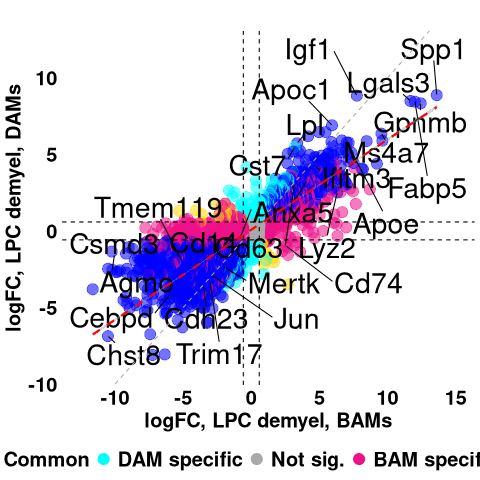

In [254]:
%%R

p <- ggplot(filtered_out_df2, aes(x = logFC_LPC_BAM, y = logFC_LPC_de, 
                                  color = ifelse(opposite_direction, "gold1", 
                                  ifelse(common, "blue", 
                                  ifelse(LPC_sig_BAM, "deeppink2", 
                                  ifelse(LPC_sig_de, "cyan", "dark grey")))))) +
    geom_point(size = 5, aes(alpha = ifelse(LPC_sig_BAM | LPC_sig_de | opposite_direction, 1, 1))) +
    geom_text_repel(data = filtered_out_df2[filtered_out_df2$gene %in% genes_to_label, ], 
                    aes(label = gene), nudge_x = 1, point.padding = 0, size = 10, 
                    min.segment.length = 0, box.padding = 0.5, color = "black", 
                    max.overlaps = 50) +  # Increase the max.overlaps to allow more labels to be shown
    geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "darkgrey") +  # Add y = x line
    geom_smooth(method = "lm", linetype = "dashed", color = "red") +  # Add linear trend line with confidence interval
    geom_vline(xintercept = 0.585, linetype = "dashed", color = "black") +  # Vertical dashed line at x = 1
    geom_hline(yintercept = 0.585, linetype = "dashed", color = "black") +  # Horizontal dashed line at y = 1
    geom_vline(xintercept = -0.585, linetype = "dashed", color = "black") +  # Vertical dashed line at x = -1
    geom_hline(yintercept = -0.585, linetype = "dashed", color = "black") +  # Horizontal dashed line at y = -1
    labs(title = '',
         x = 'logFC, LPC demyel, BAMs',
         y = 'logFC, LPC demyel, DAMs',
         color = 'Significance') +
    scale_color_manual(name = 'Color',
                       values = c(blue = 'blue', deeppink2 = 'deeppink2', cyan = 'cyan', gold1 = 'gold1', 'dark grey' = 'dark grey'),
                       labels = c('Common', 'DAM specific', 'Not sig.', 'BAM specific', 'Opposite')) +  # Update labels for yellow
    coord_cartesian(xlim = c(-12.5, 15), ylim = c(-9, 12)) +  # Set x-axis and y-axis limits
    theme_minimal() +
    theme(
        text = element_text(size = 20, face = "bold", color = "black"),  # Set text size and color for all text elements
        axis.title = element_text(size = 20, face = "bold", color = "black"),  # Set axis title size and color
        axis.text = element_text(size = 20, face = "bold", color = "black"),  # Set axis text size and color
        plot.title = element_text(size = 20, face = "bold", hjust = 0.5),  # Center the title and set its size
        legend.text = element_text(size = 20),  # Set legend text size
        legend.title = element_text(size = 20),  # Set legend title size
        legend.position = "bottom",  # Move the legend to the bottom
        panel.grid = element_blank()
    ) +
    guides(alpha = "none")  # Remove alpha scale legend

# Save the plot with higher resolution and larger size
ggsave("./figures/dual_volcanoplot_LPC_de_BAM_v_DAM_NEW.png", plot = p, width = 16, height = 12, dpi = 300)

# Print the plot to display in the notebook (optional)
print(p)

In [255]:
%%R

# Print the slope and R^2 value
slope <- coef(model)[2]  # Get the slope from the model coefficients
cat("Slope:", slope, "\n")
cat("R^2:", r_squared, "\n")
cat("Pearson Correlation:", pearson_corr, "\n")

Slope: 0.656357 
R^2: 0.8004518 
Pearson Correlation: 0.8363596 


### change ln

In [256]:
%%R

# Fit the linear model for the subset
model_subset <- lm(logFC_LPC_de ~ logFC_LPC_BAM, data = overlapping)

# Get summary statistics
model_subset_summary <- summary(model_subset)

# Extract R² and slope
r_squared_subset <- model_subset_summary$r.squared
slope_subset <- coef(model_subset)[2]  # Extract slope

# Print the results
cat("Slope for subset:", slope_subset, "\n")
cat("R² for subset:", r_squared_subset, "\n")

Slope for subset: 0.6010887 
R² for subset: 0.6898077 


In [257]:
%%R

# Fit the linear model for the subset
model_subset <- lm(logFC_LPC_de ~ logFC_LPC_BAM, data = subset_either)

# Get summary statistics
model_subset_summary <- summary(model_subset)

# Extract R² and slope
r_squared_subset <- model_subset_summary$r.squared
slope_subset <- coef(model_subset)[2]  # Extract slope

# Print the results
cat("Slope for subset:", slope_subset, "\n")
cat("R² for subset:", r_squared_subset, "\n")

Slope for subset: 0.5903969 
R² for subset: 0.7019967 


In [260]:
%%R

subset_both <- filtered_out_df2[
  (abs(filtered_out_df2$logFC_LPC_BAM) >= 0.585 & filtered_out_df2$Padj_LPC_BAM <= 0.05) & 
  (abs(filtered_out_df2$logFC_LPC_de) >= 0.585 & filtered_out_df2$Padj_LPC_de <= 0.05) &
  (filtered_out_df2$opposite_direction == FALSE), 
  ]

dim(subset_both)

[1] 3141   10


In [261]:
%%R

# Fit the linear model for the subset
model_subset <- lm(logFC_LPC_de ~ logFC_LPC_BAM, data = subset_both)

# Get summary statistics
model_subset_summary <- summary(model_subset)

# Extract R² and slope
r_squared_subset <- model_subset_summary$r.squared
slope_subset <- coef(model_subset)[2]  # Extract slope

# Print the results
cat("Slope for subset:", slope_subset, "\n")
cat("R² for subset:", r_squared_subset, "\n")

Slope for subset: 0.656357 
R² for subset: 0.8004518 


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


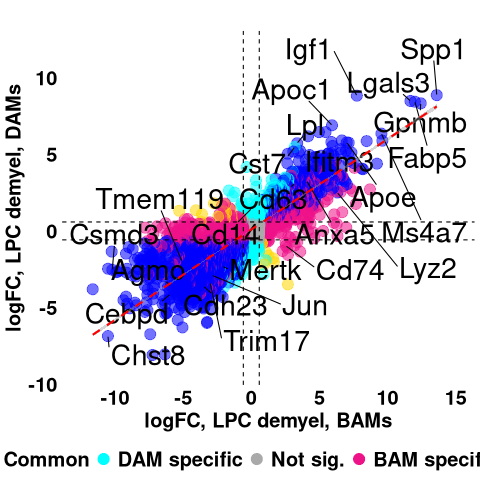

In [259]:
%%R

p <- ggplot(filtered_out_df2, aes(x = logFC_LPC_BAM, y = logFC_LPC_de, 
                                  color = ifelse(opposite_direction, "gold1", 
                                  ifelse(common, "blue", 
                                  ifelse(LPC_sig_BAM, "deeppink2", 
                                  ifelse(LPC_sig_de, "cyan", "dark grey")))))) +
    geom_point(size = 5, aes(alpha = ifelse(LPC_sig_BAM | LPC_sig_de | opposite_direction, 1, 1))) +
    geom_text_repel(data = filtered_out_df2[filtered_out_df2$gene %in% genes_to_label, ], 
                    aes(label = gene), nudge_x = 1.5, point.padding = 0, size = 10, max.overlaps = Inf,
                    min.segment.length = 0, box.padding = 0.5, color = "black") +
    geom_smooth(data = subset_either, aes(x = logFC_LPC_BAM, y = logFC_LPC_de), 
                method = "lm", linetype = "dashed", color = "red") +  # Add linear trend line with confidence interval
    geom_vline(xintercept = 0.585, linetype = "dashed", color = "black") +  # Vertical dashed line at x = 1
    geom_hline(yintercept = 0.585, linetype = "dashed", color = "black") +  # Horizontal dashed line at y = 1
    geom_vline(xintercept = -0.585, linetype = "dashed", color = "black") +  # Vertical dashed line at x = -1
    geom_hline(yintercept = -0.585, linetype = "dashed", color = "black") +  # Horizontal dashed line at y = -1
    labs(title = '',
         x = 'logFC, LPC demyel, BAMs',
         y = 'logFC, LPC demyel, DAMs',
         color = 'Significance') +
    scale_color_manual(name = 'Color',
                       values = c(blue = 'blue', deeppink2 = 'deeppink2', cyan = 'cyan', gold1 = 'gold1', 'dark grey' = 'dark grey'),
                       labels = c('Common', 'DAM specific', 'Not sig.', 'BAM specific', 'Opposite')) +  # Update labels for yellow
    coord_cartesian(xlim = c(-12.5, 15), ylim = c(-9, 12)) +  # Set x-axis and y-axis limits
    theme_minimal() +
    theme(
        text = element_text(size = 20, face = "bold", color = "black"),  # Set text size and color for all text elements
        axis.title = element_text(size = 20, face = "bold", color = "black"),  # Set axis title size and color
        axis.text = element_text(size = 20, face = "bold", color = "black"),  # Set axis text size and color
        plot.title = element_text(size = 20, face = "bold", hjust = 0.5),  # Center the title and set its size
        legend.text = element_text(size = 20),  # Set legend text size
        legend.title = element_text(size = 20),  # Set legend title size
        legend.position = "bottom",  # Move the legend to the bottom
        panel.grid = element_blank()
    ) +
    guides(alpha = "none")  # Remove alpha scale legend

# Save the plot with higher resolution and larger size
ggsave("./figures/dual_volcanoplot_LPC_de_BAM_v_DAM_NEW_with_subset_lm.png", plot = p, width = 16, height = 12, dpi = 300)
#ggsave("./figures/dual_volcanoplot_Cupr_de_vs_re_NEW_with_subset_lm.png", plot = p, width = 16, height = 12, dpi = 300)

# Print the plot to display in the notebook (optional)
print(p)